# Counterfeit Medicine Sales Prediction

**By:** Hedgar Ajakaiye, 
     **September 2019**  

## Introduction

Counterfeit medicines are fake medicines which are either contaminated or contain wrong or no active ingredient. They could have the right active ingredient but at the wrong dose. Counterfeit drugs are illegal and are harmful to health. `10%` of the world's medicine is counterfeit and the problem is even worse in developing countries. Up to `30%` of medicines in developing countries are counterfeit.

Millions of pills, bottles and sachets of counterfeit and illegal medicines are being traded across the world. The World Health Organization (WHO) is working with International Criminal Police Organization (Interpol) to dislodge the criminal networks raking in billions of dollars from this cynical trade.

Despite all these efforts, counterfeit medicine selling rackets don’t seem to stop popping here and there. It has become a challenge to deploy resources to counter these; without spreading them too thin and eventually rendering them ineffective. Government has decided that they should focus on illegal operations of high networth first instead of trying to control all of them. In order to do that they have collected data which will help them to predict sales figures given an illegal operation's characteristics


## Formal Problem Statement

We would like to make example out a few of these counterfeiters but the challenge is what yardstick can we employ to determine the 'big fish(es)' that we can use as scape goat to send a strong message to these clandestine communities and equally serve as deterrent. After considering numerous features and attributes of these counterfeiters, we resolved to zero in on their sales figures. To this end we shall put to use the power of machine learning to scientifically predict current and future counterfeiters and stop them in their tracks for good!

We would train a model on  data we have collected secretly over the years on their operations. The data dictionary of the data is as follows:

                                                                                                                                                


|Variable               |        Description/Values                                                                    |
|:----------------------|:--------------------------------------------------------------------------:|
|Medicine_ID            |Alphanumeric identification number;Normal Integer                           |
|Counterfeit weight     |weighted percentage attached to each medicine;continuous                    |
|District_ID            |District identification number;alphanumeric                                 |
|Active since           | Year(s)monitoring started till date;Integer                                |
|Medicine MRP           | Medicine price quotes/codes;continuous                                     |
|Medicine type          |The type of the medicine,categorical                                        |
|Side effect level      |The severity of the side effect associated with the medicine;categorical    |
|Availability Rating    |The rate at which the medicine is availablecontinuous                       |
|Area type              |The level of development of an area                                         |
|Area city type         |City rate level;categorical                                                 |
|Area district level    |The level of the area district.categorical                                  |
|Counterfeit sales      |sales figures of counterfeited drugs/medicine                               |






## Load Library, Packages, Modules

In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  r2_score, scorer
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from xgboost.sklearn import XGBClassifier
import warnings
warnings.simplefilter('ignore')

%matplotlib inline


In [63]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams.update({'font.size':25})

## Load Data

In [64]:
# change directory
# point to the directory that house the data
os.chdir("/Users/ajakaiye/Documents/data")

In [65]:
# read data into pandas
train_data = pd.read_csv('counterfeit_train.csv')
test_data = pd.read_csv('counterfeit_test.csv')

In [66]:
#shape of test and train data
train_data.shape, test_data.shape

((6818, 12), (1705, 11))

In [67]:
train_data.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [68]:
# combine test and train data to ensure uniform preprocessing
# to combine test and train data successfully, the value of the columns of test and train data must equal
test_data['Counterfeit_Sales'] =np.nan
test_data['data'] = 'test'
train_data['data'] = 'train'
test_data = test_data[train_data.columns]
all_data = pd.concat([test_data, train_data], axis=0)



In [69]:
all_data.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [70]:
#check the dimension
all_data.shape

(8523, 13)

In [71]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 6817
Data columns (total 13 columns):
Medicine_ID            8523 non-null object
Counterfeit_Weight     7060 non-null float64
DistArea_ID            8523 non-null object
Active_Since           8523 non-null int64
Medicine_MRP           8523 non-null float64
Medicine_Type          8523 non-null object
SidEffect_Level        8523 non-null object
Availability_rating    8523 non-null float64
Area_Type              8523 non-null object
Area_City_Type         8523 non-null object
Area_dist_level        8523 non-null object
Counterfeit_Sales      6818 non-null float64
data                   8523 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 932.2+ KB


In [72]:
#make the column names uniform
def clean_colname(name):
    name = name.strip().lower()
    return name
all_data = all_data.rename(columns= clean_colname)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,active_since,medicine_mrp,medicine_type,sideffect_level,availability_rating,area_type,area_city_type,area_dist_level,counterfeit_sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [73]:
#check and treat missing value. This value should exlude the counterfeit sale column as the na there is intentional
all_data.isnull().mean() * 100

medicine_id             0.000000
counterfeit_weight     17.165317
distarea_id             0.000000
active_since            0.000000
medicine_mrp            0.000000
medicine_type           0.000000
sideffect_level         0.000000
availability_rating     0.000000
area_type               0.000000
area_city_type          0.000000
area_dist_level         0.000000
counterfeit_sales      20.004693
data                    0.000000
dtype: float64

In [74]:
# fill missing values in counterfeit_weight columns with the mean weight
# the counterfeit_weight column portion of the training data set and not the combined portion shall be used to calculate the mean
# all_data['counterfeit_weight'].mean() # 14.158
# all_data['counterfeit_weight'].fillna(14.158, inplace = True)
# print('current number of missing value ', all_data['counterfeit_weight'].isnull().sum())
filt = all_data['data'] == 'train'
all_data.loc[filt, 'counterfeit_weight'].mean() # 14.115
all_data['counterfeit_weight'].fillna(14.115, inplace= True)
print('Total number of missing values after treatment:', all_data['counterfeit_weight'].isnull().sum())




Total number of missing values after treatment: 0


In [75]:
# display descriptive stats
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
counterfeit_weight,8523.0,14.150325,4.226154,5.855,10.610000,14.115000,17.300000,22.650000
active_since,8523.0,1995.831867,8.371760,1983.000,1985.000000,1997.000000,2002.000000,2007.000000
medicine_mrp,8523.0,151.292782,62.275067,41.590,104.126500,153.312800,195.943700,277.188400
availability_rating,8523.0,0.079132,0.051598,0.013,0.039989,0.066931,0.107585,0.341391
counterfeit_sales,6818.0,2280.583480,1693.354404,146.290,933.265600,1902.670400,3207.638400,13199.964800


In [76]:
# columns with float type
cont_features = all_data.select_dtypes(include=['float64']).columns

In [77]:
#column with integer data type
integer_features = all_data.select_dtypes(include=['int64']).columns

In [78]:
#columns with categorical type. This does not include the 'data' which serves the purpose of a separator
all_data.select_dtypes(include=['object']).columns

Index(['medicine_id', 'distarea_id', 'medicine_type', 'sideffect_level',
       'area_type', 'area_city_type', 'area_dist_level', 'data'],
      dtype='object')

## Data Exploration

#### How many unique medicine type are present?

In [79]:
# Number of unique medicine type
train_data['Medicine_Type'].nunique()

16

#### which area type has the highest counterfeit drug?
Down Town, Area has the highest number of counterfeited drugs and medicine

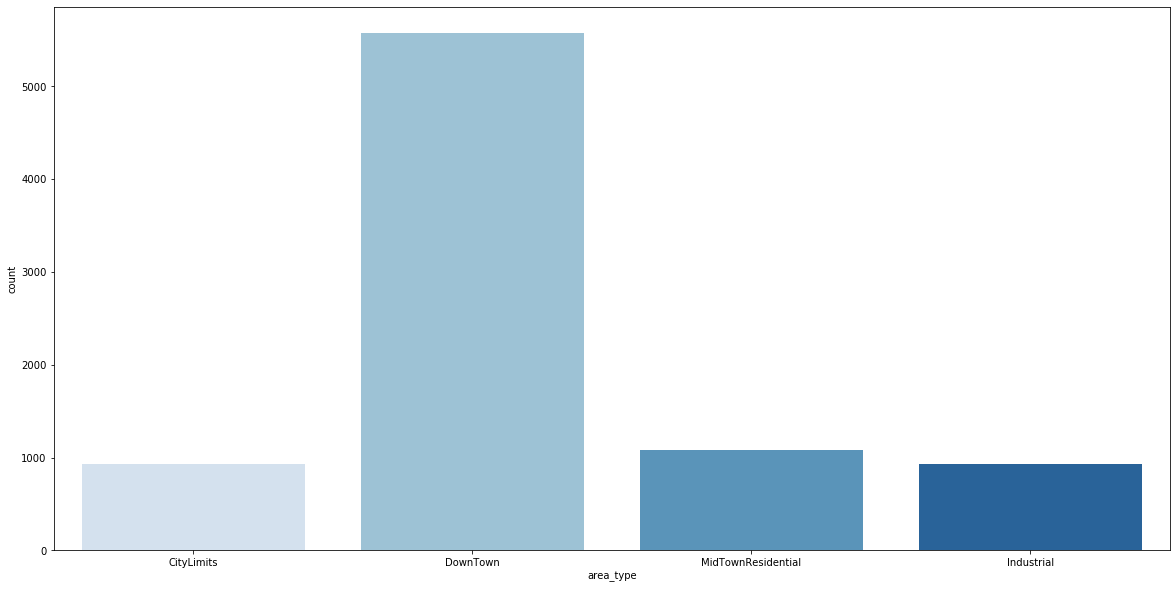

In [80]:
#which area type has the highest counterfeit drug

# train_data['Area_Type'].value_counts().plot(kind = 'bar')
# plt.xlabel('Area Type')
# plt.ylabel('count')
# plt.title('Counterfeit Drug Area Type Count');
sns.countplot(x ='area_type', data=all_data, palette='Blues');

### Which medicine type has the lowest count and their respective level of side effects?
Antiviral appears to be the least counterfeited medicine whereas Antibiotics are the third most counterfeited drug but with the most critical side effect level

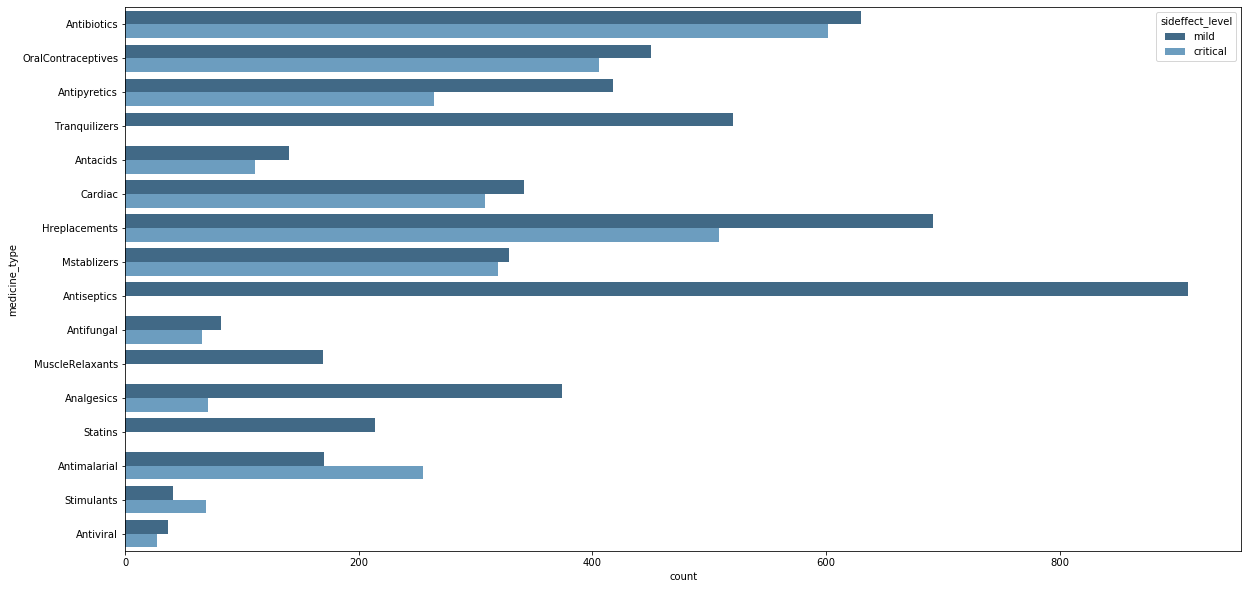

In [81]:
#which medicine type has the lowest count
#train_data['Medicine_Type'].value_counts(ascending=True)
sns.countplot(y='medicine_type', hue='sideffect_level', data=all_data, palette='Blues_d');

## How does the distribution of the counterfeit sale looks like
The distribution is not normal rather skewed to the right. This means that a handful of medicine have very high sales figures. This could also mean that there are alot of outliers in the counterfeit sale figure.But improves incredibly when standardize by taking it logarithm. lets check it out!

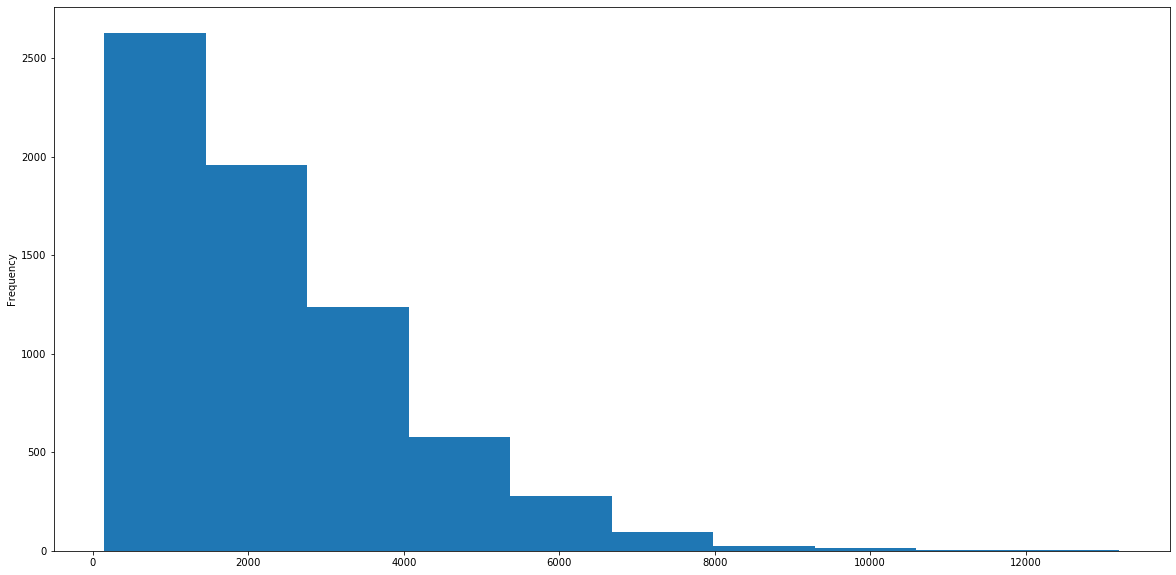

In [82]:
all_data['counterfeit_sales'].plot(kind = 'hist');

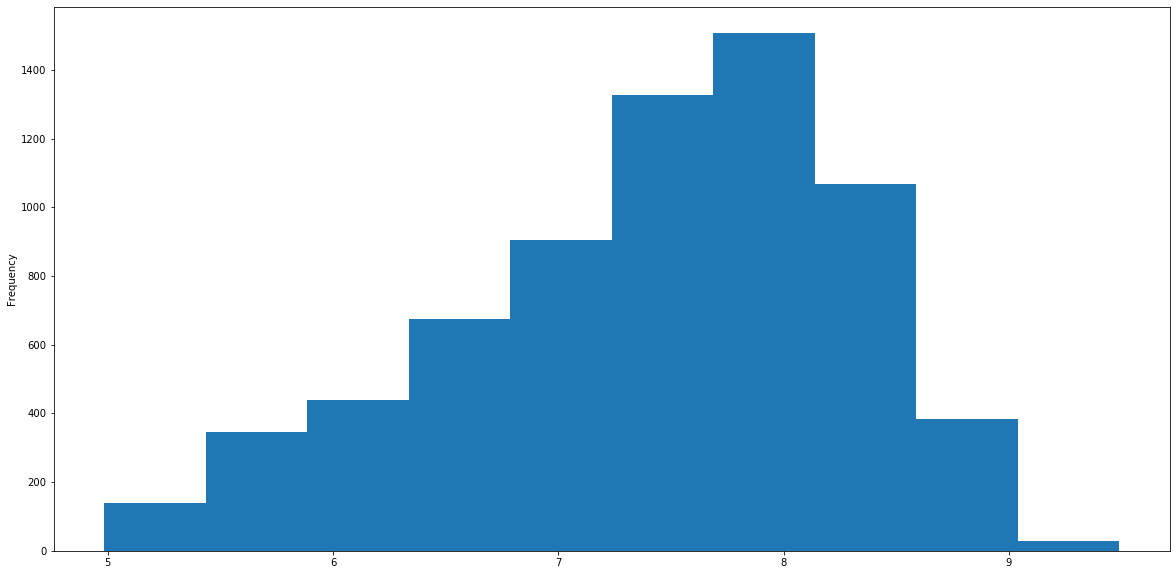

In [83]:
# standardize counterfeit sales
np.log(all_data['counterfeit_sales']).plot(kind = 'hist')

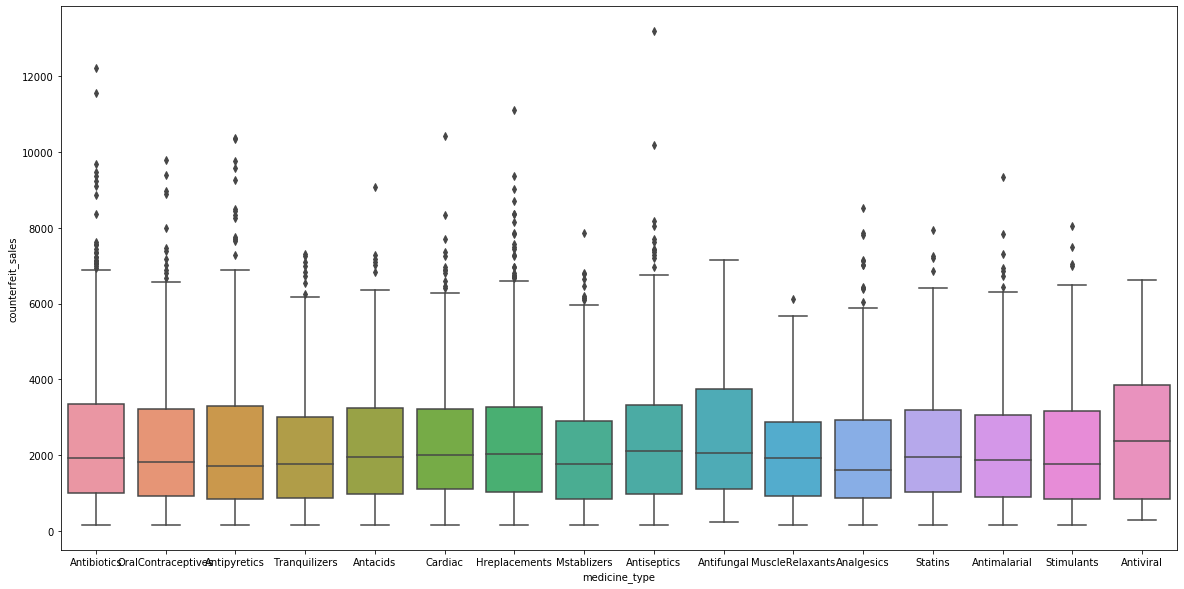

In [84]:
# checking the level of outlier of medicine type with respect to counterfeit sales
sns.boxplot(x = 'medicine_type', y = 'counterfeit_sales', data=all_data);

### What is the average sales figure of counterfeited medicine by medicine type
On average all the medicine type sale figure are above 2000 while **Antiviral** medicine type appears to command the highest average counterfeit sale. However this result should be taken with a pinch of salt until the outliers observed are treated appropriately!


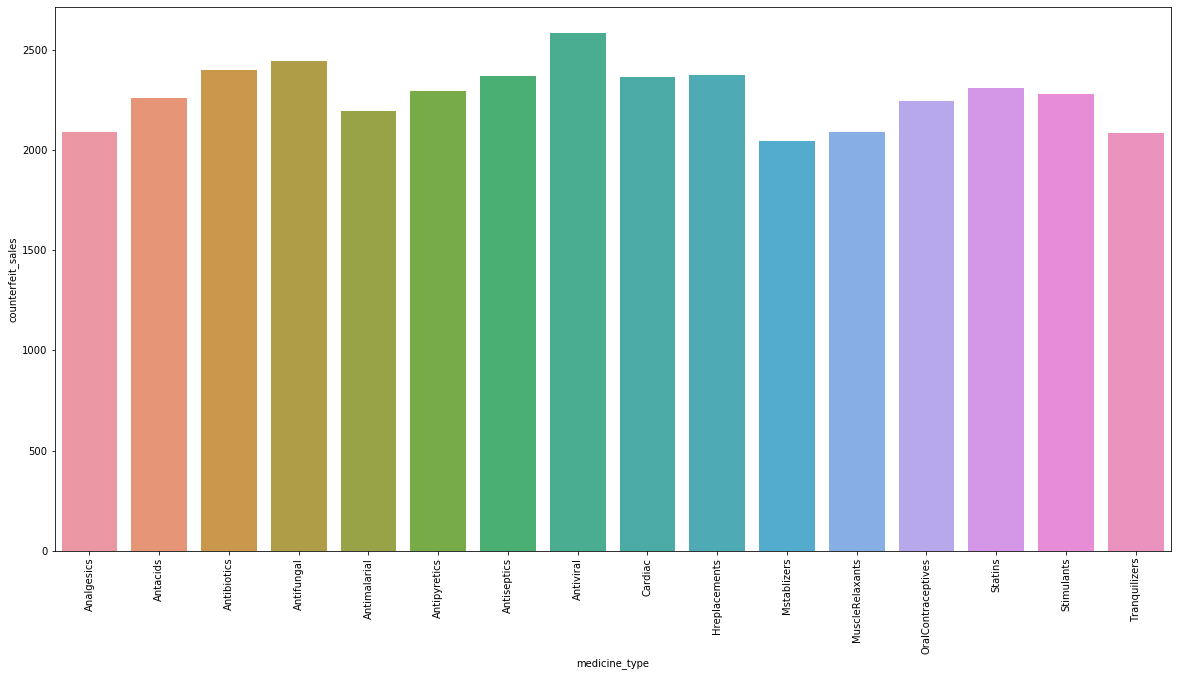

In [85]:
#average sales figure of counterfeited drugs 
filt = all_data['data'] == 'train'
adj_dat = all_data.loc[filt]
#adj_dat['counterfeit_sales'] = np.log(adj_dat['counterfeit_sales'])
avg_sales = adj_dat.groupby('medicine_type').agg({'counterfeit_sales':'mean'}).reset_index()
sns.barplot(x = 'medicine_type', y='counterfeit_sales', data=avg_sales)
plt.xticks(rotation=90);


### Which medicine type has the highest counterfeit sales
While it appears that the **Antiviral** drug has the highest sales figure,this figure is suspect until the outliers observed are treated

In [86]:
filt = all_data['data'] == 'train'
highestsales = all_data.loc[filt]['counterfeit_sales']>= 13199.9648
print('The medicine with the highest sales figure is:',all_data.loc[filt]['medicine_type'][highestsales].values)

The medicine with the highest sales figure is: ['Antiseptics']


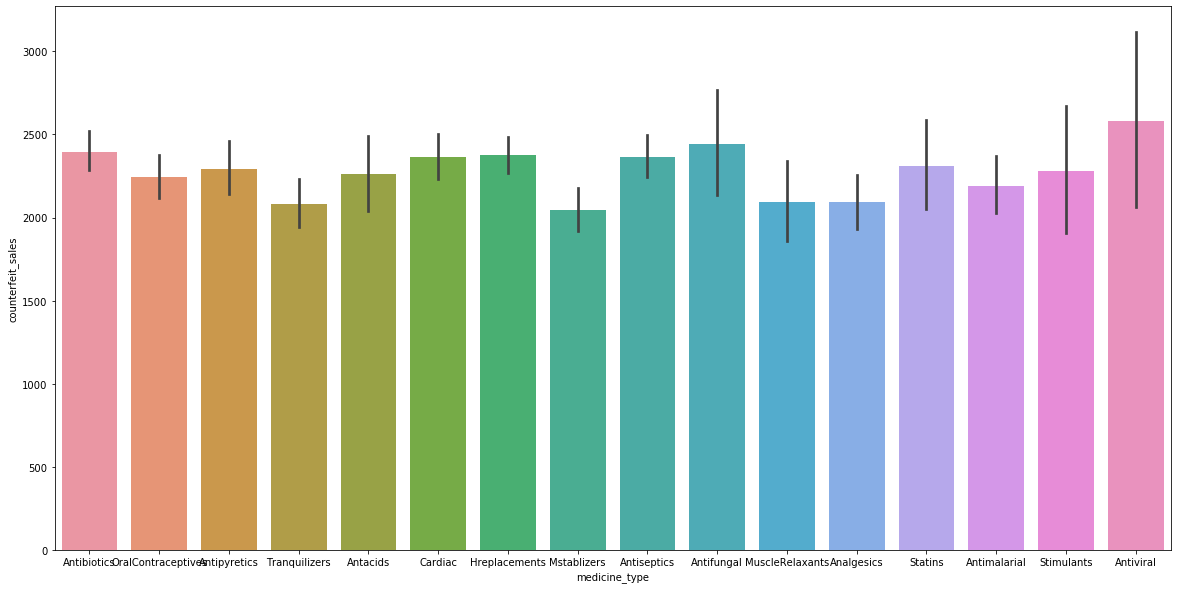

In [87]:
sns.barplot(x = 'medicine_type', y = 'counterfeit_sales', data=all_data);

In [88]:
all_data.columns

Index(['medicine_id', 'counterfeit_weight', 'distarea_id', 'active_since',
       'medicine_mrp', 'medicine_type', 'sideffect_level',
       'availability_rating', 'area_type', 'area_city_type', 'area_dist_level',
       'counterfeit_sales', 'data'],
      dtype='object')

### Data Preprocessing:Feature Engineering

In [89]:
# determine the period from the year since active till date
all_data['period_active'] =  2019 - all_data['active_since']

all_data = all_data.drop('active_since',1)
print('The number of columns after dropping the active_since column:',all_data.shape[1])


The number of columns after dropping the active_since column: 13


In [90]:
#check frequency of column
all_data['medicine_type'].value_counts()


Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: medicine_type, dtype: int64

#### Treatment/transformation  of  categorical variable

In [91]:
# get dummy and drop Antiviral medicine for low frequency
medtypedummy = all_data['medicine_type'].str.get_dummies()


In [92]:
#add to the data frame accordingly
all_data = pd.concat([all_data, medtypedummy],1)
all_data = all_data.drop(['Antiviral','medicine_type'], 1)

In [93]:
all_data['area_type'].value_counts()

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: area_type, dtype: int64

In [94]:
#create dummy of area_type
areatype_dummy = all_data['area_type'].str.get_dummies()


In [95]:
#drop industrial area type and add other area to data frame
all_data = pd.concat([all_data, areatype_dummy],1)
all_data = all_data.drop(['area_type', 'Industrial'],1)

In [96]:

pd.set_option('display.max_columns', 50)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,medicine_mrp,sideffect_level,availability_rating,area_city_type,area_dist_level,counterfeit_sales,data,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential
0,HLZ81,14.115,Area027,85.5328,mild,0.112747,Tier 3,Medium,NaN,test,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,ECE94,13.450,Area045,257.1460,mild,0.144446,Tier 2,Unknown,NaN,test,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,SAD14,7.100,Area045,98.1172,mild,0.144221,Tier 2,Unknown,NaN,test,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,EQV63,18.300,Area010,135.3730,mild,0.100388,Tier 3,Unknown,NaN,test,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,AIR10,14.115,Area019,112.8016,mild,0.022585,Tier 1,Small,NaN,test,36,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [97]:
#create dummy for sideffect level columns of data frame
all_data['sideffect_level'].value_counts()

mild        5517
critical    3006
Name: sideffect_level, dtype: int64

In [98]:
#create dummy of sideffect column
all_data['sideffect_mc'] = np.where(all_data['sideffect_level'] == 'mild',1,0)
all_data = all_data.drop(['sideffect_level'], 1)

In [99]:
all_data['area_city_type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: area_city_type, dtype: int64

In [100]:
#create dummy for area city type
actype_dummy = all_data['area_city_type'].str.get_dummies()


In [101]:
#concat dummy with data frame and drop Tier one
all_data = pd.concat([all_data, actype_dummy],1)
all_data = all_data.drop(['Tier 1','area_city_type'], 1)

In [102]:
all_data['distarea_id'].value_counts()

Area027    935
Area013    932
Area035    930
Area049    930
Area046    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: distarea_id, dtype: int64

In [103]:

# create dumy for district area id drop area019 and concatenate with data frame accordingly
distarea_dummy =  all_data['distarea_id'].str.get_dummies()


In [104]:
all_data = pd.concat([all_data, distarea_dummy],1)
all_data = all_data.drop(['Area019', 'distarea_id'],1)

In [105]:
all_data['area_dist_level'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: area_dist_level, dtype: int64

In [106]:
#create dummy of area distance level
ad_leve_dummy = all_data['area_dist_level'].str.get_dummies()


In [107]:


#concatenate dummy with data frame and drop high area distance
all_data = pd.concat([all_data, ad_leve_dummy],1)
all_data = all_data.drop(['High', 'area_dist_level'],1)

In [108]:

#dimemsion of combined data
all_data.shape

(8523, 40)

### Separate data into train and  test

In [109]:
#separate train data set from data frame and delete useless columns
counter_train = all_data[all_data['data'] == 'train']
del counter_train['data']


In [110]:
#separate test data from data frame and delete/drop useless columns
counter_test = all_data[all_data['data'] == 'test']
counter_test.drop(['data', 'counterfeit_sales'],axis = 1, inplace = True )



In [111]:
#dimension of test and train data set
print('Our training data set has {} rows and {} columns'.format(counter_train.shape[0],counter_train.shape[1]))
print('Our testing data set has {} rows and {} columns'.format(counter_test.shape[0],counter_test.shape[1]))



Our training data set has 6818 rows and 39 columns
Our testing data set has 1705 rows and 38 columns


In [112]:
#check for missing values in test and train
print('Are there missing values in test data set:', counter_test.isnull().any().any())
print('Are there missing values in train data set:',counter_train.isnull().any().any())

Are there missing values in test data set: False
Are there missing values in train data set: False


### Split Training data into Train and validation set

### Feature Scaling and P.C.A
In order to train our data on many algorithm as possible and subsequently evaluate performance  we would create three copies of our training and test data set as follows:
* Training/testing data set that is scaled only
* Training/testing data set that is scaled and P.C.A applied with a cumulative explained ratio of at least 80%
* Training/testing data set free from the above operations

##### scaled Training and Test data set 

In [113]:
# before we proceed we would want to drop the medicine id from both data set as it does not have a predictive value
#we would also remove the target variable from the train set
sales_figures = counter_train[['counterfeit_sales']]
train_counter_w_o_spca = counter_train.drop(['medicine_id','counterfeit_sales'],axis =1)
#test_counter_w_o_spca = counter_test.drop(['medicine_id'],axis =1)

In [115]:
train_counter_w_o_spca.shape

(6818, 37)

In [116]:
train_counter_w_o_spca, test_counter_w_o_spca, sales_figures, y_test = train_test_split(train_counter_w_o_spca,sales_figures,test_size=0.20, random_state=42)

In [117]:
train_counter_w_o_spca.head()

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
3759,15.100,242.9984,0.070104,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1782,12.400,199.5846,0.123844,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
5013,14.115,178.5474,0.038612,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
5412,12.300,134.7046,0.119051,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3066,17.400,137.3362,0.060997,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [118]:
test_counter_w_o_spca.head()

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
239,21.300,56.7744,0.013000,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2850,17.150,63.6956,0.070303,17,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2687,9.535,194.7950,0.027541,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
6500,17.150,54.3112,0.033488,24,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2684,10.010,196.8924,0.133773,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [119]:
sales_figures.head()

,counterfeit_sales
3759,1503.1904
1782,5272.2842
5013,3313.5006
5412,2354.0828
3066,1497.1982


In [120]:

y_test.head()

,counterfeit_sales
239,158.2744
2850,713.5516
2687,3957.9950
6500,581.7232
2684,668.2772


In [121]:
train_counter_w_o_spca.shape, test_counter_w_o_spca.shape

((5454, 37), (1364, 37))

In [122]:
#scaled train and test data frame
scaled_counter_train = pd.DataFrame(StandardScaler().fit_transform(train_counter_w_o_spca), columns=train_counter_w_o_spca.columns)
scaled_counter_test = pd.DataFrame(StandardScaler().fit_transform(test_counter_w_o_spca),columns=test_counter_w_o_spca.columns)

In [123]:
#lets have a peak of our scled data frame
scaled_counter_train.head()

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
0,0.229757,1.466741,-0.173094,-1.320375,-0.235246,-0.172161,-0.407899,-0.130262,-0.224187,-0.2966,-0.342962,-0.290335,2.477649,-0.28922,-0.144796,-0.337932,-0.159917,-0.115663,-0.25663,-0.346292,-1.385532,-0.377727,-1.352888,-0.706232,1.250188,-0.259861,-0.350263,-0.355192,2.836331,-0.346292,-0.356173,-0.348281,-0.346292,-0.348611,1.437877,-0.625561,-0.628966
1,-0.407581,0.769906,0.877357,-0.126660,-0.235246,-0.172161,2.451588,-0.130262,-0.224187,-0.2966,-0.342962,-0.290335,-0.403608,-0.28922,-0.144796,-0.337932,-0.159917,-0.115663,-0.25663,-0.346292,0.721744,-0.377727,0.739159,-0.706232,-0.799880,-0.259861,-0.350263,-0.355192,-0.352568,-0.346292,-0.356173,-0.348281,-0.346292,2.868523,1.437877,-0.625561,-0.628966
2,-0.002754,0.432238,-0.788658,1.544541,-0.235246,-0.172161,2.451588,-0.130262,-0.224187,-0.2966,-0.342962,-0.290335,-0.403608,-0.28922,-0.144796,-0.337932,-0.159917,-0.115663,-0.25663,2.887740,-1.385532,-0.377727,0.739159,-0.706232,1.250188,-0.259861,-0.350263,-0.355192,-0.352568,2.887740,-0.356173,-0.348281,-0.346292,-0.348611,1.437877,-0.625561,-0.628966
3,-0.431186,-0.271483,0.783673,-0.484774,-0.235246,5.808516,-0.407899,-0.130262,-0.224187,-0.2966,-0.342962,-0.290335,-0.403608,-0.28922,-0.144796,-0.337932,-0.159917,-0.115663,-0.25663,-0.346292,0.721744,-0.377727,0.739159,1.415966,-0.799880,-0.259861,-0.350263,-0.355192,-0.352568,-0.346292,-0.356173,2.871248,-0.346292,-0.348611,-0.695470,-0.625561,1.589910
4,0.772674,-0.229243,-0.351116,-1.320375,-0.235246,-0.172161,-0.407899,-0.130262,-0.224187,-0.2966,-0.342962,-0.290335,-0.403608,-0.28922,-0.144796,2.959174,-0.159917,-0.115663,-0.25663,-0.346292,-1.385532,-0.377727,-1.352888,-0.706232,1.250188,-0.259861,-0.350263,-0.355192,2.836331,-0.346292,-0.356173,-0.348281,-0.346292,-0.348611,1.437877,-0.625561,-0.628966


In [124]:
# the evidence of a scaled data set is that the mean must 0 and the stardard diviation must be 1
scaled_counter_train.describe().T

,count,mean,std,min,25%,50%,75%,max
counterfeit_weight,5454.0,2.501361e-16,1.000092,-1.952536,-0.832473,-0.002754,0.749069,2.011942
medicine_mrp,5454.0,6.513960e-17,1.000092,-1.762855,-0.752925,0.033069,0.715997,2.012315
availability_rating,5454.0,1.954188e-17,1.000092,-1.289299,-0.752370,-0.237438,0.554978,5.129713
period_active,5454.0,1.367932e-17,1.000092,-1.320375,-0.723517,-0.126660,1.305798,1.544541
Analgesics,5454.0,7.816752e-18,1.000092,-0.235246,-0.235246,-0.235246,-0.235246,4.250874
Antacids,5454.0,7.816752e-18,1.000092,-0.172161,-0.172161,-0.172161,-0.172161,5.808516
Antibiotics,5454.0,-3.517538e-17,1.000092,-0.407899,-0.407899,-0.407899,-0.407899,2.451588
Antifungal,5454.0,-4.624911e-17,1.000092,-0.130262,-0.130262,-0.130262,-0.130262,7.676853
Antimalarial,5454.0,2.345026e-17,1.000092,-0.224187,-0.224187,-0.224187,-0.224187,4.460555
Antipyretics,5454.0,8.858985e-17,1.000092,-0.296600,-0.296600,-0.296600,-0.296600,3.371550


In [125]:
#pca and sclaed version of test and train set; Apply Principal Component Analysis, 
#a fancy name for reducing the number colums without loosing data. PCA uses scaled data only
pca = PCA(n_components=37)
pca_scaled_counter_test = pd.DataFrame(pca.fit_transform(scaled_counter_test), columns=scaled_counter_test.columns)
pca_scaled_counter_train = pd.DataFrame(pca.fit_transform(scaled_counter_train), columns=scaled_counter_train.columns)


In [126]:
#Let see the critical attributes of PCA: Explained Variance & Explained variance ratio
#expalined variance
pca.explained_variance_

array([4.63848872e+00, 2.68403103e+00, 2.48923754e+00, 2.06359657e+00,
       1.80789863e+00, 1.51773376e+00, 1.48926856e+00, 1.24368016e+00,
       1.18903598e+00, 1.17127481e+00, 1.14487751e+00, 1.11906250e+00,
       1.11136103e+00, 1.10236306e+00, 1.08683111e+00, 1.08076511e+00,
       1.05935420e+00, 1.04872675e+00, 1.03056554e+00, 1.02416754e+00,
       1.02128806e+00, 1.01463784e+00, 9.19276929e-01, 9.05678634e-01,
       8.60136269e-01, 6.00296161e-01, 5.74888314e-01, 8.26291856e-03,
       2.16544399e-30, 1.73876791e-30, 9.43625259e-31, 5.49481942e-31,
       2.80393688e-31, 1.75573808e-31, 1.44753343e-31, 1.10924841e-31,
       1.57514682e-32])

In [127]:
#explaned variance ratio
pca.explained_variance_ratio_

array([1.25341574e-01, 7.25280786e-02, 6.72643551e-02, 5.57626543e-02,
       4.88531663e-02, 4.10123103e-02, 4.02431215e-02, 3.36068143e-02,
       3.21302153e-02, 3.16502719e-02, 3.09369621e-02, 3.02393870e-02,
       3.00312774e-02, 2.97881334e-02, 2.93684282e-02, 2.92045123e-02,
       2.86259452e-02, 2.83387693e-02, 2.78480158e-02, 2.76751285e-02,
       2.75973190e-02, 2.74176163e-02, 2.48407670e-02, 2.44733129e-02,
       2.32426638e-02, 1.62212458e-02, 1.55346732e-02, 2.23281177e-04,
       5.85147825e-32, 4.69851108e-32, 2.54987093e-32, 1.48481404e-32,
       7.57681831e-33, 4.74436801e-33, 3.91153520e-33, 2.99741898e-33,
       4.25637301e-34])

#### P.C.A  Variance Report

In [128]:
#To make sense of of this bunch of numbers we would create a data frame that depict the cummulated explained variance ratio
data = {'Variance': pca.explained_variance_, '%Variance_ratio':pca.explained_variance_ratio_*100}
var_report = pd.DataFrame(data)
var_report['CumSum'] = var_report['%Variance_ratio'].cumsum()
print('Number of obervation n = {}'.format(pca.n_samples_))
var_report

Number of obervation n = 5454


,Variance,%Variance_ratio,CumSum
0,4.638489e+00,1.253416e+01,12.534157
1,2.684031e+00,7.252808e+00,19.786965
2,2.489238e+00,6.726436e+00,26.513401
3,2.063597e+00,5.576265e+00,32.089666
4,1.807899e+00,4.885317e+00,36.974983
5,1.517734e+00,4.101231e+00,41.076214
6,1.489269e+00,4.024312e+00,45.100526
7,1.243680e+00,3.360681e+00,48.461207
8,1.189036e+00,3.213022e+00,51.674229
9,1.171275e+00,3.165027e+00,54.839256


#### decision time:how many component should we settle for?
from the scree diagram, we may settle for 26 components with 99% of  


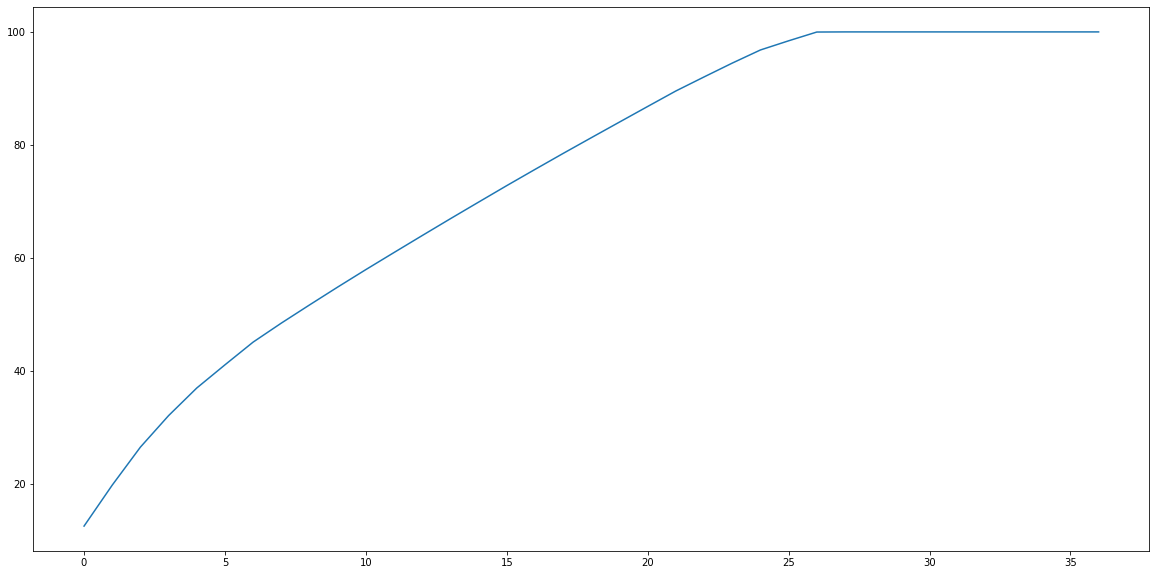

In [129]:
plt.plot(var_report['CumSum']);

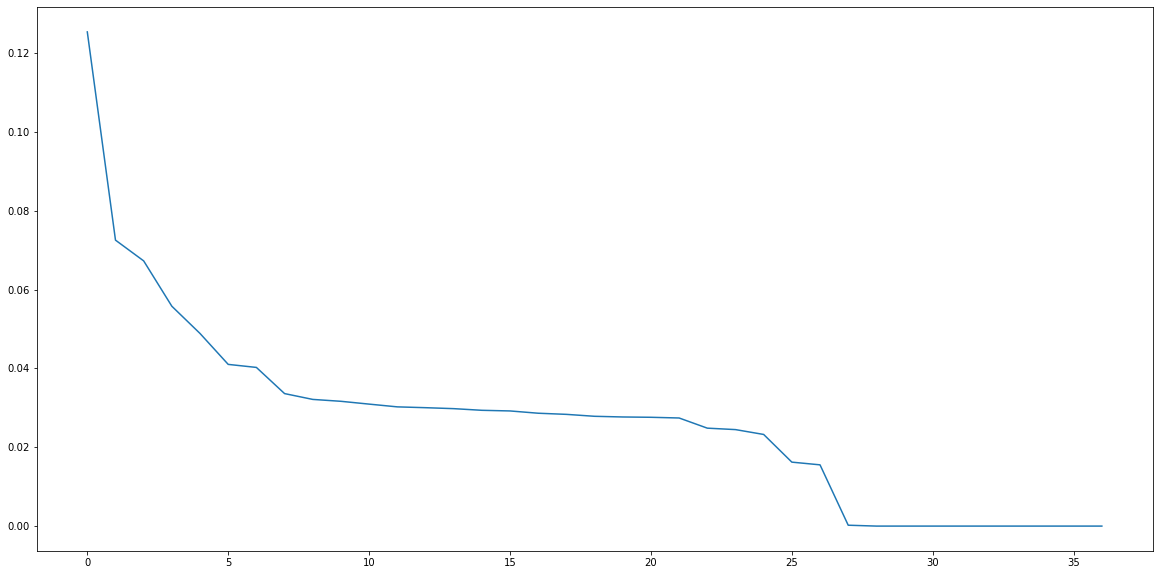

In [130]:
# let see it from another perspective
plt.plot(pca.explained_variance_ratio_)

In [131]:
#keep 25 components
pca_scaled_train = pca_scaled_counter_train.iloc[:,0:25]
pca_scaled_test = pca_scaled_counter_test.iloc[:,0:25]

In [132]:
pca_scaled_test.shape, pca_scaled_train.shape

((1364, 25), (5454, 25))

### Some exploration of train data set after standardizing data

IndexError: index 8 is out of bounds for axis 0 with size 8

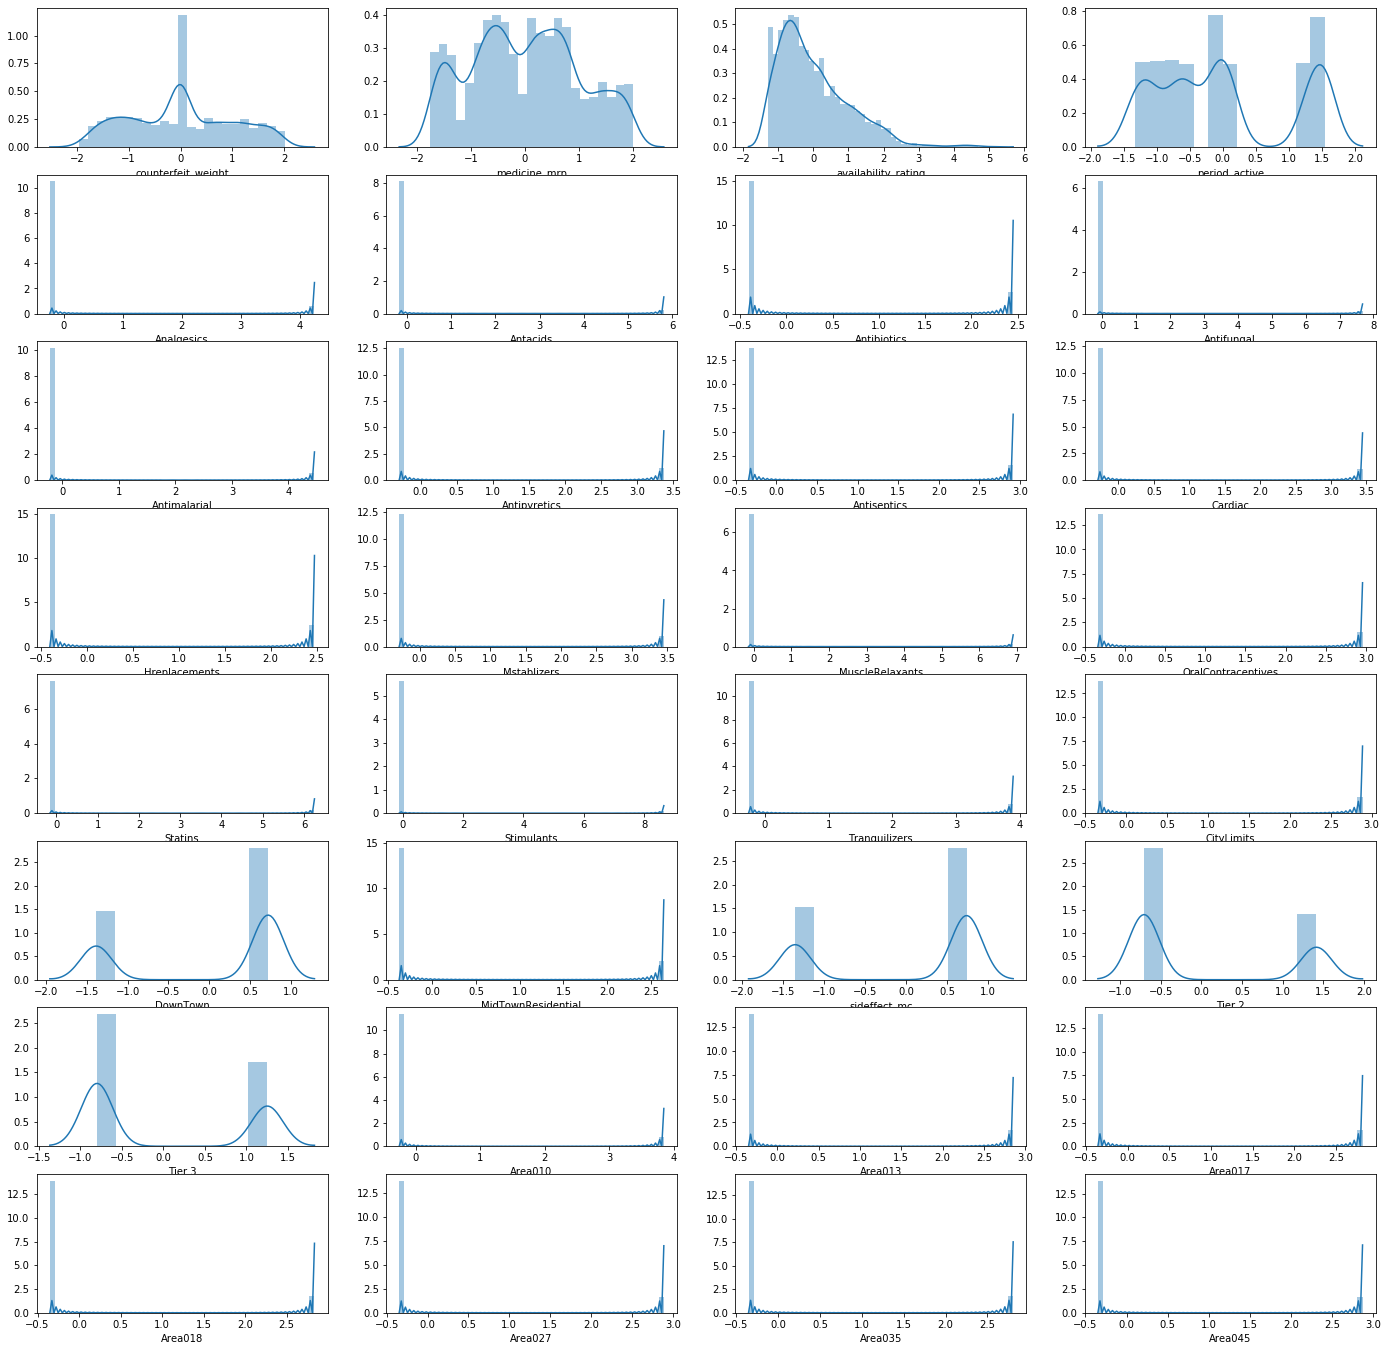

In [133]:
#Distribution of training data
fig, axs = plt.subplots(8, 4, figsize=(24,24))
for ix, col in enumerate(scaled_counter_train.columns):
    p0 = ix // 4
    p1 = ix % 4
    sns.distplot(scaled_counter_train[col], ax = axs[p0, p1])
    axs[p0, p1].set(xlabel=col)

In [ ]:
#features relationship with target: counterfeit sales figures
#
fig, axs = plt.subplots(4, 8, figsize=(20, 20))
for ix, feature in enumerate(scaled_counter_train.columns):
    p0 = ix // 8
    p1 = ix % 8
    axs[p0, p1].scatter(scaled_counter_train[feature], np.log(sales_figures))
    axs[p0, p1].set(xlabel=feature )


There is not much features relationship with the sales figure other than medicine_mrp which is somewhat positive. That is the rise in medicine mrp leads to increase in sales figures of counterfeit drugs. This should be further investigated

## Modeling
Under model building, we would adopt the iterative approach. We would build a basic model with a simple algorithm and evaluate performance therefrom accordingly. Then we would build a couple of 'out of the box models',evaluate the performance of these model and subsequently pick the two models with highest performance  metrics. We would then carryout hyper-parameter tuning of the two models to improve performance to satisfaction. This is further broken down below:

Basic  Model:
* Linear Regression

Out of the box model:
* Support Vector Machine
* Naive Bayes
* KN-Neighbor
* Decision Tree
* Random Forest

* Xgboost


### Basic/Simple Model
**Linear Regression**
* Linear regression, simply put is about extracting a mathematical equation from the data,which explains how the variable of interest, in our current case, the counterfeit sales figure, is affected by other variables in the data.

Mathematical foundation
* Multiple Linear regression: 
$\displaystyle Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n$

$\displaystyle\beta_1 = \frac {\Sigma( x - \bar{x})(y - \bar{y})}{\Sigma( x  -\bar{x})^2}$ $\to$ $\displaystyle\beta_1 = 
\frac{\Sigma xy -\frac{\Sigma x\Sigma y}{n}}{\Sigma x^2 - \frac{(\Sigma x)^2}{n}}$  
$\beta_0 = \bar{y}-\beta_1\bar{x}$

The ultimate goal is to minimize the error : $\displaystyle\sum_{i = 0}^n(Y - \beta_0 - \beta_1 X)^2$

In [134]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [135]:
#create custom score
def cust_score(y_true,y_pred):
    foo =  mean_absolute_error(y_true,y_pred)
    return foo

special_score = make_scorer(cust_score,greater_is_better= True)


In [136]:
#Build a baseline model with the pure version of the data free from scaling and pca
# we would be using a unique scoring metric which is 1-(mean absolute error/1660)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
X = train_counter_w_o_spca.as_matrix()
Y = np.log1p(sales_figures).values.ravel()
X_test = test_counter_w_o_spca.as_matrix()
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=kf, scoring= special_score)
print('MAE score - Linear Regression:', scores.mean())
print('Customise score(1-MAE/1660) - Linear Regression:',scores)



MAE score - Linear Regression: 0.3673596754724141
Customise score(1-MAE/1660) - Linear Regression: [0.36411827 0.38338016 0.36342107 0.35732728 0.3685516 ]


In [137]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
syu = model.predict(X_test)

In [139]:
y_p = np.expm1(syu)
y_p


array([ 195.2016251 , 1072.0851418 , 2827.68036085, ..., 1020.78730352,
       4589.49608418,  943.25606612])

In [140]:
mae = mean_absolute_error(y_test,y_p)

In [141]:
1-mae/1660

0.5414314531106585

In [142]:
# manual cross validation procedure- with same Mean Absolute Error results
from sklearn.model_selection import KFold
counter = 0
for trainIdx, valIdx in KFold(n_splits = 5, random_state = 42, shuffle=True).split(X,Y):
    print('Running for fold:', counter)
    X_train, y_train, X_val, y_val = X[trainIdx, :], Y[trainIdx], X[valIdx, :], Y[valIdx]
    
    model = LinearRegression(fit_intercept=True, normalize=False)
    model.fit(X_train, y_train)
    predy_train = model.predict(X_train)
    mae = 1-(mean_absolute_error(y_train, predy_train)/1660)
    r2 = r2_score(y_train,predy_train)
    print('mae',mae)
    print('r2:', r2)
    predy_val = model.predict(X_val)
    mae_val = 1-(mean_absolute_error(y_val,predy_val)/1660)
    print('val mae:', mae_val.mean())
    print('val R2:', r2)
    
    counter += 1


Running for fold: 0
mae 0.9997793085387026
r2: 0.7080434381261629
val mae: 0.9997806516447749
val R2: 0.7080434381261629
Running for fold: 1
mae 0.9997830783835007
r2: 0.7187708027441009
val mae: 0.9997690480986493
val R2: 0.7187708027441009
Running for fold: 2
mae 0.9997799416918309
r2: 0.7086341073714792
val mae: 0.9997810716427203
val R2: 0.7086341073714792
Running for fold: 3
mae 0.9997783890776403
r2: 0.7063833965879771
val mae: 0.9997847426019996
val R2: 0.7063833965879771
Running for fold: 4
mae 0.9997807857140452
r2: 0.7175029172063889
val mae: 0.9997779809652522
val R2: 0.7175029172063889


### Out-of-the-box Models
As we earlier said we would build our model using the other versions of our data with five other algorithms and subsequently pick the two best in terms of performance for further tuning and processing.


In [143]:
scaled_train = scaled_counter_train.as_matrix()
pca_scaled_train = pca_scaled_counter_train.as_matrix()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
Y_train = np.log1p(sales_figures).values.ravel()

In [144]:
#from sklearn.metrics import make_scorer

In [145]:
# make a function of the unique evaluation method

# def adj_mae(y_true,y_pred):
#     norm = mean_absolute_error(y_true, y_pred)
#     return 1-(norm/1660)

# mea_scorer = make_scorer(adj_mae, greater_is_better=True)


In [146]:
X_variants = [scaled_train, pca_scaled_train]
X_names = ['X with scaling only', 'X with pca']
for train_X, X_name in zip(X_variants, X_names):
    print('Data:', X_name)
    
    decision_tree = DecisionTreeRegressor()
    decision_tree_score = cross_val_score(decision_tree, train_X, Y_train, cv=kf, scoring=special_score)
    print('Mean MAE Score - Decision Trees:', decision_tree_score.mean())
    
    random_forest = RandomForestRegressor()
    random_forest_score = cross_val_score(random_forest, train_X, Y_train, cv=kf, scoring= special_score)
    print('Mean MAE Score - Random Forest:', random_forest_score.mean())
    
    #naive_bayes = GaussianNB()
    #naive_bayes_score = cross_val_score(naive_bayes, train_X, Y, cv=5, scoring='neg_mean_absolute_error')
    #print('Mean MEA Score- Naive Bayes:', naive_bayes_score.mean())
    
    knn = KNeighborsRegressor()
    knn_score = cross_val_score(knn, train_X, Y_train, cv=kf, scoring= special_score)
    print('Mean MAE Score - KNN:', knn_score.mean())

Data: X with scaling only
Mean MAE Score - Decision Trees: 0.5025363862006363
Mean MAE Score - Random Forest: 0.39024654834957817
Mean MAE Score - KNN: 0.44986131292828435
Data: X with pca
Mean MAE Score - Decision Trees: 0.5432453923696136
Mean MAE Score - Random Forest: 0.403706766184988
Mean MAE Score - KNN: 0.44986131292828435


### Evaluation
From the results above, since our metric is mean absolute error, the lower would be the better. To this end we can see that only Random Forest using the scaled version of our data has the lowest score which is an  improvement on our base model.

We would channel our effort to improve on these scores by fine tunning the hyper-parameters of the Linear regression and Random forest algorithms alternatively we may take a critical look at our features for possible re-engineering. We would have verified our performance on the test portion of the data if we had the target variable therein.Meanwhile we can rely on the performance from our validation portion of data through cross validation.

It is common knowledge that building models and applying algorithms is not a one size fit all scenario. This is the logic behind trying different model and the aim is really to see which model is better at this particular data at hand. To this end we would have to reconsider our earlier decision of picking two of the the best performing-in this case, the algorithm that reduces our Mean Absolute error the most- out of the bag models algorithms. From the result thus far we shall go ahead and fine tune the hyper-parameters of  the Linear regression and the Random Forest because the models built using these algorithms appears to produce results that are close to our objective of reducing the mean absolute error.


### Hyper-parameter tuning for Linear Regression and Random Forest

In [147]:
# Fine tune alpha hyper-parameter for linear regression
X_scale = scaled_counter_train.as_matrix()

best_alpha = None
best_mae = None
for alpha in [1e-6,1e-5,1e-4, 1e-3, 1e-2,1e-1, 1., 10., 1000.]:
    print('Training Linear model with L2 regularization for alpha=', alpha)
    counter = 0
    all_fold_mae = []
    rtwo_com = []
    
    for trainidx, validx in KFold(n_splits=5, random_state= 42).split(X_scale, Y):
        print('Running fold:', counter)
        X_train, y_train, X_val, y_val = X_scale[trainidx, :], Y[trainidx], X_scale[validx, :], Y[validx]
        
    
        #trainthe model
        model = Ridge(fit_intercept=True, normalize=False,alpha=alpha)
        model.fit(X_train, y_train)
    
        pred_train = model.predict(X_train)
    
        mae = mean_absolute_error(y_train, pred_train)
        #rtwo_score = r2_score(y_train, pred_train)
    
        pred_val = model.predict(X_val)
    
        mae = mean_absolute_error(y_val, pred_val)
        #rtwo_score = r2_score(np.exp(y_val),np.exp(pred_val))
        counter += 1
    
        all_fold_mae.append(mae)
        #rtwo_com.append(rtwo_score)
    
        averagemae = np.mean(all_fold_mae)
        #thertwo = np.mean(rtwo_com)
        #print('checking the r score =', thertwo)
        
        print('Avg CV mae', averagemae)
    
        if best_mae is None:
            best_alpha, best_mae = alpha, averagemae
        elif best_mae > averagemae:
            best_alpha, best_mae = alpha, averagemae
    
        print('Best alpha:', best_alpha)
        print('Best mae:', best_mae)
        
    
    



Training Linear model with L2 regularization for alpha= 1e-06
Running fold: 0
Avg CV mae 0.36516355891784014
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 1
Avg CV mae 0.36677912137026236
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 2
Avg CV mae 0.36832133382290366
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 3
Avg CV mae 0.36531281036507063
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 4
Avg CV mae 0.3673547271480281
Best alpha: 1e-06
Best mae: 0.36516355891784014
Training Linear model with L2 regularization for alpha= 1e-05
Running fold: 0
Avg CV mae 0.36516355894870595
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 1
Avg CV mae 0.3667791213471551
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 2
Avg CV mae 0.36832133382046717
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 3
Avg CV mae 0.3653128103641616
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 4
Avg CV m

In [148]:
best_mae, best_alpha

(0.36516355891784014, 1e-06)

In [149]:
test_model = Ridge(alpha=best_alpha)
test_model.fit(X_scale,Y)

Ridge(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [150]:
#X_testy = scaled_counter_test.as_matrix()

In [151]:
predo_test = test_model.predict(scaled_counter_test)
defy = np.expm1(predo_test)
defy
#predo_test = np.exp(predo_test)
#pd.DataFrame(predo_test).to_csv('ridge_model.csv', index= False)

array([ 211.05921922, 1109.89149385, 2907.17121976, ..., 1040.69553684,
       4752.80725496,  967.79111006])

In [152]:
mae2 = mean_absolute_error(y_test,defy)
1-(mae2/1660)

0.5431468178049561

In [153]:
# hyper-parameter tunning for random forest
# check cross validation
foldmae = []
for trainIdx, ValidIdx in KFold(n_splits=10, random_state=42).split(X_scale, Y):
    X_train, y_train =  X_scale[trainIdx, :], Y[trainIdx]
    X_val, y_val =  X_scale[ValidIdx, :], Y[ValidIdx]
    
    model = RandomForestRegressor(n_estimators=100)

    #on train set
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    mean_abso = mean_absolute_error(y_train, pred_train)
    
    #on valid. set
    pred_val = model.predict(X_val)
    
    mean_abso = mean_absolute_error(y_val, pred_val)
    
    foldmae.append(mean_abso)
    print('val MAE:',mean_absolute_error(y_val, pred_val))
    print('Train MAE:',mean_absolute_error(y_train, pred_train))
    print('Mean MAE ---- Random Forest', np.mean(foldmae))
    
    
    


val MAE: 0.3875135818558485
Train MAE: 0.13983476357672436
Mean MAE ---- Random Forest 0.3875135818558485
val MAE: 0.3633234059916973
Train MAE: 0.1403170492570246
Mean MAE ---- Random Forest 0.3754184939237729
val MAE: 0.35970418754697836
Train MAE: 0.14146610203922608
Mean MAE ---- Random Forest 0.37018039179817475
val MAE: 0.38271387227679343
Train MAE: 0.1388272130284529
Mean MAE ---- Random Forest 0.3733137619178294
val MAE: 0.3665375696294874
Train MAE: 0.14096336376666957
Mean MAE ---- Random Forest 0.371958523460161
val MAE: 0.3920174397238681
Train MAE: 0.13911506916884225
Mean MAE ---- Random Forest 0.37530167617077886
val MAE: 0.37697811708926865
Train MAE: 0.13917551561733427
Mean MAE ---- Random Forest 0.3755411677305632
val MAE: 0.3695957386524717
Train MAE: 0.14046550609857889
Mean MAE ---- Random Forest 0.37479798909580164
val MAE: 0.38150086313889153
Train MAE: 0.13827558963541975
Mean MAE ---- Random Forest 0.3755427528783672
val MAE: 0.3776377205272394
Train MAE: 0.1

Interesting results but it's obvious that it has over-fitting written all over it as there are significant differences between the validation results and the train results. Would need to carry out hyper-parameter tunning to see whether our results would improve i.e reduce the MAE

In [154]:
#Let test the result with the test data set before carrying out the hyper-parameter tuning 
# rf_model = RandomForestRegressor(n_estimators=100)
# rf_model.fit(X_scale, Y)
# pred_test = rf_model.predict(scaled_counter_test)
# pred_test = np.exp(pred_test)
# pd.DataFrame(pred_test).to_csv('rf100def.csv',index=False) #0.507-(1-MAE/1660);goal >= 0.6

In [155]:
# Random forest Hyper Parameters
num_estimator_list = [5,10,12,15, 20]
max_depth_list = [2, 3, 4, 5,6,7,8,9,10]
min_samples_split_list = [2, 10, 20, 30, 40, 50]
max_features_list = [0.3, 0.5, 0.7, 0.9,0.10,0.11,0.12,0.15]

In [156]:
import itertools

In [157]:
# get the length of the grid
len(list(itertools.product(num_estimator_list, max_depth_list, min_samples_split_list, max_features_list)))

2160

In [159]:
best_params = None
best_score = None

for n_estimators, max_depth, min_samples_split, max_features in itertools.product(num_estimator_list, max_depth_list, min_samples_split_list, max_features_list):
    print("Evaluation max_depth, min_samples_split, max_features:", n_estimators, max_depth, min_samples_split, max_features)
    fold_wise_scores = []
    
    for train_ind, valid_ind in KFold(n_splits=10, random_state= 42).split(X_scale, Y):
        X_train, y_train = X_scale[train_ind, :], Y[train_ind]
        valid_X, valid_y = X_scale[valid_ind, :], Y[valid_ind]
        
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      max_features=max_features)
        model.fit(X_train,y_train)
        
        #on train:
        preddy_train = model.predict(X_train)
        print('Train MAE:', mean_absolute_error(y_train, preddy_train))
        
        #on validation set
        
        predy_val = model.predict(valid_X)
        print('Valid MAE:', mean_absolute_error(valid_y, predy_val))
        
        #use validation scores only
        fold_wise_scores.append(mean_absolute_error(valid_y, predy_val))
        avg_Mae_score = np.mean(fold_wise_scores)
        if best_score is None:
            best_score = avg_Mae_score
            best_params = {'num_estimator':n_estimators, 'max_depth': max_depth, 'min_samples_split':min_samples_split, 'max_features': max_features}
            print('best score and params found', best_score, best_params)
        elif best_score > avg_Mae_score:
            best_score = avg_Mae_score
            best_params = {'num_estimator':n_estimators, 'max_depth':max_depth, 'min_samples_split': min_samples_split, 'max_features': max_features}
            print('Best score and params found', best_score, best_params)

Evaluation max_depth, min_samples_split, max_features: 5 2 2 0.3
Train MAE: 0.5108483217011479
Valid MAE: 0.5582134231106933
best score and params found 0.5582134231106933 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 0.5520447668777192
Valid MAE: 0.5403027590389388
Best score and params found 0.549258091074816 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 0.5380393759313687
Valid MAE: 0.5409674987774193
Best score and params found 0.5464945603090171 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 0.541568522094362
Valid MAE: 0.535971842404323
Best score and params found 0.5438638808328436 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 0.5090618424878791
Valid MAE: 0.4875180754841094
Best score and params found 0.5325947197630968 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 2, 'max_features'

Train MAE: 0.5439209338669495
Valid MAE: 0.5348604015057513
Train MAE: 0.5500382389373928
Valid MAE: 0.5315863993374171
Train MAE: 0.6234931039920409
Valid MAE: 0.6273650628177195
Evaluation max_depth, min_samples_split, max_features: 5 2 10 0.3
Train MAE: 0.5400527763496591
Valid MAE: 0.5573268280066496
Train MAE: 0.5088896920732778
Valid MAE: 0.5080984298817706
Train MAE: 0.555083117382761
Valid MAE: 0.567195954572636
Train MAE: 0.49479881021899785
Valid MAE: 0.4874587331507695
Train MAE: 0.5398414137954299
Valid MAE: 0.5171899868498435
Train MAE: 0.5002018409597437
Valid MAE: 0.519935308802724
Train MAE: 0.4649539925016297
Valid MAE: 0.46779876303195267
Train MAE: 0.4869996668389013
Valid MAE: 0.47732051782255175
Train MAE: 0.5054434615827461
Valid MAE: 0.49702944628423756
Train MAE: 0.5093255153908641
Valid MAE: 0.5220573752545414
Evaluation max_depth, min_samples_split, max_features: 5 2 10 0.5
Train MAE: 0.4749356581686953
Valid MAE: 0.5053742905512785
Train MAE: 0.45278373915284

Train MAE: 0.42587009411696475
Valid MAE: 0.44214342922597766
Evaluation max_depth, min_samples_split, max_features: 5 2 20 0.1
Train MAE: 0.5911386492393029
Valid MAE: 0.6309191918882703
Train MAE: 0.5740824200128204
Valid MAE: 0.5685242276335897
Train MAE: 0.616440886040682
Valid MAE: 0.6349415380361575
Train MAE: 0.6254325358798268
Valid MAE: 0.6142911848454857
Train MAE: 0.5955659427086891
Valid MAE: 0.5811072914035995
Train MAE: 0.5745136696587386
Valid MAE: 0.5800467247348283
Train MAE: 0.5536365584049223
Valid MAE: 0.5597437912674895
Train MAE: 0.6148854696340457
Valid MAE: 0.6129583117631912
Train MAE: 0.5714172851961468
Valid MAE: 0.5445655526877766
Train MAE: 0.5849735505523492
Valid MAE: 0.5806715026385016
Evaluation max_depth, min_samples_split, max_features: 5 2 20 0.11
Train MAE: 0.5339854888400726
Valid MAE: 0.5821140679433191
Train MAE: 0.625515593486543
Valid MAE: 0.6110676025381265
Train MAE: 0.6042511945982144
Valid MAE: 0.6178224452122656
Train MAE: 0.61605232070785

Valid MAE: 0.4615339218961494
Train MAE: 0.5521420310781209
Valid MAE: 0.5639685535316603
Train MAE: 0.47578212169968986
Valid MAE: 0.4736301806981893
Train MAE: 0.46911869611406126
Valid MAE: 0.447326362713567
Train MAE: 0.48607872238670125
Valid MAE: 0.5025603966312384
Train MAE: 0.4626524983044002
Valid MAE: 0.4636245736539657
Train MAE: 0.5307844002409967
Valid MAE: 0.5237636269269744
Train MAE: 0.5125189693502522
Valid MAE: 0.4980483686131296
Train MAE: 0.5017638095033503
Valid MAE: 0.5011172788364785
Evaluation max_depth, min_samples_split, max_features: 5 2 40 0.5
Train MAE: 0.4302307584340709
Valid MAE: 0.45500628478574795
Train MAE: 0.4567440038186436
Valid MAE: 0.45982896489320446
Train MAE: 0.4476384141392007
Valid MAE: 0.4471825835491237
Train MAE: 0.43110065284753557
Valid MAE: 0.43693856013634086
Train MAE: 0.4804860413370751
Valid MAE: 0.4644640553326368
Train MAE: 0.43591493251286945
Valid MAE: 0.4498657936577224
Train MAE: 0.4464677028088051
Valid MAE: 0.44515388218640

Train MAE: 0.5727216540272523
Valid MAE: 0.5864572671173496
Train MAE: 0.5406478553443834
Valid MAE: 0.5453095707861767
Train MAE: 0.5380700778373402
Valid MAE: 0.5329113465279738
Train MAE: 0.5785202910153756
Valid MAE: 0.5534952456301879
Train MAE: 0.5476810458231378
Valid MAE: 0.5412078949619239
Evaluation max_depth, min_samples_split, max_features: 5 2 50 0.12
Train MAE: 0.5957622733401776
Valid MAE: 0.6311036727615901
Train MAE: 0.5900868095323477
Valid MAE: 0.5803827599102435
Train MAE: 0.5965188897760492
Valid MAE: 0.6075065942315571
Train MAE: 0.5424662194248795
Valid MAE: 0.5368187291969181
Train MAE: 0.6033476583633439
Valid MAE: 0.5779009186679214
Train MAE: 0.5610596154655854
Valid MAE: 0.5810828725272621
Train MAE: 0.5941178543396572
Valid MAE: 0.6104792410187714
Train MAE: 0.6045950255175429
Valid MAE: 0.6026236689552333
Train MAE: 0.5761367006450303
Valid MAE: 0.5494409393378892
Train MAE: 0.5951087829936511
Valid MAE: 0.5900955069186946
Evaluation max_depth, min_samples

Train MAE: 0.400035304489976
Valid MAE: 0.41056554253421046
Train MAE: 0.4488315600139796
Valid MAE: 0.426634009572833
Train MAE: 0.43380521676360195
Valid MAE: 0.4566977672951075
Train MAE: 0.42925344508791086
Valid MAE: 0.42743547823825356
Train MAE: 0.4331731510195304
Valid MAE: 0.4214128563861461
Train MAE: 0.4928428104731635
Valid MAE: 0.4967995233030574
Train MAE: 0.3944090752489441
Valid MAE: 0.4030542996783767
Evaluation max_depth, min_samples_split, max_features: 5 3 10 0.5
Train MAE: 0.4198942696710195
Valid MAE: 0.43868052535075547
Train MAE: 0.39464257544674797
Valid MAE: 0.3969709912022111
Train MAE: 0.43249140052974944
Valid MAE: 0.4246717718484696
Train MAE: 0.41198610827746096
Valid MAE: 0.4235866026646364
Train MAE: 0.4186983384008776
Valid MAE: 0.4026737317568601
Train MAE: 0.40232635182249465
Valid MAE: 0.4298088083791095
Train MAE: 0.41137600554338405
Valid MAE: 0.41456059269537937
Train MAE: 0.4180273150539351
Valid MAE: 0.40446984399898656
Train MAE: 0.44646531261

Valid MAE: 0.598365277068298
Train MAE: 0.5174335479081934
Valid MAE: 0.5135685705499395
Train MAE: 0.5750043262367703
Valid MAE: 0.554044235885784
Train MAE: 0.530317191526679
Valid MAE: 0.5396333442668345
Evaluation max_depth, min_samples_split, max_features: 5 3 20 0.11
Train MAE: 0.5284064570512015
Valid MAE: 0.5598947167928615
Train MAE: 0.5208504527602332
Valid MAE: 0.5177828233038028
Train MAE: 0.5685332860361585
Valid MAE: 0.5807965915409842
Train MAE: 0.5091110685445837
Valid MAE: 0.5080438497229043
Train MAE: 0.5102630080792022
Valid MAE: 0.4912248000644586
Train MAE: 0.545914626331744
Valid MAE: 0.5657683998664396
Train MAE: 0.5506027972222401
Valid MAE: 0.5591785488314935
Train MAE: 0.5439862555731307
Valid MAE: 0.5402781093529669
Train MAE: 0.5804570572575922
Valid MAE: 0.5626777541778228
Train MAE: 0.5395091880843366
Valid MAE: 0.5524046122626572
Evaluation max_depth, min_samples_split, max_features: 5 3 20 0.12
Train MAE: 0.5511580782506359
Valid MAE: 0.5809542649467151


Train MAE: 0.396797040552318
Valid MAE: 0.41588635813563685
Train MAE: 0.412224331198225
Valid MAE: 0.39224140130145546
Train MAE: 0.38945911663889055
Valid MAE: 0.4104803584113552
Train MAE: 0.3975754368458756
Valid MAE: 0.39488929819238955
Train MAE: 0.41612787168085696
Valid MAE: 0.4000920978520639
Train MAE: 0.39205053382740523
Valid MAE: 0.39348769720129223
Train MAE: 0.40407126016538925
Valid MAE: 0.41389986072781654
Evaluation max_depth, min_samples_split, max_features: 5 3 40 0.7
Train MAE: 0.39733801414425707
Valid MAE: 0.4170769890446796
Train MAE: 0.38019682191522247
Valid MAE: 0.37587620168927594
Train MAE: 0.4087607499007196
Valid MAE: 0.40472441647994417
Train MAE: 0.38111734226876376
Valid MAE: 0.40394966402350047
Train MAE: 0.3728525549757094
Valid MAE: 0.3654820150002752
Train MAE: 0.37317502774862604
Valid MAE: 0.3922329644588941
Train MAE: 0.4023748921613622
Valid MAE: 0.3951443700991571
Train MAE: 0.38114739122222197
Valid MAE: 0.37327400129847355
Train MAE: 0.38565

Train MAE: 0.5245472417938343
Valid MAE: 0.5189390317170882
Train MAE: 0.4798021069096647
Valid MAE: 0.47810499710971627
Train MAE: 0.4819330322407764
Valid MAE: 0.4882052914213894
Evaluation max_depth, min_samples_split, max_features: 5 3 50 0.12
Train MAE: 0.5327200992184594
Valid MAE: 0.5791378992496374
Train MAE: 0.5247902260800862
Valid MAE: 0.5151729327226714
Train MAE: 0.5520337492386193
Valid MAE: 0.560910472315477
Train MAE: 0.5352523469015377
Valid MAE: 0.5366442002866836
Train MAE: 0.5209483495603068
Valid MAE: 0.504086716125054
Train MAE: 0.4853875026052001
Valid MAE: 0.5058374902525643
Train MAE: 0.5680411182542208
Valid MAE: 0.5722130218686766
Train MAE: 0.5129795722688949
Valid MAE: 0.5082508361851041
Train MAE: 0.5407492400096784
Valid MAE: 0.5223276799538573
Train MAE: 0.5448613945341382
Valid MAE: 0.5645076439583601
Evaluation max_depth, min_samples_split, max_features: 5 3 50 0.15
Train MAE: 0.4847126357347172
Valid MAE: 0.5214976627433929
Train MAE: 0.49071034956651

Train MAE: 0.3632829736114562
Valid MAE: 0.3790556387135849
Train MAE: 0.4339364875163067
Valid MAE: 0.419843419159899
Train MAE: 0.3729728616908784
Valid MAE: 0.3983391592908816
Train MAE: 0.3799950906459064
Valid MAE: 0.379125065303984
Train MAE: 0.3956746147891752
Valid MAE: 0.38648650999282486
Train MAE: 0.38019364408694845
Valid MAE: 0.3946892714509642
Train MAE: 0.3754367522661019
Valid MAE: 0.3738381494231851
Evaluation max_depth, min_samples_split, max_features: 5 4 10 0.7
Train MAE: 0.3631860859153077
Valid MAE: 0.3792250199256068
Train MAE: 0.3644439200974094
Valid MAE: 0.36172634259822023
Train MAE: 0.3590486974756918
Valid MAE: 0.34908879700191314
Train MAE: 0.3610901454427813
Valid MAE: 0.3837170880543274
Train MAE: 0.3755813640878133
Valid MAE: 0.3641633717272935
Train MAE: 0.3604236829037608
Valid MAE: 0.3782441552780862
Train MAE: 0.36187136688492155
Valid MAE: 0.3672189508649393
Train MAE: 0.36394699228120375
Valid MAE: 0.3531863098313238
Train MAE: 0.35852688391758775

Train MAE: 0.48345606529681184
Valid MAE: 0.5016128624936231
Train MAE: 0.5100500709091835
Valid MAE: 0.5236982841179416
Train MAE: 0.5394259276873462
Valid MAE: 0.5389405141305521
Train MAE: 0.47451174465062823
Valid MAE: 0.4702865614120535
Train MAE: 0.5402153400929026
Valid MAE: 0.5568574221146424
Evaluation max_depth, min_samples_split, max_features: 5 4 20 0.12
Train MAE: 0.5283284990131958
Valid MAE: 0.549733174294674
Train MAE: 0.5265723535271075
Valid MAE: 0.5125529681076922
Train MAE: 0.474423632154553
Valid MAE: 0.48331486330349666
Train MAE: 0.5390902081164558
Valid MAE: 0.528806398323982
Train MAE: 0.547876077404492
Valid MAE: 0.5296639125899661
Train MAE: 0.5206311980435852
Valid MAE: 0.5337618501691435
Train MAE: 0.4412368374710897
Valid MAE: 0.43798594524073897
Train MAE: 0.5388489247899088
Valid MAE: 0.5378219066906
Train MAE: 0.5218722606166905
Valid MAE: 0.507295172854305
Train MAE: 0.49886647694106556
Valid MAE: 0.5138097742601005
Evaluation max_depth, min_samples_sp

Train MAE: 0.3586962724744739
Valid MAE: 0.37213993162081455
Train MAE: 0.3672648218200512
Valid MAE: 0.36003824887873587
Train MAE: 0.3625253650857156
Valid MAE: 0.3484953717231806
Train MAE: 0.3581628980676668
Valid MAE: 0.37859800808406413
Train MAE: 0.3680988150134067
Valid MAE: 0.3592313391544696
Train MAE: 0.35951498502618356
Valid MAE: 0.3756508110115571
Train MAE: 0.3591729825237222
Valid MAE: 0.369859431049447
Train MAE: 0.3601789007344174
Valid MAE: 0.3473794912331306
Train MAE: 0.3703703837663772
Valid MAE: 0.3850793085345146
Train MAE: 0.36255122056415806
Valid MAE: 0.3707348926999914
Evaluation max_depth, min_samples_split, max_features: 5 4 40 0.9
Train MAE: 0.35615645851109995
Valid MAE: 0.3721630626689811
Train MAE: 0.3599546017120996
Valid MAE: 0.354710318766513
Train MAE: 0.3616017184210329
Valid MAE: 0.3547280596157739
Train MAE: 0.3551687296518929
Valid MAE: 0.3737770934014397
Train MAE: 0.35825315988655454
Valid MAE: 0.34984846514201173
Train MAE: 0.355057030472786

Valid MAE: 0.5556213344366625
Train MAE: 0.5104830934333782
Valid MAE: 0.514177246677965
Train MAE: 0.47087647584539627
Valid MAE: 0.46475781219372175
Train MAE: 0.46151636300491133
Valid MAE: 0.4526781509433761
Train MAE: 0.4843557226687129
Valid MAE: 0.49691470536881815
Evaluation max_depth, min_samples_split, max_features: 5 4 50 0.15
Train MAE: 0.4117405067119156
Valid MAE: 0.43229594806750044
Train MAE: 0.5051284610363669
Valid MAE: 0.49504184918700506
Train MAE: 0.5033217104187132
Valid MAE: 0.5117701689011747
Train MAE: 0.4709836523278005
Valid MAE: 0.46582256910564207
Train MAE: 0.4809596669719155
Valid MAE: 0.45911342773322156
Train MAE: 0.5155543908128081
Valid MAE: 0.5390772593125008
Train MAE: 0.4507374210502037
Valid MAE: 0.4562134565820232
Train MAE: 0.5416053512548223
Valid MAE: 0.5424138650993033
Train MAE: 0.5421585189002344
Valid MAE: 0.538277771046661
Train MAE: 0.4690137246876909
Valid MAE: 0.4702609027959783
Evaluation max_depth, min_samples_split, max_features: 5 

Train MAE: 0.3513983332755424
Valid MAE: 0.36545217603378183
Evaluation max_depth, min_samples_split, max_features: 5 5 10 0.9
Train MAE: 0.34872451840378627
Valid MAE: 0.36969649291966544
Train MAE: 0.3502016856531121
Valid MAE: 0.3439295699473901
Train MAE: 0.350163688003416
Valid MAE: 0.34092974138266524
Train MAE: 0.3458880852931336
Valid MAE: 0.3658291389322324
Train MAE: 0.3500841218389651
Valid MAE: 0.34396877964514877
Train MAE: 0.347623528690558
Valid MAE: 0.36677440285575036
Train MAE: 0.34737168221506987
Valid MAE: 0.3557099635886835
Train MAE: 0.3507284267422039
Valid MAE: 0.3471654281541921
Train MAE: 0.3455667143403195
Valid MAE: 0.36665161224934334
Train MAE: 0.34702854518481185
Valid MAE: 0.3635560221565963
Evaluation max_depth, min_samples_split, max_features: 5 5 10 0.1
Train MAE: 0.449857413489165
Valid MAE: 0.47396745616681685
Train MAE: 0.47924929038575764
Valid MAE: 0.48551173853293916
Train MAE: 0.4902485274967714
Valid MAE: 0.5049901857211819
Train MAE: 0.496890

Train MAE: 0.40640204411139835
Valid MAE: 0.42903075569727706
Train MAE: 0.40075941541926036
Valid MAE: 0.40835896908075775
Train MAE: 0.4609543868393828
Valid MAE: 0.471281841127833
Train MAE: 0.44458806691253694
Valid MAE: 0.44293352086782817
Train MAE: 0.4620161895897301
Valid MAE: 0.4484509977863493
Train MAE: 0.4202252010085404
Valid MAE: 0.44305725313083405
Train MAE: 0.4591338249685326
Valid MAE: 0.47010220010399034
Train MAE: 0.4480942947860741
Valid MAE: 0.4481225805000045
Train MAE: 0.4745089127526886
Valid MAE: 0.48098137780590744
Train MAE: 0.43134071304034804
Valid MAE: 0.43834974951842576
Evaluation max_depth, min_samples_split, max_features: 5 5 30 0.3
Train MAE: 0.359810163129467
Valid MAE: 0.38168543857002935
Train MAE: 0.3704494413262651
Valid MAE: 0.37380806813673517
Train MAE: 0.3922597180932901
Valid MAE: 0.388269089388056
Train MAE: 0.4168241742006801
Valid MAE: 0.41803915653227935
Train MAE: 0.3715318474665662
Valid MAE: 0.3685588619410669
Train MAE: 0.3875702157

Train MAE: 0.3497632765647827
Valid MAE: 0.3414469021808718
Train MAE: 0.3462706775557697
Valid MAE: 0.3672781321331935
Train MAE: 0.35010907124721324
Valid MAE: 0.3460563232385616
Train MAE: 0.34809821260655305
Valid MAE: 0.3695115556800799
Train MAE: 0.3473687138463175
Valid MAE: 0.3576076383735468
Train MAE: 0.35043305552921045
Valid MAE: 0.3524094319147408
Train MAE: 0.3466004097972442
Valid MAE: 0.36848862960152867
Train MAE: 0.34867310815651603
Valid MAE: 0.36028169476693916
Evaluation max_depth, min_samples_split, max_features: 5 5 40 0.1
Train MAE: 0.4766630037281269
Valid MAE: 0.506741374513783
Train MAE: 0.4518451724502223
Valid MAE: 0.45334861443313784
Train MAE: 0.4976234097823062
Valid MAE: 0.5070868033981185
Train MAE: 0.518819012544357
Valid MAE: 0.5154454898206408
Train MAE: 0.5069576933353105
Valid MAE: 0.49691489591171445
Train MAE: 0.46810267889378543
Valid MAE: 0.4882793269889847
Train MAE: 0.5252382591276649
Valid MAE: 0.5351317763925043
Train MAE: 0.53063205252750

Evaluation max_depth, min_samples_split, max_features: 5 6 2 0.3
Train MAE: 0.3695167080703404
Valid MAE: 0.39803215497437516
Train MAE: 0.3853011731931146
Valid MAE: 0.3940778756709347
Train MAE: 0.35878498380708956
Valid MAE: 0.35639009322138043
Train MAE: 0.36354861380760967
Valid MAE: 0.38427611227024666
Train MAE: 0.35286808770923433
Valid MAE: 0.35292661171050194
Train MAE: 0.3742013637486504
Valid MAE: 0.4027237888310892
Train MAE: 0.3668370172247664
Valid MAE: 0.37856182795244714
Train MAE: 0.39627136935573615
Valid MAE: 0.39308622735773063
Train MAE: 0.35484629120022754
Valid MAE: 0.3738258568933465
Train MAE: 0.3818605761200954
Valid MAE: 0.40475956732907287
Evaluation max_depth, min_samples_split, max_features: 5 6 2 0.5
Train MAE: 0.3472233620666938
Valid MAE: 0.372875582852984
Train MAE: 0.3584412899430149
Valid MAE: 0.3602896236876031
Train MAE: 0.3579849540415988
Valid MAE: 0.35600603846815937
Train MAE: 0.34569273639261944
Valid MAE: 0.38207614536572804
Train MAE: 0.361

Train MAE: 0.5126049773910032
Valid MAE: 0.4947407678887087
Train MAE: 0.44511706255756944
Valid MAE: 0.46998406619254013
Train MAE: 0.45870037620058185
Valid MAE: 0.47006292285388895
Train MAE: 0.45778018282576544
Valid MAE: 0.4615695962065526
Train MAE: 0.5012188474325178
Valid MAE: 0.5007360089176646
Train MAE: 0.44451694918692924
Valid MAE: 0.4585127426749008
Evaluation max_depth, min_samples_split, max_features: 5 6 10 0.11
Train MAE: 0.39912571044744144
Valid MAE: 0.4345118085291165
Train MAE: 0.5015853891546802
Valid MAE: 0.4935392490695785
Train MAE: 0.4088284234111729
Valid MAE: 0.41392001880869045
Train MAE: 0.45031651435581393
Valid MAE: 0.4468297193426862
Train MAE: 0.4475710214803884
Valid MAE: 0.42888519014852955
Train MAE: 0.4361541865836077
Valid MAE: 0.4665832768238479
Train MAE: 0.4053873975575491
Valid MAE: 0.410365705183251
Train MAE: 0.4756288534372342
Valid MAE: 0.4784072614604581
Train MAE: 0.4351247932717073
Valid MAE: 0.43615034385530077
Train MAE: 0.4588316467

Valid MAE: 0.3719631554859756
Evaluation max_depth, min_samples_split, max_features: 5 6 30 0.5
Train MAE: 0.34499266597868067
Valid MAE: 0.36910572152188253
Train MAE: 0.34960675164962846
Valid MAE: 0.3519066853341251
Train MAE: 0.35105298072782526
Valid MAE: 0.3457859199779368
Train MAE: 0.36687050282948946
Valid MAE: 0.3904503929013341
Train MAE: 0.35331604935990146
Valid MAE: 0.35342392438396925
Train MAE: 0.3476424763074573
Valid MAE: 0.3745638986506422
Train MAE: 0.3582232661972122
Valid MAE: 0.3703429486457777
Train MAE: 0.3530268606297772
Valid MAE: 0.3535491886258571
Train MAE: 0.36074365906571343
Valid MAE: 0.3792839331525496
Train MAE: 0.36333633259301396
Valid MAE: 0.38098505282704276
Evaluation max_depth, min_samples_split, max_features: 5 6 30 0.7
Train MAE: 0.34361687456454276
Valid MAE: 0.36675243213251824
Train MAE: 0.34635093801273203
Valid MAE: 0.3418905299533998
Train MAE: 0.34639125948365
Valid MAE: 0.3421850080661107
Train MAE: 0.3456586543033443
Valid MAE: 0.3723

Train MAE: 0.4503961175151245
Valid MAE: 0.460955287996368
Train MAE: 0.48147835711262943
Valid MAE: 0.49072095275270516
Train MAE: 0.480290894440073
Valid MAE: 0.4887282963354744
Train MAE: 0.4376280548870021
Valid MAE: 0.4245042607877424
Train MAE: 0.403483570818277
Valid MAE: 0.42716185727910727
Train MAE: 0.44733402254858506
Valid MAE: 0.455439294396294
Train MAE: 0.47649211014424825
Valid MAE: 0.47702698532951954
Train MAE: 0.43835586955580125
Valid MAE: 0.43298145612598654
Train MAE: 0.4965551118884205
Valid MAE: 0.5111662792645717
Evaluation max_depth, min_samples_split, max_features: 5 6 40 0.12
Train MAE: 0.4310618293795955
Valid MAE: 0.45906798537304827
Train MAE: 0.43251193213488137
Valid MAE: 0.4371399049516571
Train MAE: 0.46159730416796685
Valid MAE: 0.4713751659754059
Train MAE: 0.44807465127514656
Valid MAE: 0.4542664531317549
Train MAE: 0.44201208294928046
Valid MAE: 0.4324226239579222
Train MAE: 0.4493925048491009
Valid MAE: 0.47747073038041227
Train MAE: 0.4923697923

Train MAE: 0.3382144815089506
Valid MAE: 0.36256100987891965
Train MAE: 0.3369720296582231
Valid MAE: 0.3583269386363479
Train MAE: 0.3367132338752764
Valid MAE: 0.3700946675886807
Train MAE: 0.3386681109743975
Valid MAE: 0.3710881817904857
Evaluation max_depth, min_samples_split, max_features: 5 7 2 0.7
Train MAE: 0.33261521682857886
Valid MAE: 0.3744219259398742
Train MAE: 0.3358585616215369
Valid MAE: 0.34379482434695935
Train MAE: 0.338280338821718
Valid MAE: 0.3517092789519543
Train MAE: 0.3330107991024954
Valid MAE: 0.36714265137615454
Train MAE: 0.3355509662344155
Valid MAE: 0.3526199383627668
Train MAE: 0.3336968648985464
Valid MAE: 0.37614232886044346
Train MAE: 0.332306144716785
Valid MAE: 0.36276620761035105
Train MAE: 0.33851303843209424
Valid MAE: 0.3527247532400857
Train MAE: 0.33188802479515284
Valid MAE: 0.3688121683296311
Train MAE: 0.33224891201488155
Valid MAE: 0.3633845133834727
Evaluation max_depth, min_samples_split, max_features: 5 7 2 0.9
Train MAE: 0.3343812805

Train MAE: 0.3983393054809042
Valid MAE: 0.38938296923187415
Train MAE: 0.3900813688659028
Valid MAE: 0.4227680597716484
Train MAE: 0.4411455829292039
Valid MAE: 0.46274275015384214
Train MAE: 0.42476221998108443
Valid MAE: 0.42841893546966003
Train MAE: 0.41038118767454185
Valid MAE: 0.4246069653314313
Train MAE: 0.4499994214300888
Valid MAE: 0.48289271370117104
Evaluation max_depth, min_samples_split, max_features: 5 7 10 0.15
Train MAE: 0.3892090551486545
Valid MAE: 0.43066059280240404
Train MAE: 0.4456244096456416
Valid MAE: 0.45097130035083455
Train MAE: 0.422836442240484
Valid MAE: 0.44462472772940587
Train MAE: 0.38870058065831864
Valid MAE: 0.4108333081512048
Train MAE: 0.44714668156288484
Valid MAE: 0.42821351613182923
Train MAE: 0.4108679703458229
Valid MAE: 0.4471128936331352
Train MAE: 0.4451273321942399
Valid MAE: 0.45827217352868777
Train MAE: 0.4591278611808228
Valid MAE: 0.4667883497697086
Train MAE: 0.4425633429346921
Valid MAE: 0.46400693976152263
Train MAE: 0.4179169

Train MAE: 0.34092362461238723
Valid MAE: 0.35778781167827983
Train MAE: 0.3399499106196175
Valid MAE: 0.3724613299798752
Train MAE: 0.342495962065995
Valid MAE: 0.37238337626875856
Evaluation max_depth, min_samples_split, max_features: 5 7 30 0.9
Train MAE: 0.3384870706810198
Valid MAE: 0.3697001541963285
Train MAE: 0.34084316254446684
Valid MAE: 0.34139416847910337
Train MAE: 0.33979087170638067
Valid MAE: 0.3467658971938056
Train MAE: 0.3371865986224138
Valid MAE: 0.3685527081096563
Train MAE: 0.33934697751206433
Valid MAE: 0.3456486550997663
Train MAE: 0.33656537311080825
Valid MAE: 0.3766712378837904
Train MAE: 0.33779874100286916
Valid MAE: 0.3627486978074678
Train MAE: 0.34022375007462186
Valid MAE: 0.3550619259276772
Train MAE: 0.33759307475462574
Valid MAE: 0.3694368978994904
Train MAE: 0.3363881595965906
Valid MAE: 0.36834494294015047
Evaluation max_depth, min_samples_split, max_features: 5 7 30 0.1
Train MAE: 0.44762615634102065
Valid MAE: 0.4778895644569444
Train MAE: 0.471

Train MAE: 0.3906107043884526
Valid MAE: 0.39776589815857133
Train MAE: 0.464326523550824
Valid MAE: 0.4617111845301899
Train MAE: 0.4223872750675827
Valid MAE: 0.4378748906646577
Train MAE: 0.43342694482443617
Valid MAE: 0.4450858841796411
Evaluation max_depth, min_samples_split, max_features: 5 7 50 0.3
Train MAE: 0.3826061953010189
Valid MAE: 0.4109955955217159
Train MAE: 0.3568423715399728
Valid MAE: 0.3591984048968308
Train MAE: 0.3524713840949572
Valid MAE: 0.3425722570262351
Train MAE: 0.3527788392455454
Valid MAE: 0.3769557279036754
Train MAE: 0.36160818503460185
Valid MAE: 0.366807939998368
Train MAE: 0.3460872167622894
Valid MAE: 0.3759002660934522
Train MAE: 0.4168389473029599
Valid MAE: 0.430850769246548
Train MAE: 0.3526382535220608
Valid MAE: 0.35809608664484255
Train MAE: 0.36463643266767226
Valid MAE: 0.3813181220504859
Train MAE: 0.3814373750595369
Valid MAE: 0.4013308666292171
Evaluation max_depth, min_samples_split, max_features: 5 7 50 0.5
Train MAE: 0.3461070411008

Valid MAE: 0.4438878752660245
Train MAE: 0.4315131052815576
Valid MAE: 0.45439537545245356
Train MAE: 0.4519867642788703
Valid MAE: 0.45511880497843493
Train MAE: 0.41830545258291285
Valid MAE: 0.4587814508011763
Train MAE: 0.42494076605252357
Valid MAE: 0.44421183834430056
Train MAE: 0.4275283385500251
Valid MAE: 0.43686219337539756
Train MAE: 0.45284536253925395
Valid MAE: 0.47398599189531754
Train MAE: 0.45793730427907436
Valid MAE: 0.5009707457647296
Evaluation max_depth, min_samples_split, max_features: 5 8 2 0.11
Train MAE: 0.4103339921576303
Valid MAE: 0.45924103380406606
Train MAE: 0.40410199942085917
Valid MAE: 0.42248687742188185
Train MAE: 0.42818000066408185
Valid MAE: 0.45978130953635354
Train MAE: 0.4292634691947536
Valid MAE: 0.44598174622678705
Train MAE: 0.44775982987284846
Valid MAE: 0.450631286819362
Train MAE: 0.3891331027787429
Valid MAE: 0.43950196069276193
Train MAE: 0.41766683719744174
Valid MAE: 0.4437339299235212
Train MAE: 0.4120898419392037
Valid MAE: 0.4220

Valid MAE: 0.38229595306350833
Train MAE: 0.34593102295449063
Valid MAE: 0.36950293312585486
Evaluation max_depth, min_samples_split, max_features: 5 8 20 0.5
Train MAE: 0.3378904067420987
Valid MAE: 0.37444339108228536
Train MAE: 0.33423918920931545
Valid MAE: 0.3486161706557104
Train MAE: 0.34073205337348034
Valid MAE: 0.3492689387794519
Train MAE: 0.33453766725752276
Valid MAE: 0.3695094084541952
Train MAE: 0.33924247589472295
Valid MAE: 0.3563945000631661
Train MAE: 0.33476679822693345
Valid MAE: 0.37158072502996664
Train MAE: 0.3361453083334033
Valid MAE: 0.36462299946187576
Train MAE: 0.3346301862820502
Valid MAE: 0.3530433763197492
Train MAE: 0.3329048519214207
Valid MAE: 0.37065439573324244
Train MAE: 0.3375894579358169
Valid MAE: 0.3735042593276191
Evaluation max_depth, min_samples_split, max_features: 5 8 20 0.7
Train MAE: 0.3307031520412936
Valid MAE: 0.3725107053941852
Train MAE: 0.3350208838376281
Valid MAE: 0.34563411852020665
Train MAE: 0.33298926229000647
Valid MAE: 0.3

Train MAE: 0.3852151579028495
Valid MAE: 0.4085067806728597
Train MAE: 0.4230320610284915
Valid MAE: 0.44571396063158436
Evaluation max_depth, min_samples_split, max_features: 5 8 30 0.12
Train MAE: 0.44059463535702276
Valid MAE: 0.46599129988513166
Train MAE: 0.4265919893914385
Valid MAE: 0.441086876083246
Train MAE: 0.4082711975572254
Valid MAE: 0.41933647763660237
Train MAE: 0.3851978354888001
Valid MAE: 0.4121482338942518
Train MAE: 0.430782900767215
Valid MAE: 0.41437662725067753
Train MAE: 0.41243367557534627
Valid MAE: 0.45331192798623554
Train MAE: 0.41381604466326793
Valid MAE: 0.4200279951271955
Train MAE: 0.4755952554267918
Valid MAE: 0.48529192801330606
Train MAE: 0.4025069719968806
Valid MAE: 0.4108350678329414
Train MAE: 0.44232498640838236
Valid MAE: 0.467337870697099
Evaluation max_depth, min_samples_split, max_features: 5 8 30 0.15
Train MAE: 0.4096482656644804
Valid MAE: 0.4405836067982266
Train MAE: 0.3933457726499215
Valid MAE: 0.41417264948179994
Train MAE: 0.40561

Train MAE: 0.33850960126504176
Valid MAE: 0.3615439724765249
Train MAE: 0.34075640930235984
Valid MAE: 0.3430954891015369
Train MAE: 0.34028278826922725
Valid MAE: 0.34228221008057086
Train MAE: 0.33607730195029556
Valid MAE: 0.37282876540566756
Train MAE: 0.34169361946422344
Valid MAE: 0.3488794457462436
Train MAE: 0.3376681442197871
Valid MAE: 0.36989408121090167
Train MAE: 0.3392316353715581
Valid MAE: 0.3656098055275089
Train MAE: 0.34126746732838253
Valid MAE: 0.35127474302847916
Train MAE: 0.335586613008411
Valid MAE: 0.37286165230960366
Train MAE: 0.338972288052878
Valid MAE: 0.36790139924994963
Evaluation max_depth, min_samples_split, max_features: 5 8 50 0.9
Train MAE: 0.33588208737350783
Valid MAE: 0.3713174951669569
Train MAE: 0.3392008566176933
Valid MAE: 0.3457444035931028
Train MAE: 0.33819820036430376
Valid MAE: 0.344457848557676
Train MAE: 0.33555533156194406
Valid MAE: 0.3709972054366089
Train MAE: 0.33793533057991354
Valid MAE: 0.3523580229825078
Train MAE: 0.33752595

Train MAE: 0.3723518079351896
Valid MAE: 0.41244671423691515
Train MAE: 0.385525645853998
Valid MAE: 0.40291403200514053
Train MAE: 0.380017673175307
Valid MAE: 0.43990353274168126
Train MAE: 0.3690378289163733
Valid MAE: 0.4081366246744773
Train MAE: 0.3942823456694064
Valid MAE: 0.41485680393215346
Train MAE: 0.37249818967709103
Valid MAE: 0.41199311979712006
Train MAE: 0.40715736157812615
Valid MAE: 0.4416298445202029
Evaluation max_depth, min_samples_split, max_features: 5 9 2 0.15
Train MAE: 0.3617461633706383
Valid MAE: 0.4217054142280375
Train MAE: 0.35774287667241467
Valid MAE: 0.3852082608394111
Train MAE: 0.3711406621940012
Valid MAE: 0.3984105238675315
Train MAE: 0.34975298076736255
Valid MAE: 0.3865059747678414
Train MAE: 0.3724254907907666
Valid MAE: 0.3904003895050602
Train MAE: 0.42812102600214375
Valid MAE: 0.48063862506003324
Train MAE: 0.38117456989490134
Valid MAE: 0.4162343952187039
Train MAE: 0.352533884920113
Valid MAE: 0.376445685760396
Train MAE: 0.4061896393216

Train MAE: 0.32312245459849614
Valid MAE: 0.37944698315655545
Train MAE: 0.322921668761653
Valid MAE: 0.36804388547454936
Evaluation max_depth, min_samples_split, max_features: 5 9 20 0.9
Train MAE: 0.32217093661113466
Valid MAE: 0.3662138158658883
Train MAE: 0.3263911632741356
Valid MAE: 0.3531009135228912
Train MAE: 0.32790198825572575
Valid MAE: 0.3539771985163713
Train MAE: 0.32452445578938477
Valid MAE: 0.36885665388596156
Train MAE: 0.32496432576867085
Valid MAE: 0.3560559831125612
Train MAE: 0.32070027431248593
Valid MAE: 0.37827670186594964
Train MAE: 0.32206381067651213
Valid MAE: 0.36159929306407695
Train MAE: 0.3252599138797061
Valid MAE: 0.3623041427235072
Train MAE: 0.321986973081727
Valid MAE: 0.37671914113479943
Train MAE: 0.3209912793214253
Valid MAE: 0.37213011699029275
Evaluation max_depth, min_samples_split, max_features: 5 9 20 0.1
Train MAE: 0.45392506186365444
Valid MAE: 0.4885777744771381
Train MAE: 0.4095931018434572
Valid MAE: 0.4259248560752058
Train MAE: 0.40

Valid MAE: 0.40113877300005746
Train MAE: 0.3959118162267342
Valid MAE: 0.4066892151396416
Train MAE: 0.38307055388852773
Valid MAE: 0.4088701298927147
Train MAE: 0.39576328436265096
Valid MAE: 0.4304728797097764
Evaluation max_depth, min_samples_split, max_features: 5 9 40 0.3
Train MAE: 0.3483597364587487
Valid MAE: 0.3818093264667092
Train MAE: 0.35251899969691475
Valid MAE: 0.35649712971789826
Train MAE: 0.36002894209792546
Valid MAE: 0.3622857900574404
Train MAE: 0.3529587471653747
Valid MAE: 0.3815812663218762
Train MAE: 0.3521350775127352
Valid MAE: 0.36453775928647547
Train MAE: 0.3418642361994499
Valid MAE: 0.3747134022077678
Train MAE: 0.35239672614442635
Valid MAE: 0.3789182512635122
Train MAE: 0.3498288354710874
Valid MAE: 0.36289106748125516
Train MAE: 0.34629099393163854
Valid MAE: 0.38063206576877373
Train MAE: 0.34488005500724667
Valid MAE: 0.3741536936627052
Evaluation max_depth, min_samples_split, max_features: 5 9 40 0.5
Train MAE: 0.337085488350358
Valid MAE: 0.3698

Valid MAE: 0.49749378677542855
Train MAE: 0.4231556680553683
Valid MAE: 0.43589689280087274
Train MAE: 0.43256849985534634
Valid MAE: 0.43357214749723805
Train MAE: 0.43414254990926787
Valid MAE: 0.4357572464415686
Train MAE: 0.43006413985414105
Valid MAE: 0.4414661326858804
Evaluation max_depth, min_samples_split, max_features: 5 9 50 0.11
Train MAE: 0.4175372351381467
Valid MAE: 0.453845563348425
Train MAE: 0.4197690499557796
Valid MAE: 0.42658690052494563
Train MAE: 0.3817148703888673
Valid MAE: 0.3884251101875759
Train MAE: 0.3892461373244553
Valid MAE: 0.40377456274931084
Train MAE: 0.42577836622293347
Valid MAE: 0.4135834506297128
Train MAE: 0.4161441334468982
Valid MAE: 0.4511719357402876
Train MAE: 0.41767520136761954
Valid MAE: 0.42833085025925305
Train MAE: 0.40495778406943983
Valid MAE: 0.40873055886453463
Train MAE: 0.4152526881154256
Valid MAE: 0.4220964204781598
Train MAE: 0.40340250461474453
Valid MAE: 0.43502311059896576
Evaluation max_depth, min_samples_split, max_feat

Train MAE: 0.30916702065997903
Valid MAE: 0.3760435923101337
Train MAE: 0.32223052065970864
Valid MAE: 0.35805579131770177
Train MAE: 0.31479270180008906
Valid MAE: 0.34913710033614764
Train MAE: 0.31862317243019217
Valid MAE: 0.3704336604785885
Train MAE: 0.31930738524076546
Valid MAE: 0.3617654381666929
Train MAE: 0.30903722767399816
Valid MAE: 0.3887225675952318
Train MAE: 0.3167289130412367
Valid MAE: 0.36649115265452226
Train MAE: 0.31425876772254024
Valid MAE: 0.3621081377746207
Train MAE: 0.30782986177714156
Valid MAE: 0.3679173590657729
Train MAE: 0.3130492394542667
Valid MAE: 0.3740137774706747
Evaluation max_depth, min_samples_split, max_features: 5 10 10 0.7
Train MAE: 0.3102895893765776
Valid MAE: 0.37478809597855756
Train MAE: 0.31281753243283905
Valid MAE: 0.35186859096596734
Train MAE: 0.3136757441910901
Valid MAE: 0.35163899133413645
Train MAE: 0.3124062008428037
Valid MAE: 0.3765664310006518
Train MAE: 0.3167565622627268
Valid MAE: 0.3610968044961672
Train MAE: 0.31004

Train MAE: 0.37906267540746297
Valid MAE: 0.3933703175626893
Train MAE: 0.3870924186068184
Valid MAE: 0.42959134128036347
Train MAE: 0.40332269899685164
Valid MAE: 0.4445937026405249
Train MAE: 0.3923588170487824
Valid MAE: 0.41170901397234283
Train MAE: 0.39770617000276
Valid MAE: 0.4260021746126295
Train MAE: 0.41501043007509736
Valid MAE: 0.4486952249931392
Evaluation max_depth, min_samples_split, max_features: 5 10 20 0.12
Train MAE: 0.3874129803000017
Valid MAE: 0.4293267762589282
Train MAE: 0.3872963003599914
Valid MAE: 0.4006873848026912
Train MAE: 0.3846110153526271
Valid MAE: 0.4021143334460174
Train MAE: 0.3982940578984046
Valid MAE: 0.43708499771669085
Train MAE: 0.3642115570549314
Valid MAE: 0.36943970624207056
Train MAE: 0.38283572472715555
Valid MAE: 0.4284685444222285
Train MAE: 0.4033781453191052
Valid MAE: 0.4282848453690594
Train MAE: 0.3753159898514582
Valid MAE: 0.3860267910530487
Train MAE: 0.4236483598386439
Valid MAE: 0.452829970563305
Train MAE: 0.37785522305524

Train MAE: 0.3315904500627424
Valid MAE: 0.3586559961130107
Train MAE: 0.33092994551550287
Valid MAE: 0.37453114652742403
Train MAE: 0.33045236874707873
Valid MAE: 0.3696004354740499
Evaluation max_depth, min_samples_split, max_features: 5 10 40 0.7
Train MAE: 0.32676881658508
Valid MAE: 0.3727394766352567
Train MAE: 0.3307873961316527
Valid MAE: 0.35019333847017337
Train MAE: 0.330109614476611
Valid MAE: 0.34860122602958177
Train MAE: 0.32643780671461586
Valid MAE: 0.3740566630939449
Train MAE: 0.32763154004385303
Valid MAE: 0.35612674528801097
Train MAE: 0.3266303122307286
Valid MAE: 0.37581986242695165
Train MAE: 0.32870761712571245
Valid MAE: 0.36353126820944304
Train MAE: 0.3319277803856229
Valid MAE: 0.3598189202400474
Train MAE: 0.3263123639742149
Valid MAE: 0.3780747546892341
Train MAE: 0.32600230801888436
Valid MAE: 0.37644685146989926
Evaluation max_depth, min_samples_split, max_features: 5 10 40 0.9
Train MAE: 0.32582845621986334
Valid MAE: 0.3749802434174088
Train MAE: 0.32

Train MAE: 0.39233402549718516
Valid MAE: 0.43933120479459187
Train MAE: 0.3967599676155725
Valid MAE: 0.4181514051309375
Train MAE: 0.4184553839579879
Valid MAE: 0.42698150443685257
Train MAE: 0.3862218883823265
Valid MAE: 0.39635434079536047
Train MAE: 0.38196824119938655
Valid MAE: 0.40649914916346164
Evaluation max_depth, min_samples_split, max_features: 5 10 50 0.15
Train MAE: 0.3740909536585468
Valid MAE: 0.40502223462689946
Train MAE: 0.4300211352150009
Valid MAE: 0.4389179383155797
Train MAE: 0.40073496422495575
Valid MAE: 0.41682654216163045
Train MAE: 0.38131388566286983
Valid MAE: 0.4075774587152732
Train MAE: 0.39588561690046364
Valid MAE: 0.3909494337816311
Train MAE: 0.36800070630235443
Valid MAE: 0.4032293835513741
Train MAE: 0.3987610922186987
Valid MAE: 0.42131057360566015
Train MAE: 0.3885250183476685
Valid MAE: 0.40569650360591947
Train MAE: 0.38082333535350704
Valid MAE: 0.40581310591977754
Train MAE: 0.39343087225367057
Valid MAE: 0.41211236201828716
Evaluation max

Train MAE: 0.42182190016967386
Valid MAE: 0.44496484688143445
Train MAE: 0.42208444349674057
Valid MAE: 0.421812211685064
Train MAE: 0.4263278431396779
Valid MAE: 0.4217015359599671
Train MAE: 0.42056531617165116
Valid MAE: 0.4298398721988294
Train MAE: 0.41929533862320206
Valid MAE: 0.4119956480727301
Train MAE: 0.41828894135353234
Valid MAE: 0.44285977660693465
Train MAE: 0.4305310532727318
Valid MAE: 0.4241492247279778
Train MAE: 0.43660577907730613
Valid MAE: 0.4223116050258188
Train MAE: 0.42184894875536977
Valid MAE: 0.413452500589285
Train MAE: 0.41850883027163743
Valid MAE: 0.4323000388357296
Evaluation max_depth, min_samples_split, max_features: 10 2 10 0.1
Train MAE: 0.5678556218603362
Valid MAE: 0.6178386069513071
Train MAE: 0.579619651705812
Valid MAE: 0.5719325983583174
Train MAE: 0.6304475301761512
Valid MAE: 0.6449491317957462
Train MAE: 0.6325859066687269
Valid MAE: 0.6243856246907457
Train MAE: 0.6303562076650425
Valid MAE: 0.6106772382666064
Train MAE: 0.5906776813926

Valid MAE: 0.531013616056265
Train MAE: 0.5606778790974635
Valid MAE: 0.5681542527439414
Train MAE: 0.5798830645173914
Valid MAE: 0.5920818008298074
Train MAE: 0.5416182636326744
Valid MAE: 0.5351633530382378
Train MAE: 0.5583117103858457
Valid MAE: 0.5371212019777717
Train MAE: 0.580313900618102
Valid MAE: 0.5889543631536243
Evaluation max_depth, min_samples_split, max_features: 10 2 30 0.3
Train MAE: 0.516183317444036
Valid MAE: 0.5492253187932992
Train MAE: 0.5317530339274181
Valid MAE: 0.5240511915019638
Train MAE: 0.4981662685527063
Valid MAE: 0.503473230097754
Train MAE: 0.4462960384896875
Valid MAE: 0.4535111743131278
Train MAE: 0.48979885512606797
Valid MAE: 0.4688000676173136
Train MAE: 0.4963207943289287
Valid MAE: 0.5166872159781203
Train MAE: 0.49153319029885517
Valid MAE: 0.49165542428221787
Train MAE: 0.4757124092206797
Valid MAE: 0.4638042135376192
Train MAE: 0.50706010608929
Valid MAE: 0.4993546631145439
Train MAE: 0.49229121284606786
Valid MAE: 0.4930912811626101
Evalu

Train MAE: 0.42932097330555313
Valid MAE: 0.4231781436846402
Train MAE: 0.4174726203047372
Valid MAE: 0.4335353466697862
Evaluation max_depth, min_samples_split, max_features: 10 2 40 0.1
Train MAE: 0.625973331001599
Valid MAE: 0.672617114354164
Train MAE: 0.6068926114939346
Valid MAE: 0.5968305057430731
Train MAE: 0.6055538213660547
Valid MAE: 0.6190280851594133
Train MAE: 0.6048065734232346
Valid MAE: 0.596809292802095
Train MAE: 0.5835773284399185
Valid MAE: 0.5593912694540608
Train MAE: 0.6594355073831628
Valid MAE: 0.6743482881883095
Train MAE: 0.6113487165561993
Valid MAE: 0.6175201975889208
Train MAE: 0.5889877532433585
Valid MAE: 0.5869760547084046
Train MAE: 0.6426100038943284
Valid MAE: 0.6083839828991536
Train MAE: 0.5451975934429177
Valid MAE: 0.5587696847801359
Evaluation max_depth, min_samples_split, max_features: 10 2 40 0.11
Train MAE: 0.5944358414355797
Valid MAE: 0.6336590951557959
Train MAE: 0.6320980940262027
Valid MAE: 0.6234768887023288
Train MAE: 0.57997872503269

Train MAE: 0.4220099650912998
Valid MAE: 0.42666278485913633
Train MAE: 0.46238367589601476
Valid MAE: 0.44574718757242693
Train MAE: 0.43640837348340966
Valid MAE: 0.458185484289168
Train MAE: 0.4546947181237201
Valid MAE: 0.45488897744581974
Train MAE: 0.46577426858167076
Valid MAE: 0.45521090303716105
Train MAE: 0.44734583117859783
Valid MAE: 0.4446471340261391
Train MAE: 0.4297577893161628
Valid MAE: 0.44432630060305395
Evaluation max_depth, min_samples_split, max_features: 10 3 2 0.5
Train MAE: 0.4020853109725702
Valid MAE: 0.4258674834224418
Train MAE: 0.4031015842156899
Valid MAE: 0.4059744669606403
Train MAE: 0.4156286029043033
Valid MAE: 0.41230662232402626
Train MAE: 0.410769275871795
Valid MAE: 0.42185352758646727
Train MAE: 0.3944570616514782
Valid MAE: 0.3763596385847161
Train MAE: 0.39884119201394846
Valid MAE: 0.4278832418334656
Train MAE: 0.3964733082412926
Valid MAE: 0.3888369268540145
Train MAE: 0.3932945444938722
Valid MAE: 0.37484271735012575
Train MAE: 0.4195336717

Train MAE: 0.5884732457158817
Valid MAE: 0.5791389720639449
Evaluation max_depth, min_samples_split, max_features: 10 3 10 0.11
Train MAE: 0.4930530713303739
Valid MAE: 0.5283336431590435
Train MAE: 0.551176373929504
Valid MAE: 0.5465106085823705
Train MAE: 0.5687686093802988
Valid MAE: 0.5817549514681655
Train MAE: 0.549227202174089
Valid MAE: 0.5372520801019247
Train MAE: 0.5269608256840177
Valid MAE: 0.5070216957771978
Train MAE: 0.5082563458366203
Valid MAE: 0.5280745181571813
Train MAE: 0.5398499404887926
Valid MAE: 0.5427627348123739
Train MAE: 0.5252774502023269
Valid MAE: 0.5206522656624964
Train MAE: 0.5203404028187288
Valid MAE: 0.5072759013412661
Train MAE: 0.5238502474563216
Valid MAE: 0.5375366664483266
Evaluation max_depth, min_samples_split, max_features: 10 3 10 0.12
Train MAE: 0.5253278638623069
Valid MAE: 0.5648807106936403
Train MAE: 0.4968285893974195
Valid MAE: 0.4960174687602352
Train MAE: 0.51067520717039
Valid MAE: 0.5189284757995739
Train MAE: 0.518346955724101

Valid MAE: 0.451706505765212
Train MAE: 0.4026441697822962
Valid MAE: 0.4021477424638533
Train MAE: 0.4089637509504508
Valid MAE: 0.4033195817513086
Train MAE: 0.3986335696866331
Valid MAE: 0.408139145066617
Train MAE: 0.40922848573931137
Valid MAE: 0.3913656667547768
Train MAE: 0.4291554454375606
Valid MAE: 0.45323453032392275
Train MAE: 0.4030465395396536
Valid MAE: 0.3972225096552803
Train MAE: 0.3982425636212866
Valid MAE: 0.3829221482126751
Train MAE: 0.41494399606261917
Valid MAE: 0.41637840746854393
Train MAE: 0.40215653222255493
Valid MAE: 0.41212571528833014
Evaluation max_depth, min_samples_split, max_features: 10 3 30 0.7
Train MAE: 0.39684904744187705
Valid MAE: 0.41626922784493386
Train MAE: 0.3775474701743349
Valid MAE: 0.36995065578570346
Train MAE: 0.3799302749846039
Valid MAE: 0.37021161754780574
Train MAE: 0.40926742476299854
Valid MAE: 0.41748440069773607
Train MAE: 0.38780829746264694
Valid MAE: 0.37613218544246113
Train MAE: 0.38574710978728066
Valid MAE: 0.4054616

Train MAE: 0.48224670650734924
Valid MAE: 0.4841994767516424
Train MAE: 0.540192263064051
Valid MAE: 0.5363816820446585
Train MAE: 0.5375647186062822
Valid MAE: 0.5147554122883286
Train MAE: 0.5441031594723883
Valid MAE: 0.551499266650282
Evaluation max_depth, min_samples_split, max_features: 10 3 40 0.12
Train MAE: 0.4757329255338157
Valid MAE: 0.5061637576639194
Train MAE: 0.5399770797024676
Valid MAE: 0.5374065373918039
Train MAE: 0.5087799682228212
Valid MAE: 0.518243414183764
Train MAE: 0.5364685616289663
Valid MAE: 0.5263070309114778
Train MAE: 0.5563970873974385
Valid MAE: 0.5348464427065528
Train MAE: 0.5552132662739039
Valid MAE: 0.5714875621756402
Train MAE: 0.5177395683982035
Valid MAE: 0.5216525186006891
Train MAE: 0.5092549147203684
Valid MAE: 0.503387332152211
Train MAE: 0.5347813734032101
Valid MAE: 0.5191860766715254
Train MAE: 0.5759732936733838
Valid MAE: 0.5819648700046237
Evaluation max_depth, min_samples_split, max_features: 10 3 40 0.15
Train MAE: 0.45332311298752

Train MAE: 0.370354077415629
Valid MAE: 0.36398849962511653
Train MAE: 0.3567039503063354
Valid MAE: 0.37602841815882343
Train MAE: 0.35986947875775444
Valid MAE: 0.35364718102413883
Train MAE: 0.36006772602173304
Valid MAE: 0.37870874178609976
Train MAE: 0.35891912016528116
Valid MAE: 0.36084480581697403
Train MAE: 0.35924109210845345
Valid MAE: 0.3553592815725296
Train MAE: 0.36449481897221947
Valid MAE: 0.37635559770478433
Train MAE: 0.35939158611513833
Valid MAE: 0.36787193384546585
Evaluation max_depth, min_samples_split, max_features: 10 4 2 0.9
Train MAE: 0.3562850274091448
Valid MAE: 0.375111746765145
Train MAE: 0.35812161033762163
Valid MAE: 0.35445070720027455
Train MAE: 0.35828747909621267
Valid MAE: 0.34710679030166486
Train MAE: 0.35243571144113783
Valid MAE: 0.3701982316876361
Train MAE: 0.35539261499576585
Valid MAE: 0.34907096350535444
Train MAE: 0.35480952919501596
Valid MAE: 0.3728313633256013
Train MAE: 0.3565735306771584
Valid MAE: 0.35777993060739743
Train MAE: 0.3

Train MAE: 0.4391263314738895
Valid MAE: 0.46311980163775013
Train MAE: 0.4722568649903644
Valid MAE: 0.4693522790187656
Train MAE: 0.47119294257438593
Valid MAE: 0.4783709979417362
Train MAE: 0.4732149405344089
Valid MAE: 0.47264097122109433
Train MAE: 0.4710497088233431
Valid MAE: 0.4581231233837141
Train MAE: 0.45353989708618625
Valid MAE: 0.4830783669335646
Train MAE: 0.44188227950930326
Valid MAE: 0.4468758684068622
Train MAE: 0.5218975894033139
Valid MAE: 0.5212479809141429
Train MAE: 0.45374375379019827
Valid MAE: 0.4496512549430576
Train MAE: 0.470614037767112
Valid MAE: 0.48010880938154293
Evaluation max_depth, min_samples_split, max_features: 10 4 20 0.3
Train MAE: 0.38357461713333457
Valid MAE: 0.41343112676574806
Train MAE: 0.41284546283605805
Valid MAE: 0.42129184968368677
Train MAE: 0.40677420513855883
Valid MAE: 0.40448277204265126
Train MAE: 0.42351437563799993
Valid MAE: 0.42805873274580336
Train MAE: 0.399491311418081
Valid MAE: 0.3839798557640899
Train MAE: 0.4128631

Train MAE: 0.3534988198373188
Valid MAE: 0.3738657832231314
Train MAE: 0.3577703906768578
Valid MAE: 0.3525486034392198
Train MAE: 0.3540746171083013
Valid MAE: 0.36906911194842396
Train MAE: 0.35623587355892294
Valid MAE: 0.3584966442178516
Train MAE: 0.3573658854394306
Valid MAE: 0.35453623340056384
Train MAE: 0.3548014890524987
Valid MAE: 0.37039834071347577
Train MAE: 0.3555481382483741
Valid MAE: 0.366759606439699
Evaluation max_depth, min_samples_split, max_features: 10 4 30 0.1
Train MAE: 0.5114417373310411
Valid MAE: 0.5478826453167663
Train MAE: 0.5255318905116595
Valid MAE: 0.5280904975081605
Train MAE: 0.5366747854667675
Valid MAE: 0.5445651065897967
Train MAE: 0.5092914180698295
Valid MAE: 0.503850486020979
Train MAE: 0.5200485686394644
Valid MAE: 0.5023020592407511
Train MAE: 0.49664297824913234
Valid MAE: 0.5178836031638478
Train MAE: 0.5237000162149289
Valid MAE: 0.5266769908416038
Train MAE: 0.49517246880289556
Valid MAE: 0.49014399000053416
Train MAE: 0.499634668419130

Valid MAE: 0.4845759742666495
Train MAE: 0.4559200789626923
Valid MAE: 0.4510239490947982
Train MAE: 0.4912588296604748
Valid MAE: 0.4847979002822741
Train MAE: 0.47568992771146607
Valid MAE: 0.4806000889355423
Evaluation max_depth, min_samples_split, max_features: 10 4 50 0.3
Train MAE: 0.39695194970371916
Valid MAE: 0.4188178483300605
Train MAE: 0.42723842425263076
Valid MAE: 0.42584040035168075
Train MAE: 0.41705904314838754
Valid MAE: 0.4135506487772889
Train MAE: 0.41138247535809813
Valid MAE: 0.4163936431160401
Train MAE: 0.42037538480793507
Valid MAE: 0.4049980211902097
Train MAE: 0.435412007347858
Valid MAE: 0.4649508184398954
Train MAE: 0.42677835463728203
Valid MAE: 0.4278564287680785
Train MAE: 0.4012568126226557
Valid MAE: 0.3923150813949788
Train MAE: 0.39450790538552916
Valid MAE: 0.4026614870654958
Train MAE: 0.4037820476003267
Valid MAE: 0.4178464044607696
Evaluation max_depth, min_samples_split, max_features: 10 4 50 0.5
Train MAE: 0.38429950094221493
Valid MAE: 0.4105

Train MAE: 0.5274301443863866
Valid MAE: 0.5279549869684034
Train MAE: 0.46082598797793606
Valid MAE: 0.44229527706155874
Train MAE: 0.5349299217208018
Valid MAE: 0.557217022549267
Train MAE: 0.5261046805564606
Valid MAE: 0.5369153176558169
Train MAE: 0.5225906733323746
Valid MAE: 0.527959069875606
Train MAE: 0.4761325788929418
Valid MAE: 0.47368094127746524
Train MAE: 0.47892821558278537
Valid MAE: 0.49927679856975266
Evaluation max_depth, min_samples_split, max_features: 10 5 2 0.11
Train MAE: 0.5008538968423774
Valid MAE: 0.5258164805104417
Train MAE: 0.4618633623867126
Valid MAE: 0.46452983219199157
Train MAE: 0.4767274299585089
Valid MAE: 0.4967520812694684
Train MAE: 0.46537252850999294
Valid MAE: 0.47891916900913734
Train MAE: 0.45861011196176094
Valid MAE: 0.44059840615696527
Train MAE: 0.45921516595035317
Valid MAE: 0.4886752676290068
Train MAE: 0.4321503703080581
Valid MAE: 0.43153590445375384
Train MAE: 0.4604785437187588
Valid MAE: 0.45133251811311187
Train MAE: 0.463554637

Train MAE: 0.38635542501242504
Valid MAE: 0.41727673768581386
Train MAE: 0.3937558508991726
Valid MAE: 0.3993225615952062
Train MAE: 0.39816620334123354
Valid MAE: 0.3897096560175704
Train MAE: 0.37325637052374994
Valid MAE: 0.38422237719487407
Train MAE: 0.39632766435252625
Valid MAE: 0.41023624678037474
Evaluation max_depth, min_samples_split, max_features: 10 5 20 0.5
Train MAE: 0.35813371459984555
Valid MAE: 0.3843106365921042
Train MAE: 0.35712066863182645
Valid MAE: 0.35727067693147274
Train MAE: 0.36242995483899837
Valid MAE: 0.3577580024133665
Train MAE: 0.35813038222017696
Valid MAE: 0.37351159717818677
Train MAE: 0.35619192589292886
Valid MAE: 0.35222146441361163
Train MAE: 0.35531966007164534
Valid MAE: 0.3789988365363841
Train MAE: 0.3647443272266542
Valid MAE: 0.3662342231122843
Train MAE: 0.35073250618914176
Valid MAE: 0.3476658818361312
Train MAE: 0.3555339609726483
Valid MAE: 0.37309129161702065
Train MAE: 0.3639670912906077
Valid MAE: 0.37205907857137016
Evaluation max

Train MAE: 0.4393222202934371
Valid MAE: 0.4419940257794324
Train MAE: 0.46200552315625804
Valid MAE: 0.47527418931980775
Train MAE: 0.4770949765414503
Valid MAE: 0.47729729718891994
Train MAE: 0.47393631814610115
Valid MAE: 0.4569862726218888
Train MAE: 0.4152773717566519
Valid MAE: 0.4359579128215937
Train MAE: 0.44761518424435054
Valid MAE: 0.45649043832415775
Train MAE: 0.4890819343091173
Valid MAE: 0.48831364529651694
Train MAE: 0.45774551671088737
Valid MAE: 0.4660826246823526
Train MAE: 0.4340652887113094
Valid MAE: 0.4458864952275773
Evaluation max_depth, min_samples_split, max_features: 10 5 30 0.12
Train MAE: 0.4440704502058371
Valid MAE: 0.46426395393532294
Train MAE: 0.46592728267307415
Valid MAE: 0.4642231115607292
Train MAE: 0.43750132899982336
Valid MAE: 0.44510403318076885
Train MAE: 0.46256232087276866
Valid MAE: 0.46194531422462454
Train MAE: 0.48630400416081804
Valid MAE: 0.4659628874979301
Train MAE: 0.4313833411252172
Valid MAE: 0.4618301802060891
Train MAE: 0.4407

Train MAE: 0.35715616586352633
Valid MAE: 0.35064818148669924
Train MAE: 0.36147422709858973
Valid MAE: 0.3860643488178717
Train MAE: 0.35104857298189707
Valid MAE: 0.3551183533258119
Train MAE: 0.35750929129145276
Valid MAE: 0.3524419052991238
Train MAE: 0.35282114552481314
Valid MAE: 0.3735148754610928
Train MAE: 0.35732372479591057
Valid MAE: 0.36873179232876363
Evaluation max_depth, min_samples_split, max_features: 10 5 50 0.7
Train MAE: 0.34826188068990727
Valid MAE: 0.3662675082476538
Train MAE: 0.354680223434496
Valid MAE: 0.34714848131751935
Train MAE: 0.35445461710766785
Valid MAE: 0.3456721504705486
Train MAE: 0.34986860203709313
Valid MAE: 0.37187465122896285
Train MAE: 0.3502030558956132
Valid MAE: 0.3458265521513081
Train MAE: 0.3496056948498584
Valid MAE: 0.37096669055275355
Train MAE: 0.350840501075633
Valid MAE: 0.3583896123886422
Train MAE: 0.3530563443235161
Valid MAE: 0.3511015300603087
Train MAE: 0.34934623672721293
Valid MAE: 0.37209998492478075
Train MAE: 0.350432

Train MAE: 0.4418266478788267
Valid MAE: 0.4698652356254856
Train MAE: 0.45415962543876687
Valid MAE: 0.45641965057389744
Train MAE: 0.4274843088979831
Valid MAE: 0.4406054342184847
Train MAE: 0.43167575625180155
Valid MAE: 0.4411586689946228
Train MAE: 0.45280328850944596
Valid MAE: 0.4383689697692397
Train MAE: 0.44258240301055274
Valid MAE: 0.4749252215823081
Train MAE: 0.41307964444796
Valid MAE: 0.42346715144315916
Train MAE: 0.4178382124352723
Valid MAE: 0.4154311517905962
Train MAE: 0.438891744960875
Valid MAE: 0.44649240162225273
Train MAE: 0.47335864909073067
Valid MAE: 0.49215640833470015
Evaluation max_depth, min_samples_split, max_features: 10 6 2 0.15
Train MAE: 0.4395509327604104
Valid MAE: 0.47473811956648687
Train MAE: 0.4184612793310641
Valid MAE: 0.4236371651689685
Train MAE: 0.43779112037978585
Valid MAE: 0.4448706825667262
Train MAE: 0.45717741651447424
Valid MAE: 0.46478737590201147
Train MAE: 0.42084358303877345
Valid MAE: 0.41120090369061607
Train MAE: 0.41153209

Train MAE: 0.34189823738894504
Valid MAE: 0.3683474474557958
Train MAE: 0.34337379344800406
Valid MAE: 0.34269042046134895
Train MAE: 0.34098978626429777
Valid MAE: 0.37010818659514216
Train MAE: 0.3414993600874807
Valid MAE: 0.356200131030835
Train MAE: 0.3457196246125424
Valid MAE: 0.3476373473034992
Train MAE: 0.3399070459831108
Valid MAE: 0.36724027660440123
Train MAE: 0.3462978720595406
Valid MAE: 0.3651710694612286
Evaluation max_depth, min_samples_split, max_features: 10 6 20 0.9
Train MAE: 0.34030717142634204
Valid MAE: 0.36825083068351333
Train MAE: 0.3430696956216621
Valid MAE: 0.3435869174292018
Train MAE: 0.34327163484376905
Valid MAE: 0.34114310545246673
Train MAE: 0.34085073466236565
Valid MAE: 0.3625815617111332
Train MAE: 0.343695611543909
Valid MAE: 0.3459997096440629
Train MAE: 0.3411114441948689
Valid MAE: 0.369785384144366
Train MAE: 0.3414850374943207
Valid MAE: 0.35990248004557474
Train MAE: 0.3427642155237009
Valid MAE: 0.3490463820974542
Train MAE: 0.33983215623

Train MAE: 0.4647056351251293
Valid MAE: 0.4686987222250098
Train MAE: 0.463874688910869
Valid MAE: 0.44217117710595494
Train MAE: 0.4578269362698151
Valid MAE: 0.47877063616257676
Train MAE: 0.4409916150168595
Valid MAE: 0.4514535930147393
Train MAE: 0.46933959973208045
Valid MAE: 0.4696304487454135
Train MAE: 0.4198992716751171
Valid MAE: 0.42360639039585773
Train MAE: 0.43900575310156187
Valid MAE: 0.4534148302530805
Evaluation max_depth, min_samples_split, max_features: 10 6 30 0.15
Train MAE: 0.423715223630897
Valid MAE: 0.44203471114765885
Train MAE: 0.40664587078515485
Valid MAE: 0.41348712338685645
Train MAE: 0.4316316647823379
Valid MAE: 0.43347386552249556
Train MAE: 0.4019306693827955
Valid MAE: 0.4109818921663593
Train MAE: 0.39566052457703027
Valid MAE: 0.38758533455897787
Train MAE: 0.4214963688452111
Valid MAE: 0.4541741449746252
Train MAE: 0.41834581617632083
Valid MAE: 0.4251496563104249
Train MAE: 0.4110516665858902
Valid MAE: 0.41067349952692306
Train MAE: 0.43264804

Train MAE: 0.34362312819868285
Valid MAE: 0.35851394271496156
Train MAE: 0.34764886053213906
Valid MAE: 0.34803433049853316
Train MAE: 0.3430280092302676
Valid MAE: 0.369986598557897
Train MAE: 0.34428019964381074
Valid MAE: 0.3669625320178504
Evaluation max_depth, min_samples_split, max_features: 10 6 50 0.9
Train MAE: 0.34361112989365566
Valid MAE: 0.3678247105167144
Train MAE: 0.3447397203366962
Valid MAE: 0.3459101690374376
Train MAE: 0.34548243533806583
Valid MAE: 0.3413396805065955
Train MAE: 0.34113809721794636
Valid MAE: 0.3663084737434842
Train MAE: 0.3446422042601616
Valid MAE: 0.3442863905253982
Train MAE: 0.3423003967990362
Valid MAE: 0.3684403110023292
Train MAE: 0.3433937540697375
Valid MAE: 0.3549082807040125
Train MAE: 0.34512469864226997
Valid MAE: 0.3504062038969556
Train MAE: 0.3415956607697157
Valid MAE: 0.3674923456548049
Train MAE: 0.3427496213115205
Valid MAE: 0.3631272009855588
Evaluation max_depth, min_samples_split, max_features: 10 6 50 0.1
Train MAE: 0.48790

Train MAE: 0.436407544029412
Valid MAE: 0.46100679976802333
Evaluation max_depth, min_samples_split, max_features: 10 7 2 0.15
Train MAE: 0.3895687955230529
Valid MAE: 0.41923994318009256
Train MAE: 0.410651685866402
Valid MAE: 0.430105967933951
Train MAE: 0.3989075477302633
Valid MAE: 0.41372735034354063
Train MAE: 0.39425389407402694
Valid MAE: 0.41193688644827525
Train MAE: 0.413635969649101
Valid MAE: 0.4172124276312503
Train MAE: 0.42177290334318235
Valid MAE: 0.460330236502246
Train MAE: 0.40948251740567326
Valid MAE: 0.4260336105496424
Train MAE: 0.40952028959785447
Valid MAE: 0.41778537078532724
Train MAE: 0.38517039541024334
Valid MAE: 0.4052934427150021
Train MAE: 0.3813534273813603
Valid MAE: 0.3937506028666384
Evaluation max_depth, min_samples_split, max_features: 10 7 10 0.3
Train MAE: 0.34990981654711856
Valid MAE: 0.38763336263146114
Train MAE: 0.36007901701286005
Valid MAE: 0.36867005004931114
Train MAE: 0.3563187415657962
Valid MAE: 0.3618542485699683
Train MAE: 0.3560

Valid MAE: 0.36797626242056625
Train MAE: 0.3369904085995982
Valid MAE: 0.34371966958019956
Train MAE: 0.3379165307791624
Valid MAE: 0.3422651580836646
Train MAE: 0.33421296487975527
Valid MAE: 0.3641793489670855
Train MAE: 0.3367828851799084
Valid MAE: 0.3483385305649495
Train MAE: 0.33417894487146066
Valid MAE: 0.37382534032797116
Train MAE: 0.3350772079291514
Valid MAE: 0.3621658909777976
Train MAE: 0.3370266467992868
Valid MAE: 0.35537797323448306
Train MAE: 0.33387923136806147
Valid MAE: 0.373107881945159
Train MAE: 0.3349634650558167
Valid MAE: 0.36686235484016166
Evaluation max_depth, min_samples_split, max_features: 10 7 20 0.1
Train MAE: 0.4571960785132966
Valid MAE: 0.4839820090788943
Train MAE: 0.4496168479485791
Valid MAE: 0.4609605018438879
Train MAE: 0.4428818971046051
Valid MAE: 0.45743932707324175
Train MAE: 0.4563700116419521
Valid MAE: 0.46199024414187306
Train MAE: 0.44953964506188954
Valid MAE: 0.4393959242645472
Train MAE: 0.4687575529277591
Valid MAE: 0.4945017192

Train MAE: 0.4039651445916487
Valid MAE: 0.38947322039657467
Train MAE: 0.4257983162695186
Valid MAE: 0.4591485175471516
Train MAE: 0.4060060320864799
Valid MAE: 0.41400822319735353
Train MAE: 0.4009911162701389
Valid MAE: 0.40022866218848563
Train MAE: 0.40684922980411437
Valid MAE: 0.42190599130785295
Train MAE: 0.4087844844488877
Valid MAE: 0.4261502563322029
Evaluation max_depth, min_samples_split, max_features: 10 7 40 0.3
Train MAE: 0.35171360185381045
Valid MAE: 0.38050617362783473
Train MAE: 0.35603455192235917
Valid MAE: 0.36420620158920797
Train MAE: 0.3676100030836904
Valid MAE: 0.36824296030151615
Train MAE: 0.3648803400981859
Valid MAE: 0.381464448155539
Train MAE: 0.34934234850924456
Valid MAE: 0.3474400428444743
Train MAE: 0.3678583619109204
Valid MAE: 0.4026744939345907
Train MAE: 0.37320999588635895
Valid MAE: 0.38761206177666935
Train MAE: 0.35078684479598815
Valid MAE: 0.3576927118753497
Train MAE: 0.352364283806103
Valid MAE: 0.37449199412159573
Train MAE: 0.3598800

Train MAE: 0.3410726599166643
Valid MAE: 0.35038864238880124
Train MAE: 0.3368094382273512
Valid MAE: 0.36917420865633355
Train MAE: 0.3381372629644843
Valid MAE: 0.36464901904087804
Evaluation max_depth, min_samples_split, max_features: 10 7 50 0.1
Train MAE: 0.4441815925205452
Valid MAE: 0.4686588594202888
Train MAE: 0.4334792407053652
Valid MAE: 0.43980251227951705
Train MAE: 0.46915801494374737
Valid MAE: 0.48463464966194447
Train MAE: 0.47770856219768465
Valid MAE: 0.4853281334781592
Train MAE: 0.429126669454714
Valid MAE: 0.40863151849156504
Train MAE: 0.4990780625382413
Valid MAE: 0.5290747041675756
Train MAE: 0.4718228431651677
Valid MAE: 0.4763219488459658
Train MAE: 0.4422719117584284
Valid MAE: 0.4448205966464268
Train MAE: 0.45237075772590035
Valid MAE: 0.4562656703876063
Train MAE: 0.46411812339325337
Valid MAE: 0.4797592481861204
Evaluation max_depth, min_samples_split, max_features: 10 7 50 0.11
Train MAE: 0.4160344485460656
Valid MAE: 0.4426938782916485
Train MAE: 0.423

Train MAE: 0.35190711247078227
Valid MAE: 0.3658939940774168
Train MAE: 0.3498109238447008
Valid MAE: 0.3581710736716658
Train MAE: 0.3550611056199705
Valid MAE: 0.3832507165302673
Train MAE: 0.34817674071834975
Valid MAE: 0.3582833980225328
Train MAE: 0.34467615062962464
Valid MAE: 0.38368400658590035
Train MAE: 0.34521425478665957
Valid MAE: 0.3711877723285383
Train MAE: 0.3415012584681245
Valid MAE: 0.3559282761942351
Train MAE: 0.3623341205255635
Valid MAE: 0.39773320181964816
Train MAE: 0.33972704200171366
Valid MAE: 0.36822068821878
Evaluation max_depth, min_samples_split, max_features: 10 8 10 0.5
Train MAE: 0.33512383113372174
Valid MAE: 0.37020288530455875
Train MAE: 0.33379727577572177
Valid MAE: 0.3485436430413028
Train MAE: 0.33006817005733696
Valid MAE: 0.34399198170646084
Train MAE: 0.3302009445830436
Valid MAE: 0.3684351431939083
Train MAE: 0.3279490024939452
Valid MAE: 0.3506457017754911
Train MAE: 0.3283853895597111
Valid MAE: 0.37565515705305125
Train MAE: 0.331737400

Train MAE: 0.441502332435053
Valid MAE: 0.44185429235927054
Train MAE: 0.4106889927947831
Valid MAE: 0.4265670249378538
Train MAE: 0.4192961472880651
Valid MAE: 0.4343221736451913
Evaluation max_depth, min_samples_split, max_features: 10 8 20 0.11
Train MAE: 0.3993693004953575
Valid MAE: 0.43626607224096714
Train MAE: 0.382425030141042
Valid MAE: 0.39183352246668235
Train MAE: 0.4193024591040843
Valid MAE: 0.4304267393119879
Train MAE: 0.41097067396588405
Valid MAE: 0.42812077080854966
Train MAE: 0.42967011924356274
Valid MAE: 0.42536124132824427
Train MAE: 0.41184243234593054
Valid MAE: 0.45218381977919797
Train MAE: 0.41362637613833286
Valid MAE: 0.43263878499895286
Train MAE: 0.40868232995684545
Valid MAE: 0.4118083669500551
Train MAE: 0.39247280993746453
Valid MAE: 0.41227104905444933
Train MAE: 0.40662931027191657
Valid MAE: 0.4290353416178183
Evaluation max_depth, min_samples_split, max_features: 10 8 20 0.12
Train MAE: 0.42872837384366663
Valid MAE: 0.4655887619901266
Train MAE:

Train MAE: 0.3394208493046161
Valid MAE: 0.3684462705693125
Train MAE: 0.34236395245476003
Valid MAE: 0.3465000159536384
Train MAE: 0.3414858389038029
Valid MAE: 0.3458663201794995
Train MAE: 0.33837111949171866
Valid MAE: 0.369732987651947
Train MAE: 0.33799543531907894
Valid MAE: 0.3484098136954288
Train MAE: 0.33745131984684024
Valid MAE: 0.3722819638592528
Train MAE: 0.33705546548266346
Valid MAE: 0.3582155772625749
Train MAE: 0.34045794966206727
Valid MAE: 0.35112679326960566
Train MAE: 0.339374368397027
Valid MAE: 0.3719285589041238
Train MAE: 0.3372703111672251
Valid MAE: 0.3678855753138717
Evaluation max_depth, min_samples_split, max_features: 10 8 40 0.7
Train MAE: 0.333932833133283
Valid MAE: 0.3654933228640286
Train MAE: 0.3366974762251304
Valid MAE: 0.3442332038293415
Train MAE: 0.33749425540571654
Valid MAE: 0.3412492163984064
Train MAE: 0.3324762443275365
Valid MAE: 0.3686732091849391
Train MAE: 0.33524870958888675
Valid MAE: 0.3504525521841054
Train MAE: 0.33154875172139

Valid MAE: 0.41880948073154745
Train MAE: 0.42828024255049374
Valid MAE: 0.4157093250422821
Train MAE: 0.4071484717262063
Valid MAE: 0.4395258515635689
Train MAE: 0.38381412521202507
Valid MAE: 0.39341636084604553
Train MAE: 0.4312781517549469
Valid MAE: 0.4341310702239507
Train MAE: 0.4227401939958806
Valid MAE: 0.4321124972033477
Train MAE: 0.43276565254395416
Valid MAE: 0.4557333586151907
Evaluation max_depth, min_samples_split, max_features: 10 8 50 0.12
Train MAE: 0.4611419714324175
Valid MAE: 0.48323295539744066
Train MAE: 0.409874047330399
Valid MAE: 0.4150064924487891
Train MAE: 0.416738828488664
Valid MAE: 0.4321103073845753
Train MAE: 0.4593108920823032
Valid MAE: 0.4621797018417346
Train MAE: 0.42889606462300617
Valid MAE: 0.4121619574820648
Train MAE: 0.4095194836646274
Valid MAE: 0.4445387815902233
Train MAE: 0.4068499840692194
Valid MAE: 0.4187212137963088
Train MAE: 0.4188958815089575
Valid MAE: 0.4199032627493829
Train MAE: 0.3935365588873244
Valid MAE: 0.40163925751195

Train MAE: 0.32391801424284855
Valid MAE: 0.36426007024860435
Train MAE: 0.3237627208000453
Valid MAE: 0.3494004013244922
Train MAE: 0.31795189196783025
Valid MAE: 0.36797160097758963
Train MAE: 0.31927420867446654
Valid MAE: 0.37056042692829294
Evaluation max_depth, min_samples_split, max_features: 10 9 10 0.7
Train MAE: 0.31531793178497763
Valid MAE: 0.36330483897650145
Train MAE: 0.3142610412429245
Valid MAE: 0.3445513894902668
Train MAE: 0.3218736124123015
Valid MAE: 0.3454849597759841
Train MAE: 0.3160776627581567
Valid MAE: 0.3702662476349575
Train MAE: 0.32078259730767505
Valid MAE: 0.34916744334387156
Train MAE: 0.31767894936949076
Valid MAE: 0.38017147290536973
Train MAE: 0.31573902104894475
Valid MAE: 0.36812122563197547
Train MAE: 0.31825778084503936
Valid MAE: 0.3533330306918799
Train MAE: 0.31490742395124016
Valid MAE: 0.3775745000232427
Train MAE: 0.3185003046583996
Valid MAE: 0.3665983517792563
Evaluation max_depth, min_samples_split, max_features: 10 9 10 0.9
Train MAE:

Train MAE: 0.38610822925482985
Valid MAE: 0.40387798789604346
Train MAE: 0.4008077665390064
Valid MAE: 0.4209513540123584
Train MAE: 0.38851882754894695
Valid MAE: 0.41426053347190905
Train MAE: 0.39997420973084236
Valid MAE: 0.39870837382189933
Train MAE: 0.39844858685532936
Valid MAE: 0.44695019307213457
Train MAE: 0.3810787092222681
Valid MAE: 0.40575994255611814
Train MAE: 0.38774492720876796
Valid MAE: 0.39092017906706245
Train MAE: 0.3910146561830963
Valid MAE: 0.41411272657744325
Train MAE: 0.4119575131500222
Valid MAE: 0.444161312861081
Evaluation max_depth, min_samples_split, max_features: 10 9 20 0.15
Train MAE: 0.37623231283228864
Valid MAE: 0.4143318190130754
Train MAE: 0.39171675179963417
Valid MAE: 0.4091795342772028
Train MAE: 0.38290328215668784
Valid MAE: 0.4033793749879208
Train MAE: 0.3724628179449321
Valid MAE: 0.4039813067612371
Train MAE: 0.4007716262225869
Valid MAE: 0.40181207214365033
Train MAE: 0.37622239902384663
Valid MAE: 0.4178921669132792
Train MAE: 0.399

Valid MAE: 0.3436348981345027
Train MAE: 0.3287671925157809
Valid MAE: 0.36578265199219606
Train MAE: 0.3302400862845896
Valid MAE: 0.3482846116080864
Train MAE: 0.32936924965524106
Valid MAE: 0.3733820351134146
Train MAE: 0.32916366001959496
Valid MAE: 0.3599927093597074
Train MAE: 0.33032931848459707
Valid MAE: 0.3529268457719529
Train MAE: 0.3273308527826713
Valid MAE: 0.37413622365509913
Train MAE: 0.3306633009192986
Valid MAE: 0.3622713590661794
Evaluation max_depth, min_samples_split, max_features: 10 9 40 0.9
Train MAE: 0.32831042399073845
Valid MAE: 0.3686367340064881
Train MAE: 0.33003529173168833
Valid MAE: 0.34708587543099867
Train MAE: 0.3286732329158342
Valid MAE: 0.34544710110882254
Train MAE: 0.3251607444615074
Valid MAE: 0.36795337660965116
Train MAE: 0.32818145383612124
Valid MAE: 0.3505763325701752
Train MAE: 0.32676489823420385
Valid MAE: 0.37367229310377564
Train MAE: 0.32706914200324416
Valid MAE: 0.35620216402956223
Train MAE: 0.3275887480505482
Valid MAE: 0.35595

Train MAE: 0.4074475555878736
Valid MAE: 0.4472903077748314
Train MAE: 0.4134100757211368
Valid MAE: 0.418860797545107
Train MAE: 0.4215732566489717
Valid MAE: 0.42579576577971345
Train MAE: 0.4071718273539706
Valid MAE: 0.41901422398063715
Train MAE: 0.40521204445434894
Valid MAE: 0.429441113164279
Evaluation max_depth, min_samples_split, max_features: 10 9 50 0.15
Train MAE: 0.3932847415048963
Valid MAE: 0.4268844194123072
Train MAE: 0.3931609953550399
Valid MAE: 0.4034141435912328
Train MAE: 0.3892628126283399
Valid MAE: 0.3942130938766904
Train MAE: 0.4068376789519271
Valid MAE: 0.42612018193289497
Train MAE: 0.39850226360739427
Valid MAE: 0.39317350221936265
Train MAE: 0.3775153599001283
Valid MAE: 0.4191397572424208
Train MAE: 0.38788457548639893
Valid MAE: 0.4022832022927929
Train MAE: 0.3666655681959414
Valid MAE: 0.3707955008800923
Train MAE: 0.40378415845430976
Valid MAE: 0.42690811729352496
Train MAE: 0.3901364578978714
Valid MAE: 0.41619444852590726
Evaluation max_depth, mi

Train MAE: 0.3037492839635838
Valid MAE: 0.37690902533184517
Train MAE: 0.30628781262929333
Valid MAE: 0.3710581878827775
Evaluation max_depth, min_samples_split, max_features: 10 10 10 0.9
Train MAE: 0.30260023838378314
Valid MAE: 0.36271101020524493
Train MAE: 0.30645978039384464
Valid MAE: 0.3468290790465604
Train MAE: 0.30698235439966776
Valid MAE: 0.3547460193372542
Train MAE: 0.3012332105633499
Valid MAE: 0.37092516778333445
Train MAE: 0.304307889988504
Valid MAE: 0.3567541358664187
Train MAE: 0.30425052005971814
Valid MAE: 0.3816325389306857
Train MAE: 0.3026503975582702
Valid MAE: 0.36849520925895995
Train MAE: 0.3049005156026957
Valid MAE: 0.3660725364664591
Train MAE: 0.3004825057685592
Valid MAE: 0.3767532810455734
Train MAE: 0.30366642043156067
Valid MAE: 0.3722925093375984
Evaluation max_depth, min_samples_split, max_features: 10 10 10 0.1
Train MAE: 0.3827248847637056
Valid MAE: 0.4313977948724198
Train MAE: 0.39176995566787454
Valid MAE: 0.41990099641448475
Train MAE: 0.

Train MAE: 0.37561001649771586
Valid MAE: 0.3882411679880547
Train MAE: 0.37164836134344675
Valid MAE: 0.4203433725173911
Train MAE: 0.37887643791253284
Valid MAE: 0.4102389094377872
Train MAE: 0.3644262064159213
Valid MAE: 0.37486738259891617
Train MAE: 0.37104865895367717
Valid MAE: 0.3965477306476389
Train MAE: 0.3639500666982551
Valid MAE: 0.399840442271287
Evaluation max_depth, min_samples_split, max_features: 10 10 30 0.3
Train MAE: 0.33334934540999767
Valid MAE: 0.37604611509211067
Train MAE: 0.33250210721274276
Valid MAE: 0.35518619561965326
Train MAE: 0.3398860025364863
Valid MAE: 0.35577242942724296
Train MAE: 0.3296649861680603
Valid MAE: 0.3706081761661132
Train MAE: 0.3380429832451549
Valid MAE: 0.35377769665149594
Train MAE: 0.3319069508475479
Valid MAE: 0.3772935884984998
Train MAE: 0.3376788098604827
Valid MAE: 0.36118688959055906
Train MAE: 0.33683276250523086
Valid MAE: 0.3580254083218725
Train MAE: 0.3357285983190469
Valid MAE: 0.37621567308614623
Train MAE: 0.337275

Train MAE: 0.32342564258832485
Valid MAE: 0.3576102787774583
Train MAE: 0.32392826495226734
Valid MAE: 0.3576177707391657
Train MAE: 0.32007065718110195
Valid MAE: 0.38025079125488503
Train MAE: 0.32299480873802516
Valid MAE: 0.36706647780264445
Evaluation max_depth, min_samples_split, max_features: 10 10 40 0.1
Train MAE: 0.41445388450777976
Valid MAE: 0.4534917375600323
Train MAE: 0.40226205446517227
Valid MAE: 0.41189769193832415
Train MAE: 0.39729516841835966
Valid MAE: 0.41043684340121517
Train MAE: 0.4252044666878327
Valid MAE: 0.43956226697123996
Train MAE: 0.41577571154010956
Valid MAE: 0.4109942709589089
Train MAE: 0.37907664890660925
Valid MAE: 0.4173311057185996
Train MAE: 0.4174035674331315
Valid MAE: 0.4430271895566415
Train MAE: 0.41220681797629133
Valid MAE: 0.4188753808007128
Train MAE: 0.4304943301871022
Valid MAE: 0.4393420073717409
Train MAE: 0.4247508244051419
Valid MAE: 0.4451860207366698
Evaluation max_depth, min_samples_split, max_features: 10 10 40 0.11
Train MA

Train MAE: 0.5009747604029302
Valid MAE: 0.49767007710500183
Train MAE: 0.47667011372042123
Valid MAE: 0.48649081807259925
Train MAE: 0.4737072715584866
Valid MAE: 0.4757659576965393
Train MAE: 0.4681257997025773
Valid MAE: 0.447428895068622
Train MAE: 0.4974515898704917
Valid MAE: 0.5192253112275318
Train MAE: 0.46637427842103363
Valid MAE: 0.467553506344525
Train MAE: 0.4963992091863941
Valid MAE: 0.4846520022809741
Train MAE: 0.5075601988790117
Valid MAE: 0.49802969004171976
Train MAE: 0.4915970735171683
Valid MAE: 0.49048387480427447
Evaluation max_depth, min_samples_split, max_features: 12 2 2 0.5
Train MAE: 0.4668962081052681
Valid MAE: 0.4961559621148686
Train MAE: 0.44724806091801783
Valid MAE: 0.44429000007702635
Train MAE: 0.43551882690886823
Valid MAE: 0.43471071282541734
Train MAE: 0.4363141825367417
Valid MAE: 0.44253732806562396
Train MAE: 0.4627193074903223
Valid MAE: 0.4413473079820201
Train MAE: 0.469662361112515
Valid MAE: 0.49068296835521075
Train MAE: 0.444536625970

Train MAE: 0.6045064779923386
Valid MAE: 0.5970862240735758
Evaluation max_depth, min_samples_split, max_features: 12 2 10 0.11
Train MAE: 0.5969994557280546
Valid MAE: 0.6420423672289093
Train MAE: 0.5632175405649056
Valid MAE: 0.5593016292822793
Train MAE: 0.5390776462210071
Valid MAE: 0.5479722623825009
Train MAE: 0.5801953138134505
Valid MAE: 0.5696147573533725
Train MAE: 0.5643633139870766
Valid MAE: 0.5408538568766559
Train MAE: 0.5894796073984104
Valid MAE: 0.6050985352612551
Train MAE: 0.5646267028202662
Valid MAE: 0.5769474061453211
Train MAE: 0.5384818609429836
Valid MAE: 0.5322859169437242
Train MAE: 0.5655640215432873
Valid MAE: 0.5439619321337007
Train MAE: 0.5856949417597895
Valid MAE: 0.5899968956384464
Evaluation max_depth, min_samples_split, max_features: 12 2 10 0.12
Train MAE: 0.5553553934065603
Valid MAE: 0.5983631649543242
Train MAE: 0.5458859183947667
Valid MAE: 0.5396153511029743
Train MAE: 0.5985345972960037
Valid MAE: 0.6093999713448586
Train MAE: 0.58844652497

Train MAE: 0.45038265344903927
Valid MAE: 0.4307710289310698
Train MAE: 0.45147368486478473
Valid MAE: 0.47282429425443867
Train MAE: 0.44875253841807533
Valid MAE: 0.4454153649391607
Train MAE: 0.45895351856165445
Valid MAE: 0.44915084802722915
Train MAE: 0.44260571077105
Valid MAE: 0.43412425166421165
Train MAE: 0.44348978131939076
Valid MAE: 0.439947207712948
Evaluation max_depth, min_samples_split, max_features: 12 2 30 0.7
Train MAE: 0.430741513084859
Valid MAE: 0.4582931715233082
Train MAE: 0.4306171258342568
Valid MAE: 0.4330148808836616
Train MAE: 0.4235986899363833
Valid MAE: 0.4225534533691452
Train MAE: 0.42639311345393094
Valid MAE: 0.43099840875132905
Train MAE: 0.42986985352161866
Valid MAE: 0.408502732530012
Train MAE: 0.4440316292698004
Valid MAE: 0.46743954579853025
Train MAE: 0.4221893453169045
Valid MAE: 0.41323178840740576
Train MAE: 0.4222722631805266
Valid MAE: 0.40554179462642265
Train MAE: 0.4432002026661627
Valid MAE: 0.4354709802292832
Train MAE: 0.45157694439

Train MAE: 0.5959676575162944
Valid MAE: 0.6456261751509894
Train MAE: 0.555681416705389
Valid MAE: 0.5455607547834079
Train MAE: 0.5858965654414556
Valid MAE: 0.5979519306542174
Train MAE: 0.5968777896997005
Valid MAE: 0.593662293248631
Train MAE: 0.5819617713444163
Valid MAE: 0.5618457249244199
Train MAE: 0.6070220782755718
Valid MAE: 0.6229757060774648
Train MAE: 0.5756462917373619
Valid MAE: 0.5843576229449214
Train MAE: 0.5403196281532243
Valid MAE: 0.5374339664907282
Train MAE: 0.5813265946448237
Valid MAE: 0.5590305404100613
Train MAE: 0.5769437675812208
Valid MAE: 0.5736214526425203
Evaluation max_depth, min_samples_split, max_features: 12 2 40 0.15
Train MAE: 0.5594764225487688
Valid MAE: 0.5924390330012806
Train MAE: 0.5972804290170433
Valid MAE: 0.586506291353958
Train MAE: 0.57046756269048
Valid MAE: 0.5829862160799503
Train MAE: 0.5960106499074016
Valid MAE: 0.5850104238089043
Train MAE: 0.5231317708365018
Valid MAE: 0.5050418884709792
Train MAE: 0.5441539276692674
Valid M

Valid MAE: 0.40025993756700673
Train MAE: 0.3973284864955025
Valid MAE: 0.38030733855527216
Train MAE: 0.3843075917421935
Valid MAE: 0.40275953811837734
Train MAE: 0.38431432080254385
Valid MAE: 0.3817685799349994
Train MAE: 0.37991502481114514
Valid MAE: 0.37075739529340973
Train MAE: 0.3770375076353313
Valid MAE: 0.3828229217610954
Train MAE: 0.3766928808852631
Valid MAE: 0.38544732889818467
Evaluation max_depth, min_samples_split, max_features: 12 3 2 0.9
Train MAE: 0.3726654751935679
Valid MAE: 0.3923008801695898
Train MAE: 0.3773938208957569
Valid MAE: 0.36937923965930747
Train MAE: 0.37574861247952357
Valid MAE: 0.3665028051088818
Train MAE: 0.37321080184279665
Valid MAE: 0.39302715633344637
Train MAE: 0.37680216753107837
Valid MAE: 0.3696534757468633
Train MAE: 0.37254731399658875
Valid MAE: 0.3871587562200454
Train MAE: 0.37455427318727086
Valid MAE: 0.37519414808917595
Train MAE: 0.37338935860753036
Valid MAE: 0.368416087062226
Train MAE: 0.37321643926430986
Valid MAE: 0.38055

Train MAE: 0.5242974415440372
Valid MAE: 0.5275096922426761
Evaluation max_depth, min_samples_split, max_features: 12 3 10 0.15
Train MAE: 0.5065801044976446
Valid MAE: 0.5367228123028165
Train MAE: 0.5308614157193488
Valid MAE: 0.5211650685446185
Train MAE: 0.5151916759059164
Valid MAE: 0.5258280880907037
Train MAE: 0.5108462126524964
Valid MAE: 0.5048355902976025
Train MAE: 0.5009946611270333
Valid MAE: 0.4796761539995856
Train MAE: 0.5127934386007177
Valid MAE: 0.5302903074079817
Train MAE: 0.5062139650033478
Valid MAE: 0.5070698417932333
Train MAE: 0.5071575255218254
Valid MAE: 0.5041157584828174
Train MAE: 0.510469803837203
Valid MAE: 0.4991376627249447
Train MAE: 0.4857015148770254
Valid MAE: 0.4955694327445436
Evaluation max_depth, min_samples_split, max_features: 12 3 20 0.3
Train MAE: 0.4530043678347415
Valid MAE: 0.478697830041143
Train MAE: 0.4312011846741541
Valid MAE: 0.4340784142308358
Train MAE: 0.45902249699794917
Valid MAE: 0.4669105135987378
Train MAE: 0.4460989357884

Train MAE: 0.3752405259404774
Valid MAE: 0.36910533832961373
Train MAE: 0.3767550600028324
Valid MAE: 0.36662042533177963
Train MAE: 0.3700434423205213
Valid MAE: 0.38785113638064933
Train MAE: 0.37418431972889105
Valid MAE: 0.3674715544089467
Train MAE: 0.37242122290306706
Valid MAE: 0.3865755752994203
Train MAE: 0.3768202312238105
Valid MAE: 0.3799574438529494
Train MAE: 0.37484747797039225
Valid MAE: 0.366936799265575
Train MAE: 0.371946792676831
Valid MAE: 0.3832741327033065
Train MAE: 0.3724237332214862
Valid MAE: 0.3805997520238582
Evaluation max_depth, min_samples_split, max_features: 12 3 30 0.1
Train MAE: 0.5543290123302858
Valid MAE: 0.5917140006240952
Train MAE: 0.5503662970833515
Valid MAE: 0.5468113322862402
Train MAE: 0.527627668072173
Valid MAE: 0.5359433910748065
Train MAE: 0.49081019299472906
Valid MAE: 0.4883342022575754
Train MAE: 0.5545544720100724
Valid MAE: 0.5365931471648251
Train MAE: 0.5537850032025209
Valid MAE: 0.5722973664195439
Train MAE: 0.550848581903619


Train MAE: 0.4966047160993821
Valid MAE: 0.5176514612742437
Train MAE: 0.46141723559144693
Valid MAE: 0.4619017560602927
Train MAE: 0.5058397088742392
Valid MAE: 0.5005622608387063
Train MAE: 0.4957393238616712
Valid MAE: 0.48438592161391975
Train MAE: 0.49547827511140413
Valid MAE: 0.5047960160050174
Evaluation max_depth, min_samples_split, max_features: 12 3 50 0.3
Train MAE: 0.44145207177008233
Valid MAE: 0.4692550803204892
Train MAE: 0.4575127036454674
Valid MAE: 0.45543036357364897
Train MAE: 0.44847385002632834
Valid MAE: 0.45189175838933965
Train MAE: 0.4564448593747147
Valid MAE: 0.4610643024171234
Train MAE: 0.44963312270821854
Valid MAE: 0.4305968310022325
Train MAE: 0.4332481095050141
Valid MAE: 0.45244536555907733
Train MAE: 0.43610862877509904
Valid MAE: 0.43719097091781645
Train MAE: 0.4428463179884528
Valid MAE: 0.42959003419293945
Train MAE: 0.4202319857116476
Valid MAE: 0.41604381938159507
Train MAE: 0.42842711767089026
Valid MAE: 0.43080326944342995
Evaluation max_dep

Train MAE: 0.35351623769776414
Valid MAE: 0.3695005564653447
Train MAE: 0.3545574389388219
Valid MAE: 0.3671433770253962
Evaluation max_depth, min_samples_split, max_features: 12 4 2 0.1
Train MAE: 0.49464511409217
Valid MAE: 0.5205733746249361
Train MAE: 0.5397735084593329
Valid MAE: 0.5351907212869693
Train MAE: 0.5278800386515536
Valid MAE: 0.5419940909845194
Train MAE: 0.5472462964101308
Valid MAE: 0.5430733719505075
Train MAE: 0.562107598850184
Valid MAE: 0.5441005177376749
Train MAE: 0.5043827727692515
Valid MAE: 0.525523013525431
Train MAE: 0.49642197010773825
Valid MAE: 0.4994086547536688
Train MAE: 0.5157521833381414
Valid MAE: 0.5148610286815513
Train MAE: 0.5120133735761895
Valid MAE: 0.5081234392897717
Train MAE: 0.5040826006666835
Valid MAE: 0.5155413897562972
Evaluation max_depth, min_samples_split, max_features: 12 4 2 0.11
Train MAE: 0.4541523385591976
Valid MAE: 0.47914146943367897
Train MAE: 0.4689086886115881
Valid MAE: 0.4673484749863497
Train MAE: 0.467411192047260

Train MAE: 0.3910477188224641
Valid MAE: 0.416742874843619
Train MAE: 0.41305653098660156
Valid MAE: 0.41848036444346887
Train MAE: 0.403259779314991
Valid MAE: 0.401493558362056
Train MAE: 0.3902329730171077
Valid MAE: 0.4027407131133541
Train MAE: 0.39153680473302865
Valid MAE: 0.37589669625590816
Train MAE: 0.3914727471263243
Valid MAE: 0.41553840833736083
Train MAE: 0.4089107423701454
Valid MAE: 0.4062645525047849
Train MAE: 0.3946035122021828
Valid MAE: 0.3883925887975843
Train MAE: 0.40067123065129556
Valid MAE: 0.39974013849431717
Train MAE: 0.38191842672768733
Valid MAE: 0.39071660621242915
Evaluation max_depth, min_samples_split, max_features: 12 4 20 0.5
Train MAE: 0.3731568124127315
Valid MAE: 0.39449635894321855
Train MAE: 0.3856364986268736
Valid MAE: 0.38661220002815566
Train MAE: 0.37312399174873506
Valid MAE: 0.3654865520572635
Train MAE: 0.3737616122215565
Valid MAE: 0.3910525753196789
Train MAE: 0.3699424792902315
Valid MAE: 0.36192146105114653
Train MAE: 0.3846629932

Valid MAE: 0.5379113900201586
Train MAE: 0.49747170293580345
Valid MAE: 0.49424885228085025
Train MAE: 0.5438108945630467
Valid MAE: 0.5215856834995047
Train MAE: 0.554931141784052
Valid MAE: 0.570411005040585
Train MAE: 0.5398814144589011
Valid MAE: 0.5473296815875482
Train MAE: 0.5357608398235659
Valid MAE: 0.5295877057364634
Train MAE: 0.5363083901725204
Valid MAE: 0.5235527994383313
Train MAE: 0.5188460427386106
Valid MAE: 0.5382336964003809
Evaluation max_depth, min_samples_split, max_features: 12 4 30 0.11
Train MAE: 0.461771634831708
Valid MAE: 0.48800375115922656
Train MAE: 0.483766881606582
Valid MAE: 0.4808424004514214
Train MAE: 0.5212252856343054
Valid MAE: 0.5375799153248808
Train MAE: 0.46298175466575936
Valid MAE: 0.46312030928353937
Train MAE: 0.5058939536453237
Valid MAE: 0.49041845612572044
Train MAE: 0.4691544183120457
Valid MAE: 0.49391010778007705
Train MAE: 0.46557324118107085
Valid MAE: 0.4667169461016114
Train MAE: 0.4869645971349456
Valid MAE: 0.482121143018382

Train MAE: 0.41218552542258474
Valid MAE: 0.4019564720915594
Train MAE: 0.419510683697894
Valid MAE: 0.4289487320400984
Train MAE: 0.4155188589346278
Valid MAE: 0.4376261554036006
Evaluation max_depth, min_samples_split, max_features: 12 4 50 0.5
Train MAE: 0.3824337793800682
Valid MAE: 0.4067444772654796
Train MAE: 0.3685293492934272
Valid MAE: 0.36886661544521115
Train MAE: 0.37944657842684
Valid MAE: 0.3761552873777024
Train MAE: 0.3807606531248947
Valid MAE: 0.3919750104877339
Train MAE: 0.36764166012134575
Valid MAE: 0.36337292438068114
Train MAE: 0.37037108433060306
Valid MAE: 0.39499653029083864
Train MAE: 0.37717403254107457
Valid MAE: 0.3750658747682844
Train MAE: 0.36793988890106444
Valid MAE: 0.3610915033414998
Train MAE: 0.37260305711028785
Valid MAE: 0.382292363804018
Train MAE: 0.38745010732019636
Valid MAE: 0.4032015582588706
Evaluation max_depth, min_samples_split, max_features: 12 4 50 0.7
Train MAE: 0.3593628681843928
Valid MAE: 0.3814467871652777
Train MAE: 0.3627430

Train MAE: 0.4734987685263854
Valid MAE: 0.4793510307253535
Train MAE: 0.4793252703476961
Valid MAE: 0.45866873743634207
Train MAE: 0.4651511229555419
Valid MAE: 0.4925254798396278
Train MAE: 0.44572974871305093
Valid MAE: 0.45345495292328447
Train MAE: 0.4493844748247222
Valid MAE: 0.44337105875772703
Train MAE: 0.4580094985509308
Valid MAE: 0.45746850275587203
Train MAE: 0.46763827835013705
Valid MAE: 0.47219357941456075
Evaluation max_depth, min_samples_split, max_features: 12 5 2 0.12
Train MAE: 0.4465546638800467
Valid MAE: 0.4702846266228185
Train MAE: 0.474542521357228
Valid MAE: 0.47151529233788364
Train MAE: 0.4703374421825339
Valid MAE: 0.4826207763708178
Train MAE: 0.4356469185062343
Valid MAE: 0.4425196631179141
Train MAE: 0.4477170957436659
Valid MAE: 0.4289005495466385
Train MAE: 0.41810428865387167
Valid MAE: 0.4418375188469394
Train MAE: 0.4434141516791917
Valid MAE: 0.44567235117314263
Train MAE: 0.4842013476594639
Valid MAE: 0.47757273547616697
Train MAE: 0.4763337796

Train MAE: 0.3520467421941109
Valid MAE: 0.3765735539618332
Train MAE: 0.3561808970131019
Valid MAE: 0.3613348541170245
Train MAE: 0.3618434169253454
Valid MAE: 0.35652033397610755
Train MAE: 0.36318009547537383
Valid MAE: 0.37587118389973856
Train MAE: 0.35896809081570513
Valid MAE: 0.3733703380079693
Evaluation max_depth, min_samples_split, max_features: 12 5 20 0.7
Train MAE: 0.3517682492538078
Valid MAE: 0.3713817998822433
Train MAE: 0.3535253069156495
Valid MAE: 0.3486321472991021
Train MAE: 0.351722257112258
Valid MAE: 0.3441895979849176
Train MAE: 0.3473923245130449
Valid MAE: 0.36790320655649955
Train MAE: 0.3503425095419701
Valid MAE: 0.3468798769457885
Train MAE: 0.34770910021424717
Valid MAE: 0.3681097556417281
Train MAE: 0.3504392389907603
Valid MAE: 0.359029763453689
Train MAE: 0.3499400481669882
Valid MAE: 0.3468830485697294
Train MAE: 0.3457400919534421
Valid MAE: 0.36745960578958026
Train MAE: 0.34781367133589036
Valid MAE: 0.36546549750951096
Evaluation max_depth, min_

Train MAE: 0.49733740808144083
Valid MAE: 0.49376949553753663
Train MAE: 0.4643265289842379
Valid MAE: 0.4650932092630861
Train MAE: 0.4723338582504487
Valid MAE: 0.4801361278648649
Train MAE: 0.4933253143868265
Valid MAE: 0.4682040630253222
Train MAE: 0.4558734550603409
Valid MAE: 0.47944340881252023
Train MAE: 0.4708849438508432
Valid MAE: 0.4791166111897837
Train MAE: 0.4704399586724621
Valid MAE: 0.466930359846943
Train MAE: 0.48864202519172945
Valid MAE: 0.4803132265599547
Train MAE: 0.4579044275936639
Valid MAE: 0.4677848806115431
Evaluation max_depth, min_samples_split, max_features: 12 5 30 0.15
Train MAE: 0.42892484374584583
Valid MAE: 0.4552389964819645
Train MAE: 0.4283385231735973
Valid MAE: 0.4340946974557711
Train MAE: 0.451374882203976
Valid MAE: 0.4563749969717157
Train MAE: 0.42248264956264375
Valid MAE: 0.42862507872198535
Train MAE: 0.44457411180324247
Valid MAE: 0.42574637438621377
Train MAE: 0.4796511473522967
Valid MAE: 0.502662056992265
Train MAE: 0.4452228496002

Train MAE: 0.3474265444418052
Valid MAE: 0.36532961708909933
Train MAE: 0.3526434731043534
Valid MAE: 0.34782677936071127
Train MAE: 0.3484046952069204
Valid MAE: 0.36751435434597285
Train MAE: 0.35119081456486023
Valid MAE: 0.35705150727081597
Train MAE: 0.3514076306236064
Valid MAE: 0.3518122648359159
Train MAE: 0.3498360181515231
Valid MAE: 0.36957253721669103
Train MAE: 0.34921386809887406
Valid MAE: 0.36341472914365747
Evaluation max_depth, min_samples_split, max_features: 12 5 50 0.9
Train MAE: 0.34675353253338964
Valid MAE: 0.36439711956948606
Train MAE: 0.34965323379520197
Valid MAE: 0.34140070983948934
Train MAE: 0.3500663665942184
Valid MAE: 0.34213784850662
Train MAE: 0.3460238985860451
Valid MAE: 0.3674377500575802
Train MAE: 0.3496593971055178
Valid MAE: 0.34158750936220866
Train MAE: 0.3478943642434135
Valid MAE: 0.36573412768231484
Train MAE: 0.3480171575462062
Valid MAE: 0.3562568232417602
Train MAE: 0.3494377352299128
Valid MAE: 0.3494130084238846
Train MAE: 0.34658855

Train MAE: 0.4711859999479282
Valid MAE: 0.4822407796819232
Train MAE: 0.479957320440479
Valid MAE: 0.48401814877052846
Train MAE: 0.4298403369897795
Valid MAE: 0.4357738541738465
Train MAE: 0.4499155173601962
Valid MAE: 0.4716391551026228
Evaluation max_depth, min_samples_split, max_features: 12 6 2 0.15
Train MAE: 0.44189483911944244
Valid MAE: 0.47408754524460167
Train MAE: 0.4485904190718256
Valid MAE: 0.4514784811714295
Train MAE: 0.4188180942944861
Valid MAE: 0.4270099353557461
Train MAE: 0.3981965408408682
Valid MAE: 0.4123738822044016
Train MAE: 0.42129903149175935
Valid MAE: 0.4149455854709814
Train MAE: 0.4063778866551526
Valid MAE: 0.43999907609324007
Train MAE: 0.42570053658030355
Valid MAE: 0.4326168108449277
Train MAE: 0.43657327155348014
Valid MAE: 0.4386787170624638
Train MAE: 0.4140300226848837
Valid MAE: 0.42753162097137615
Train MAE: 0.4271625203245229
Valid MAE: 0.45032984692277284
Evaluation max_depth, min_samples_split, max_features: 12 6 10 0.3
Train MAE: 0.37583

Train MAE: 0.341624589264312
Valid MAE: 0.36208780894447634
Evaluation max_depth, min_samples_split, max_features: 12 6 20 0.9
Train MAE: 0.3407644990204731
Valid MAE: 0.3641217550074203
Train MAE: 0.3429942162512385
Valid MAE: 0.3452356647102461
Train MAE: 0.343894660617411
Valid MAE: 0.3432740678055529
Train MAE: 0.3399890540252351
Valid MAE: 0.36521864786275643
Train MAE: 0.3434403353068666
Valid MAE: 0.3462225805029355
Train MAE: 0.3401018326365598
Valid MAE: 0.36909521326707717
Train MAE: 0.3412313408232975
Valid MAE: 0.35447053217328683
Train MAE: 0.34239789314962427
Valid MAE: 0.35090396392577594
Train MAE: 0.3397205815378203
Valid MAE: 0.36787870605963663
Train MAE: 0.3406893692684207
Valid MAE: 0.3638237400493681
Evaluation max_depth, min_samples_split, max_features: 12 6 20 0.1
Train MAE: 0.4571046694574551
Valid MAE: 0.483826585772007
Train MAE: 0.4632951621047857
Valid MAE: 0.46363980916184716
Train MAE: 0.5367931941822638
Valid MAE: 0.5562477554220947
Train MAE: 0.45620500

Train MAE: 0.416009101827087
Valid MAE: 0.44964365690334995
Train MAE: 0.4342653353855548
Valid MAE: 0.4401799324283284
Train MAE: 0.4504000632813044
Valid MAE: 0.4635613003862461
Train MAE: 0.3968177624062542
Valid MAE: 0.40409618622278437
Train MAE: 0.41923369342489686
Valid MAE: 0.40437897025982017
Train MAE: 0.43689323559942894
Valid MAE: 0.46965918763463077
Train MAE: 0.4367096930713506
Valid MAE: 0.44028942880482586
Train MAE: 0.40969163593621993
Valid MAE: 0.40585167996236593
Train MAE: 0.42978643001609657
Valid MAE: 0.4340744245835368
Train MAE: 0.43116710200926095
Valid MAE: 0.45493896221073954
Evaluation max_depth, min_samples_split, max_features: 12 6 40 0.3
Train MAE: 0.36624989449763806
Valid MAE: 0.3947371352380428
Train MAE: 0.38664749680100924
Valid MAE: 0.3983727061784647
Train MAE: 0.3734216729126668
Valid MAE: 0.37125056014417696
Train MAE: 0.3655619760798148
Valid MAE: 0.38326977626259384
Train MAE: 0.3661424707956565
Valid MAE: 0.3628588601884591
Train MAE: 0.36577

Train MAE: 0.34143575513643487
Valid MAE: 0.3679482485320102
Train MAE: 0.34500562831597475
Valid MAE: 0.344190607169275
Train MAE: 0.3427287554912598
Valid MAE: 0.36854551521659856
Train MAE: 0.34312595112660377
Valid MAE: 0.3555946111482082
Train MAE: 0.34579929585269825
Valid MAE: 0.34979560413996225
Train MAE: 0.34223325910377356
Valid MAE: 0.36960715839788666
Train MAE: 0.3424617875813213
Valid MAE: 0.3614858212474147
Evaluation max_depth, min_samples_split, max_features: 12 6 50 0.1
Train MAE: 0.45317852067492315
Valid MAE: 0.48424277810067023
Train MAE: 0.4842804040545283
Valid MAE: 0.480478069226496
Train MAE: 0.47125676160849145
Valid MAE: 0.48102158502884873
Train MAE: 0.4940200606830151
Valid MAE: 0.4899652788098959
Train MAE: 0.4526151773280732
Valid MAE: 0.4258506555365517
Train MAE: 0.42339586499699067
Valid MAE: 0.453641626726444
Train MAE: 0.4687666418971699
Valid MAE: 0.47225261901436305
Train MAE: 0.4999751288195108
Valid MAE: 0.49854451511610315
Train MAE: 0.44469024

Train MAE: 0.38329960343108505
Valid MAE: 0.38964952253226387
Train MAE: 0.38890063458554924
Valid MAE: 0.40612125418960904
Train MAE: 0.3824215027025654
Valid MAE: 0.39848425471653226
Evaluation max_depth, min_samples_split, max_features: 12 7 10 0.3
Train MAE: 0.3520349509218983
Valid MAE: 0.37862558727713064
Train MAE: 0.3615173749564461
Valid MAE: 0.37324127889068864
Train MAE: 0.3563307016522004
Valid MAE: 0.3547326783496801
Train MAE: 0.34524582199763443
Valid MAE: 0.3679803278573265
Train MAE: 0.35179820214100854
Valid MAE: 0.35737566023625267
Train MAE: 0.3602766308976295
Valid MAE: 0.39817713900773005
Train MAE: 0.35362133514678645
Valid MAE: 0.369896863335029
Train MAE: 0.3564802282763344
Valid MAE: 0.36557929647576937
Train MAE: 0.3565808591573142
Valid MAE: 0.38199012662381965
Train MAE: 0.3589993250391007
Valid MAE: 0.38090982280392705
Evaluation max_depth, min_samples_split, max_features: 12 7 10 0.5
Train MAE: 0.3391448996765548
Valid MAE: 0.3720680360519101
Train MAE: 0

Train MAE: 0.44994273962331693
Valid MAE: 0.45527164087175365
Train MAE: 0.44340217292892675
Valid MAE: 0.46061857092136077
Train MAE: 0.45003045947400533
Valid MAE: 0.46126523944228975
Train MAE: 0.4785286661758735
Valid MAE: 0.46090245627314097
Train MAE: 0.4495915836978781
Valid MAE: 0.48230698354296325
Train MAE: 0.44403296974641404
Valid MAE: 0.4570083560833913
Train MAE: 0.4388543907646927
Valid MAE: 0.43876531802003466
Train MAE: 0.45226262213876206
Valid MAE: 0.45638074300575937
Train MAE: 0.4302860066816072
Valid MAE: 0.44693001570488666
Evaluation max_depth, min_samples_split, max_features: 12 7 20 0.11
Train MAE: 0.4208342962723072
Valid MAE: 0.4520490455226481
Train MAE: 0.42428258305744637
Valid MAE: 0.432428650450424
Train MAE: 0.4292711002092409
Valid MAE: 0.43432652570368757
Train MAE: 0.43453165328373794
Valid MAE: 0.442060157947935
Train MAE: 0.4337455043161335
Valid MAE: 0.4218063970306663
Train MAE: 0.4374418838537974
Valid MAE: 0.47030062421084745
Train MAE: 0.4109

Train MAE: 0.3675344569530588
Valid MAE: 0.36665232139569365
Train MAE: 0.35393042644581396
Valid MAE: 0.39034809575967877
Train MAE: 0.3595731818509896
Valid MAE: 0.3730720121874764
Train MAE: 0.3580075903677627
Valid MAE: 0.3638725643737328
Train MAE: 0.35912064082975553
Valid MAE: 0.3836773080608959
Train MAE: 0.35238960173551204
Valid MAE: 0.3716934966817664
Evaluation max_depth, min_samples_split, max_features: 12 7 40 0.5
Train MAE: 0.34071095028494647
Valid MAE: 0.3661625561632988
Train MAE: 0.34417135937954046
Valid MAE: 0.3457018531740942
Train MAE: 0.3431883174936391
Valid MAE: 0.34353740144390654
Train MAE: 0.33912742922074746
Valid MAE: 0.3659456455044255
Train MAE: 0.3491978661277611
Valid MAE: 0.35064099154309825
Train MAE: 0.3456503487117862
Valid MAE: 0.378618805929105
Train MAE: 0.3414820217544682
Valid MAE: 0.35300944913139554
Train MAE: 0.3447653743759042
Valid MAE: 0.34825770321121463
Train MAE: 0.34011286403084867
Valid MAE: 0.3655279770195119
Train MAE: 0.34173267

Train MAE: 0.4282355822473629
Valid MAE: 0.44170022025025996
Evaluation max_depth, min_samples_split, max_features: 12 7 50 0.11
Train MAE: 0.42904805937849694
Valid MAE: 0.4574908709244332
Train MAE: 0.4348103526834227
Valid MAE: 0.44296888780689425
Train MAE: 0.4223924993069415
Valid MAE: 0.4282572942541476
Train MAE: 0.42543602230733635
Valid MAE: 0.42930485513508204
Train MAE: 0.48028780353326395
Valid MAE: 0.4632923052877102
Train MAE: 0.43802984309323895
Valid MAE: 0.4654200232479548
Train MAE: 0.43893088735855756
Valid MAE: 0.4423676655385597
Train MAE: 0.43483005649451356
Valid MAE: 0.43743604328655616
Train MAE: 0.41520780414385755
Valid MAE: 0.42357176323502466
Train MAE: 0.4256223192142829
Valid MAE: 0.4419348110733006
Evaluation max_depth, min_samples_split, max_features: 12 7 50 0.12
Train MAE: 0.40817898602835095
Valid MAE: 0.43674796102213975
Train MAE: 0.41654190976224253
Valid MAE: 0.4274699894908939
Train MAE: 0.4085546169338652
Valid MAE: 0.416150960646977
Train MAE:

Train MAE: 0.32752029999621146
Valid MAE: 0.36410088077066044
Train MAE: 0.332584869984472
Valid MAE: 0.3467586327803164
Train MAE: 0.3345906372535249
Valid MAE: 0.3444783264394742
Train MAE: 0.33133908553534774
Valid MAE: 0.3655224438749429
Train MAE: 0.3323736080674584
Valid MAE: 0.34852570296548707
Train MAE: 0.3276498595267145
Valid MAE: 0.3740216337485018
Train MAE: 0.32992365724231193
Valid MAE: 0.3563688167214882
Train MAE: 0.33005975312429187
Valid MAE: 0.34745113447147374
Train MAE: 0.32650318015854035
Valid MAE: 0.3677094270489684
Train MAE: 0.32811134745396003
Valid MAE: 0.36363374147446753
Evaluation max_depth, min_samples_split, max_features: 12 8 10 0.7
Train MAE: 0.32764885502699886
Valid MAE: 0.3656181854020265
Train MAE: 0.3297302689957104
Valid MAE: 0.34538220575379036
Train MAE: 0.3282498601810087
Valid MAE: 0.34587800826684395
Train MAE: 0.3264666151514531
Valid MAE: 0.3669545902420098
Train MAE: 0.32892884016464097
Valid MAE: 0.34928299924889755
Train MAE: 0.324620

Train MAE: 0.40860099855068455
Valid MAE: 0.4000840058835189
Train MAE: 0.4029923825302748
Valid MAE: 0.44249356513770055
Train MAE: 0.4180400558699971
Valid MAE: 0.4355441074066482
Train MAE: 0.4109767956899331
Valid MAE: 0.4119763583201784
Train MAE: 0.4273809880094777
Valid MAE: 0.4474498571523915
Train MAE: 0.40065785656734737
Valid MAE: 0.4206625346897548
Evaluation max_depth, min_samples_split, max_features: 12 8 20 0.12
Train MAE: 0.3825934924728262
Valid MAE: 0.4187610512171266
Train MAE: 0.39283888138153467
Valid MAE: 0.403362578998437
Train MAE: 0.41565981018516734
Valid MAE: 0.4330810275077837
Train MAE: 0.43071692918408744
Valid MAE: 0.4438584628183352
Train MAE: 0.41561806505155674
Valid MAE: 0.40788409990083013
Train MAE: 0.4015261639257451
Valid MAE: 0.44251681380100344
Train MAE: 0.432236008604405
Valid MAE: 0.44894105793444045
Train MAE: 0.4044260952006069
Valid MAE: 0.4042494185552239
Train MAE: 0.41520702443028984
Valid MAE: 0.42929752044644215
Train MAE: 0.404576258

Train MAE: 0.3363287262682549
Valid MAE: 0.3698708483853493
Train MAE: 0.334426159763294
Valid MAE: 0.36452744285979277
Evaluation max_depth, min_samples_split, max_features: 12 8 40 0.7
Train MAE: 0.33346390097907813
Valid MAE: 0.3673651717211475
Train MAE: 0.33626095411102525
Valid MAE: 0.3461417956581623
Train MAE: 0.33637915151239783
Valid MAE: 0.3426551554949596
Train MAE: 0.3327789760764937
Valid MAE: 0.36876899744010555
Train MAE: 0.33449036917442015
Valid MAE: 0.3465988912995693
Train MAE: 0.3327518033472044
Valid MAE: 0.37322326656006305
Train MAE: 0.33268313825667695
Valid MAE: 0.35609045928140526
Train MAE: 0.3351214905142843
Valid MAE: 0.3505692968619897
Train MAE: 0.3318325668235173
Valid MAE: 0.36886259492319773
Train MAE: 0.3330679943685796
Valid MAE: 0.36501457469516707
Evaluation max_depth, min_samples_split, max_features: 12 8 40 0.9
Train MAE: 0.33211017760949757
Valid MAE: 0.36850359270932337
Train MAE: 0.33416787977395535
Valid MAE: 0.3462513838438567
Train MAE: 0.

Train MAE: 0.4159676040403811
Valid MAE: 0.4166499308966193
Train MAE: 0.4238060570491589
Valid MAE: 0.4347530616293167
Train MAE: 0.4020653024239736
Valid MAE: 0.41121601851029216
Train MAE: 0.4154375612860933
Valid MAE: 0.406417501665246
Train MAE: 0.41513321659226227
Valid MAE: 0.4465083746307403
Train MAE: 0.4172118799892626
Valid MAE: 0.42488928987099733
Train MAE: 0.41944049310372106
Valid MAE: 0.41769597760507543
Train MAE: 0.4148632351729901
Valid MAE: 0.42477350655360874
Train MAE: 0.40422879718908733
Valid MAE: 0.42497864177874667
Evaluation max_depth, min_samples_split, max_features: 12 8 50 0.15
Train MAE: 0.40109025099688195
Valid MAE: 0.4351700277123446
Train MAE: 0.40066876242871374
Valid MAE: 0.4049685303911453
Train MAE: 0.4167510613954135
Valid MAE: 0.42614574411868844
Train MAE: 0.4032936327874559
Valid MAE: 0.4198638382742193
Train MAE: 0.4236098966436741
Valid MAE: 0.41096011024151563
Train MAE: 0.38970732502037264
Valid MAE: 0.4247322470663604
Train MAE: 0.3896787

Train MAE: 0.31810510502296857
Valid MAE: 0.3487734787375657
Train MAE: 0.3146830820658833
Valid MAE: 0.3789114604932349
Train MAE: 0.3167098291375757
Valid MAE: 0.3598100262495953
Train MAE: 0.3183387613640927
Valid MAE: 0.3541575601330845
Train MAE: 0.31484197992732404
Valid MAE: 0.3717897221025831
Train MAE: 0.315070972086902
Valid MAE: 0.3644550583810753
Evaluation max_depth, min_samples_split, max_features: 12 9 10 0.9
Train MAE: 0.31309510859510026
Valid MAE: 0.3710081801760654
Train MAE: 0.3160635966420684
Valid MAE: 0.3530172751296663
Train MAE: 0.31557622326301804
Valid MAE: 0.3499252995305099
Train MAE: 0.3115355475079552
Valid MAE: 0.37046157191713747
Train MAE: 0.31381800493612255
Valid MAE: 0.3491862210729239
Train MAE: 0.3141013363458989
Valid MAE: 0.37252366756793764
Train MAE: 0.3132861788796941
Valid MAE: 0.36119434125043076
Train MAE: 0.3130747057681343
Valid MAE: 0.35791149090880575
Train MAE: 0.31228040698279125
Valid MAE: 0.3737877120553441
Train MAE: 0.31400748679

Valid MAE: 0.39817568411345344
Train MAE: 0.40719512588857837
Valid MAE: 0.4299665455932985
Train MAE: 0.39139581359972486
Valid MAE: 0.4198963076609811
Evaluation max_depth, min_samples_split, max_features: 12 9 20 0.15
Train MAE: 0.3757331904807419
Valid MAE: 0.4153986835529691
Train MAE: 0.3796394820699374
Valid MAE: 0.40310194868119364
Train MAE: 0.37309649131575656
Valid MAE: 0.38793242764911495
Train MAE: 0.38583579124982637
Valid MAE: 0.4112289150765665
Train MAE: 0.39668002771271027
Valid MAE: 0.3916438149148786
Train MAE: 0.3769710139622204
Valid MAE: 0.41617188779929565
Train MAE: 0.3875249536796589
Valid MAE: 0.4123465346841341
Train MAE: 0.3781622492084688
Valid MAE: 0.39145687798058676
Train MAE: 0.37021821043816955
Valid MAE: 0.39073402309587096
Train MAE: 0.37469552573968157
Valid MAE: 0.408519280343187
Evaluation max_depth, min_samples_split, max_features: 12 9 30 0.3
Train MAE: 0.340156860551093
Valid MAE: 0.3770420036698049
Train MAE: 0.3381845216366996
Valid MAE: 0.3

Train MAE: 0.32885424741600083
Valid MAE: 0.34334677325023766
Train MAE: 0.3283111623984817
Valid MAE: 0.34580679236378764
Train MAE: 0.3261083299296033
Valid MAE: 0.37208547305659573
Train MAE: 0.3266844698007404
Valid MAE: 0.3482972024947319
Train MAE: 0.32474136809046594
Valid MAE: 0.3735158264536356
Train MAE: 0.3252341165085782
Valid MAE: 0.356369035629788
Train MAE: 0.3282273425171302
Valid MAE: 0.3528463386694553
Train MAE: 0.3252843221345815
Valid MAE: 0.37160510331136054
Train MAE: 0.32490488177945265
Valid MAE: 0.368686027102602
Evaluation max_depth, min_samples_split, max_features: 12 9 40 0.1
Train MAE: 0.41236830263097124
Valid MAE: 0.44023313295157235
Train MAE: 0.444082724849587
Valid MAE: 0.4424926764106417
Train MAE: 0.4038664540278028
Valid MAE: 0.41180968512708027
Train MAE: 0.4064063217493115
Valid MAE: 0.4183450604910408
Train MAE: 0.4399252667807169
Valid MAE: 0.426917475382973
Train MAE: 0.4235268653771354
Valid MAE: 0.46260448369548385
Train MAE: 0.4280446079430

Train MAE: 0.3839680025364535
Valid MAE: 0.4011332611307338
Train MAE: 0.39950936709961743
Valid MAE: 0.3913068785165506
Train MAE: 0.3775780887800944
Valid MAE: 0.4100417567740538
Train MAE: 0.39283735104658024
Valid MAE: 0.4090796590804529
Train MAE: 0.38117043913425774
Valid MAE: 0.38609815567087374
Train MAE: 0.3974211845903936
Valid MAE: 0.41703130496334917
Train MAE: 0.391452674673055
Valid MAE: 0.41370001045554955
Evaluation max_depth, min_samples_split, max_features: 12 10 2 0.3
Train MAE: 0.30818334897086813
Valid MAE: 0.3725732280277029
Train MAE: 0.30952995172962444
Valid MAE: 0.34631603823636176
Train MAE: 0.31689200673275575
Valid MAE: 0.34660557010390847
Train MAE: 0.30914074784117823
Valid MAE: 0.37309019005607574
Train MAE: 0.31215869091918835
Valid MAE: 0.3602090090966602
Train MAE: 0.3075860895424474
Valid MAE: 0.383502514826691
Train MAE: 0.3158441238023178
Valid MAE: 0.36387187856670233
Train MAE: 0.30900973058864173
Valid MAE: 0.35809232878667085
Train MAE: 0.31083

Train MAE: 0.3004872353004931
Valid MAE: 0.3774260051699731
Train MAE: 0.29991963328710125
Valid MAE: 0.36478805817555837
Train MAE: 0.3025985652606373
Valid MAE: 0.3575922995033019
Train MAE: 0.30078893598106166
Valid MAE: 0.37153308589476425
Train MAE: 0.3011913191210664
Valid MAE: 0.36784239313521877
Evaluation max_depth, min_samples_split, max_features: 12 10 10 0.1
Train MAE: 0.4159611742385291
Valid MAE: 0.464482336334923
Train MAE: 0.410966511602866
Valid MAE: 0.4326716875807208
Train MAE: 0.4012381084030063
Valid MAE: 0.4318715473170322
Train MAE: 0.3746788425383971
Valid MAE: 0.4164067028064728
Train MAE: 0.38372332536808695
Valid MAE: 0.39077875674638746
Train MAE: 0.39711424099849846
Valid MAE: 0.4519640452328599
Train MAE: 0.3903088824318308
Valid MAE: 0.4219019500924151
Train MAE: 0.4007984041154193
Valid MAE: 0.41935985927674957
Train MAE: 0.3980737743845484
Valid MAE: 0.4257684534122953
Train MAE: 0.38509110836198046
Valid MAE: 0.42848252931323877
Evaluation max_depth, m

Train MAE: 0.3710877946751854
Valid MAE: 0.38593359974382524
Train MAE: 0.3692912995762696
Valid MAE: 0.40206118750478625
Train MAE: 0.36293211137071973
Valid MAE: 0.3969292935682287
Evaluation max_depth, min_samples_split, max_features: 12 10 30 0.3
Train MAE: 0.33601577376582825
Valid MAE: 0.37331051644212526
Train MAE: 0.3401891450813308
Valid MAE: 0.3585831235480734
Train MAE: 0.34040154130108746
Valid MAE: 0.35071324435912304
Train MAE: 0.33850843976418316
Valid MAE: 0.37315846680702486
Train MAE: 0.3373819285786526
Valid MAE: 0.3557798275732096
Train MAE: 0.3342067570361332
Valid MAE: 0.37861887310900844
Train MAE: 0.3391231806772288
Valid MAE: 0.36608385069183763
Train MAE: 0.33965768971391375
Valid MAE: 0.355668115063661
Train MAE: 0.327201974343999
Valid MAE: 0.37187370557207794
Train MAE: 0.33697495178836245
Valid MAE: 0.3780603090391838
Evaluation max_depth, min_samples_split, max_features: 12 10 30 0.5
Train MAE: 0.32422686633786274
Valid MAE: 0.36537708809043273
Train MAE:

Train MAE: 0.3215847904123851
Valid MAE: 0.369151693969804
Evaluation max_depth, min_samples_split, max_features: 12 10 40 0.1
Train MAE: 0.3919714210266519
Valid MAE: 0.4357088020773366
Train MAE: 0.3954217576395411
Valid MAE: 0.4084095552466248
Train MAE: 0.42302334850048967
Valid MAE: 0.44165479689365433
Train MAE: 0.4215033585162861
Valid MAE: 0.4353532900995068
Train MAE: 0.4110187135729008
Valid MAE: 0.41036686116958854
Train MAE: 0.4099358686511992
Valid MAE: 0.453454057348545
Train MAE: 0.42832158151526056
Valid MAE: 0.4488540970108024
Train MAE: 0.4067424652533163
Valid MAE: 0.40765056530214905
Train MAE: 0.46391833502910973
Valid MAE: 0.4816859570758587
Train MAE: 0.406802788934168
Valid MAE: 0.43169458532415605
Evaluation max_depth, min_samples_split, max_features: 12 10 40 0.11
Train MAE: 0.3879184932093252
Valid MAE: 0.42896357198453045
Train MAE: 0.40979730003803244
Valid MAE: 0.4225680823172492
Train MAE: 0.3895337025678231
Valid MAE: 0.39858302597916023
Train MAE: 0.389

Valid MAE: 0.5092079670300783
Train MAE: 0.46580211741694316
Valid MAE: 0.46807900853632206
Train MAE: 0.49741123270458554
Valid MAE: 0.5031051686053107
Train MAE: 0.49090311153446736
Valid MAE: 0.48880070885253946
Train MAE: 0.4643507229331116
Valid MAE: 0.4397091580825905
Train MAE: 0.4861014550653412
Valid MAE: 0.507041204249651
Train MAE: 0.4757434816671558
Valid MAE: 0.4755002260595293
Train MAE: 0.4741443469003584
Valid MAE: 0.46528159008232634
Train MAE: 0.47766862303573326
Valid MAE: 0.4685786678514256
Train MAE: 0.48576122186367166
Valid MAE: 0.489092102379042
Evaluation max_depth, min_samples_split, max_features: 15 2 2 0.5
Train MAE: 0.4364702934384341
Valid MAE: 0.46572739549343684
Train MAE: 0.4795986340155069
Valid MAE: 0.4754558903876475
Train MAE: 0.435182829746673
Valid MAE: 0.4338085830842804
Train MAE: 0.46235116953192823
Valid MAE: 0.46122129713716886
Train MAE: 0.44351692233619183
Valid MAE: 0.4229811030962196
Train MAE: 0.4403957008260303
Valid MAE: 0.462833142051

Train MAE: 0.5980631340405206
Valid MAE: 0.5965335742489681
Train MAE: 0.5946218398793826
Valid MAE: 0.563930088413631
Train MAE: 0.5931380621191265
Valid MAE: 0.59472867633714
Evaluation max_depth, min_samples_split, max_features: 15 2 10 0.11
Train MAE: 0.5954837022917125
Valid MAE: 0.6414321789099304
Train MAE: 0.5743513300940605
Valid MAE: 0.5618204751663975
Train MAE: 0.5713830428559588
Valid MAE: 0.5827777634754207
Train MAE: 0.5822792378693912
Valid MAE: 0.5736563527568481
Train MAE: 0.5775141947583621
Valid MAE: 0.5579415385106717
Train MAE: 0.5873714672445716
Valid MAE: 0.6004733303993343
Train MAE: 0.5393431514179355
Valid MAE: 0.5436007310861554
Train MAE: 0.5650127818242515
Valid MAE: 0.5596006940488756
Train MAE: 0.5503776727347696
Valid MAE: 0.5264729684090734
Train MAE: 0.6093720596507688
Valid MAE: 0.6015286924593223
Evaluation max_depth, min_samples_split, max_features: 15 2 10 0.12
Train MAE: 0.5653378635541428
Valid MAE: 0.6056988523716176
Train MAE: 0.59008427726796

Train MAE: 0.4602060012536459
Valid MAE: 0.4622288358363825
Train MAE: 0.4832760555675505
Valid MAE: 0.48818834429430946
Train MAE: 0.43124519358923336
Valid MAE: 0.4384346331850575
Train MAE: 0.437729455867457
Valid MAE: 0.41952332381144475
Train MAE: 0.4597574974880676
Valid MAE: 0.478676864597593
Train MAE: 0.48240020326569477
Valid MAE: 0.4811450753398126
Train MAE: 0.4836906089627209
Valid MAE: 0.47424848452060714
Train MAE: 0.4432811098476133
Valid MAE: 0.43570170166416544
Train MAE: 0.45153261605244255
Valid MAE: 0.4645701142838652
Evaluation max_depth, min_samples_split, max_features: 15 2 30 0.7
Train MAE: 0.44478312139446796
Valid MAE: 0.4678811636156605
Train MAE: 0.42909640838379937
Valid MAE: 0.43023910405362187
Train MAE: 0.4292387115510664
Valid MAE: 0.4271807598813754
Train MAE: 0.42393061797487064
Valid MAE: 0.42927079908269594
Train MAE: 0.44100573858569314
Valid MAE: 0.42054427221040325
Train MAE: 0.4544235221647277
Valid MAE: 0.4774619925895927
Train MAE: 0.42606604

Train MAE: 0.5925345368341371
Valid MAE: 0.588046244637923
Evaluation max_depth, min_samples_split, max_features: 15 2 40 0.12
Train MAE: 0.5707339623004495
Valid MAE: 0.6018705573101912
Train MAE: 0.605616119654614
Valid MAE: 0.5917411903559919
Train MAE: 0.5725027940751811
Valid MAE: 0.5863358805490151
Train MAE: 0.535980667916416
Valid MAE: 0.533096212921386
Train MAE: 0.5834754904197451
Valid MAE: 0.5624531376835233
Train MAE: 0.6227370343268375
Valid MAE: 0.6333282988780935
Train MAE: 0.574717283774483
Valid MAE: 0.5841470812213875
Train MAE: 0.5681176773269432
Valid MAE: 0.5639065662887066
Train MAE: 0.6092463127475618
Valid MAE: 0.5804397728295665
Train MAE: 0.6168835368946668
Valid MAE: 0.607370894587894
Evaluation max_depth, min_samples_split, max_features: 15 2 40 0.15
Train MAE: 0.5419973307383952
Valid MAE: 0.5811825724386878
Train MAE: 0.5513322197504374
Valid MAE: 0.5448027260576741
Train MAE: 0.5660516312673908
Valid MAE: 0.5778127561429837
Train MAE: 0.5728791112142292


Train MAE: 0.38155989211714286
Valid MAE: 0.39998216665133013
Train MAE: 0.39127215552907535
Valid MAE: 0.3789878164537567
Train MAE: 0.37445112461746355
Valid MAE: 0.3945949810922964
Train MAE: 0.39334875882778264
Valid MAE: 0.38984309240968007
Train MAE: 0.3846194101255517
Valid MAE: 0.36673527718782245
Train MAE: 0.3933605578549917
Valid MAE: 0.39382896958727187
Train MAE: 0.3899818983977094
Valid MAE: 0.39870113796387213
Evaluation max_depth, min_samples_split, max_features: 15 3 2 0.9
Train MAE: 0.37433775699001554
Valid MAE: 0.3916009037356536
Train MAE: 0.37478988769525257
Valid MAE: 0.3676792239719119
Train MAE: 0.37539483853172
Valid MAE: 0.36312985321273644
Train MAE: 0.3712714504057071
Valid MAE: 0.39077241730956347
Train MAE: 0.3738135742725492
Valid MAE: 0.3677585230615742
Train MAE: 0.37239533591932716
Valid MAE: 0.38850068172786956
Train MAE: 0.3754656508389817
Valid MAE: 0.37858208346176314
Train MAE: 0.3722582106769607
Valid MAE: 0.36303777632185585
Train MAE: 0.374386

Valid MAE: 0.519809141771245
Train MAE: 0.5288900863218842
Valid MAE: 0.5232569042474664
Train MAE: 0.49894207837736915
Valid MAE: 0.5086095140011855
Train MAE: 0.5241256722484466
Valid MAE: 0.5194771451166508
Train MAE: 0.527136532504643
Valid MAE: 0.5067402274352225
Train MAE: 0.5213633701138004
Valid MAE: 0.5395087420163265
Train MAE: 0.4789069841919984
Valid MAE: 0.48034861869392215
Train MAE: 0.5319252438744965
Valid MAE: 0.5261967313492704
Train MAE: 0.48313012948376344
Valid MAE: 0.47411207842849457
Train MAE: 0.49479935165138844
Valid MAE: 0.502082691361939
Evaluation max_depth, min_samples_split, max_features: 15 3 20 0.3
Train MAE: 0.45985967578786685
Valid MAE: 0.47987419270148934
Train MAE: 0.4612088653769971
Valid MAE: 0.4607423280701665
Train MAE: 0.4255330582377361
Valid MAE: 0.42465113331918625
Train MAE: 0.42294714871461764
Valid MAE: 0.4252641538989118
Train MAE: 0.460215810501163
Valid MAE: 0.44069895991073843
Train MAE: 0.437350971801906
Valid MAE: 0.461138475767873

Train MAE: 0.3739852910558345
Valid MAE: 0.3944529337599391
Train MAE: 0.3719149861548024
Valid MAE: 0.3674023444788863
Train MAE: 0.37372198850591437
Valid MAE: 0.3870709328021243
Train MAE: 0.37262621555495984
Valid MAE: 0.373988214515667
Train MAE: 0.3731533973861268
Valid MAE: 0.36460576770784814
Train MAE: 0.3710623980670512
Valid MAE: 0.3794463167411292
Train MAE: 0.3737698619271478
Valid MAE: 0.3845008516542301
Evaluation max_depth, min_samples_split, max_features: 15 3 30 0.1
Train MAE: 0.5665855120573743
Valid MAE: 0.6046301436167025
Train MAE: 0.5473129433649245
Valid MAE: 0.5431202685328352
Train MAE: 0.5585748048336748
Valid MAE: 0.5705657619459313
Train MAE: 0.5225473202597077
Valid MAE: 0.5166663646976263
Train MAE: 0.5537007696688714
Valid MAE: 0.5346987552203014
Train MAE: 0.5417213254018172
Valid MAE: 0.5603009983258588
Train MAE: 0.5812493299853738
Valid MAE: 0.5921422841580478
Train MAE: 0.5636296364713859
Valid MAE: 0.5604245906364277
Train MAE: 0.573382136040676
Va

Train MAE: 0.5020931206490994
Valid MAE: 0.4949814264443219
Train MAE: 0.5244921988052034
Valid MAE: 0.5334744412651338
Evaluation max_depth, min_samples_split, max_features: 15 3 50 0.3
Train MAE: 0.41665753274562894
Valid MAE: 0.44119153475919876
Train MAE: 0.44557950006112584
Valid MAE: 0.4438090350756752
Train MAE: 0.4434770732520607
Valid MAE: 0.4462009102354019
Train MAE: 0.4418031759805701
Valid MAE: 0.4456139541660953
Train MAE: 0.4354995516125962
Valid MAE: 0.41160357308911977
Train MAE: 0.43222608275375063
Valid MAE: 0.45395479610443584
Train MAE: 0.4455828540058271
Valid MAE: 0.44246208442002677
Train MAE: 0.43154998130609373
Valid MAE: 0.41658361966527463
Train MAE: 0.43697272087440275
Valid MAE: 0.43631881646410897
Train MAE: 0.4464150607266921
Valid MAE: 0.45343178622712876
Evaluation max_depth, min_samples_split, max_features: 15 3 50 0.5
Train MAE: 0.4135413481502602
Valid MAE: 0.4391899632996381
Train MAE: 0.3985519279637597
Valid MAE: 0.4008184147358639
Train MAE: 0.4

Train MAE: 0.5041295289990491
Valid MAE: 0.4794576531948772
Train MAE: 0.504088445037071
Valid MAE: 0.5297296922559795
Train MAE: 0.49901985763792917
Valid MAE: 0.5035765065073264
Train MAE: 0.5584032478691746
Valid MAE: 0.5607366713120212
Train MAE: 0.4934678710594496
Valid MAE: 0.48327569987846086
Train MAE: 0.5437734903944738
Valid MAE: 0.5532134101065801
Evaluation max_depth, min_samples_split, max_features: 15 4 2 0.11
Train MAE: 0.5400559000504664
Valid MAE: 0.5718354987823646
Train MAE: 0.4728827753966882
Valid MAE: 0.4729446488908847
Train MAE: 0.5112980491740245
Valid MAE: 0.5213936697807531
Train MAE: 0.47517407037012444
Valid MAE: 0.4732539501120619
Train MAE: 0.47036632699039654
Valid MAE: 0.44985794466726364
Train MAE: 0.4867708922727602
Valid MAE: 0.5103397235146099
Train MAE: 0.493167229545534
Valid MAE: 0.4951107815297764
Train MAE: 0.5122278603767919
Valid MAE: 0.5149305798952224
Train MAE: 0.4626117530472849
Valid MAE: 0.45918397796885074
Train MAE: 0.4979712038526155

Train MAE: 0.39184062380749785
Valid MAE: 0.3824302102185491
Train MAE: 0.410638885592046
Valid MAE: 0.4152585546875022
Train MAE: 0.39337823305979275
Valid MAE: 0.4032945610280308
Evaluation max_depth, min_samples_split, max_features: 15 4 20 0.5
Train MAE: 0.3654778851192111
Valid MAE: 0.3893601871194077
Train MAE: 0.3747093116172995
Valid MAE: 0.37570098658864415
Train MAE: 0.37792192269720415
Valid MAE: 0.37132234921647306
Train MAE: 0.39569606913021
Valid MAE: 0.4031732740664932
Train MAE: 0.3656786483302962
Valid MAE: 0.35651107241064484
Train MAE: 0.3664483862257695
Valid MAE: 0.3873762350497429
Train MAE: 0.3724868658575871
Valid MAE: 0.3732519279860835
Train MAE: 0.38683733909371393
Valid MAE: 0.3761091916532926
Train MAE: 0.3673092618964771
Valid MAE: 0.3784891239802577
Train MAE: 0.372912486528366
Valid MAE: 0.3815171378043742
Evaluation max_depth, min_samples_split, max_features: 15 4 20 0.7
Train MAE: 0.3590755928944738
Valid MAE: 0.37759284328958054
Train MAE: 0.360864370

Train MAE: 0.5391600946975599
Valid MAE: 0.5460588612839645
Evaluation max_depth, min_samples_split, max_features: 15 4 30 0.11
Train MAE: 0.5068250965552574
Valid MAE: 0.5368614955739985
Train MAE: 0.5106582239757921
Valid MAE: 0.504394567473493
Train MAE: 0.4969900548621221
Valid MAE: 0.5028512170847524
Train MAE: 0.5037840282668825
Valid MAE: 0.5033615766482596
Train MAE: 0.5081385824272092
Valid MAE: 0.489488321895003
Train MAE: 0.46982316134183527
Valid MAE: 0.48743754343428364
Train MAE: 0.4872821349693425
Valid MAE: 0.4921507536002082
Train MAE: 0.49505008566374753
Valid MAE: 0.4917284725366805
Train MAE: 0.4947688298909365
Valid MAE: 0.4860132679707883
Train MAE: 0.495730873894904
Valid MAE: 0.5094625503506595
Evaluation max_depth, min_samples_split, max_features: 15 4 30 0.12
Train MAE: 0.489109032446103
Valid MAE: 0.5204757242702035
Train MAE: 0.4679846262546467
Valid MAE: 0.4715665239614875
Train MAE: 0.5343227265633058
Valid MAE: 0.5443460542012727
Train MAE: 0.488061065484

Train MAE: 0.36905426522441837
Valid MAE: 0.3702653914376828
Train MAE: 0.37706321158539746
Valid MAE: 0.3738380146073736
Train MAE: 0.37649983860208636
Valid MAE: 0.39127360118973087
Train MAE: 0.37089614122356057
Valid MAE: 0.36078723672880536
Train MAE: 0.36577120912451777
Valid MAE: 0.38638237514557716
Train MAE: 0.370624111476058
Valid MAE: 0.37063164502388507
Train MAE: 0.37322041532212663
Valid MAE: 0.3645248130209902
Train MAE: 0.37024415459390664
Valid MAE: 0.38086062991091746
Train MAE: 0.3752317983698902
Valid MAE: 0.3876968496862009
Evaluation max_depth, min_samples_split, max_features: 15 4 50 0.7
Train MAE: 0.3609988531043658
Valid MAE: 0.3792455734729227
Train MAE: 0.36061788469117007
Valid MAE: 0.3582261508334686
Train MAE: 0.36530582993785704
Valid MAE: 0.35777444918597057
Train MAE: 0.357618314382567
Valid MAE: 0.3761703549020687
Train MAE: 0.36106006957786213
Valid MAE: 0.35489295069547727
Train MAE: 0.3569013623413459
Valid MAE: 0.37385861080285304
Train MAE: 0.3711

Train MAE: 0.46666934624406886
Valid MAE: 0.47354831471121134
Train MAE: 0.46421063094704734
Valid MAE: 0.46044413689578273
Train MAE: 0.4597592215616791
Valid MAE: 0.46628111406269857
Train MAE: 0.47153542040025026
Valid MAE: 0.48299630898127405
Evaluation max_depth, min_samples_split, max_features: 15 5 2 0.12
Train MAE: 0.4836810803312865
Valid MAE: 0.5115415501917329
Train MAE: 0.4641473709431133
Valid MAE: 0.4632112888614102
Train MAE: 0.45558069008946483
Valid MAE: 0.4659371398267903
Train MAE: 0.45341798499337976
Valid MAE: 0.45312330356694325
Train MAE: 0.45026488718658714
Valid MAE: 0.4326308342810303
Train MAE: 0.48764023879715485
Valid MAE: 0.5084980086930408
Train MAE: 0.43900641268973506
Valid MAE: 0.44012661478742093
Train MAE: 0.5073994398540065
Valid MAE: 0.5090633068740381
Train MAE: 0.4830811085672675
Valid MAE: 0.48793559484051985
Train MAE: 0.4591636461185952
Valid MAE: 0.4698756312512779
Evaluation max_depth, min_samples_split, max_features: 15 5 2 0.15
Train MAE: 

Train MAE: 0.3486362695965899
Valid MAE: 0.36899129082169974
Train MAE: 0.3511017557408262
Valid MAE: 0.34764685641838045
Train MAE: 0.35227914738461813
Valid MAE: 0.34616870299482144
Train MAE: 0.34732592827414627
Valid MAE: 0.37075334574133445
Train MAE: 0.34934635029174316
Valid MAE: 0.3466042540577359
Train MAE: 0.3472419682119824
Valid MAE: 0.37043355097374975
Train MAE: 0.349384778064007
Valid MAE: 0.3558680343370439
Train MAE: 0.3506605584568994
Valid MAE: 0.34802855779553665
Train MAE: 0.34761932626055797
Valid MAE: 0.36917863389578315
Train MAE: 0.34805169484499365
Valid MAE: 0.3630820670158649
Evaluation max_depth, min_samples_split, max_features: 15 5 20 0.9
Train MAE: 0.34740420910483527
Valid MAE: 0.36569942397502386
Train MAE: 0.3489074879519738
Valid MAE: 0.34155690392814786
Train MAE: 0.34985661536176954
Valid MAE: 0.3447300528196566
Train MAE: 0.3453857069231459
Valid MAE: 0.3657720060657206
Train MAE: 0.3485474274048632
Valid MAE: 0.34304986200654597
Train MAE: 0.3464

Train MAE: 0.4369443873235885
Valid MAE: 0.43630935197598186
Train MAE: 0.47366372544958535
Valid MAE: 0.4727045508210524
Train MAE: 0.47080097143095834
Valid MAE: 0.4732404234000702
Train MAE: 0.4621638985991047
Valid MAE: 0.4780058953762809
Evaluation max_depth, min_samples_split, max_features: 15 5 30 0.15
Train MAE: 0.42170311647873304
Valid MAE: 0.45649735228278154
Train MAE: 0.45582442900527703
Valid MAE: 0.4524824837920889
Train MAE: 0.46586899018552896
Valid MAE: 0.47438635519056177
Train MAE: 0.43659762396828217
Valid MAE: 0.44086502115272125
Train MAE: 0.4514541735799969
Valid MAE: 0.4332539796830012
Train MAE: 0.43442126643941054
Valid MAE: 0.4600959652863901
Train MAE: 0.44645624642248
Valid MAE: 0.4499105270055144
Train MAE: 0.438675835215048
Valid MAE: 0.43363473043652034
Train MAE: 0.4660570959064474
Valid MAE: 0.4699630032284952
Train MAE: 0.41258675708909875
Valid MAE: 0.4245231153839919
Evaluation max_depth, min_samples_split, max_features: 15 5 40 0.3
Train MAE: 0.38

Valid MAE: 0.3685930985499825
Train MAE: 0.3479620452004782
Valid MAE: 0.36378725380269106
Evaluation max_depth, min_samples_split, max_features: 15 5 50 0.9
Train MAE: 0.34727345205484267
Valid MAE: 0.3645847967507846
Train MAE: 0.3494030827924184
Valid MAE: 0.3399118372386852
Train MAE: 0.3496390061629488
Valid MAE: 0.34383656641086685
Train MAE: 0.3463166941669945
Valid MAE: 0.3667703753585067
Train MAE: 0.3499241925534019
Valid MAE: 0.34282747300394006
Train MAE: 0.34748645200225997
Valid MAE: 0.3659474918695761
Train MAE: 0.3474535297094204
Valid MAE: 0.35636352517166553
Train MAE: 0.34913955644575534
Valid MAE: 0.3472874588231397
Train MAE: 0.34491384698502325
Valid MAE: 0.36763601197359286
Train MAE: 0.34663494099680836
Valid MAE: 0.3630318691198677
Evaluation max_depth, min_samples_split, max_features: 15 5 50 0.1
Train MAE: 0.4685554428069676
Valid MAE: 0.4958921694037418
Train MAE: 0.4766868162727005
Valid MAE: 0.4738086556086895
Train MAE: 0.4696728010554332
Valid MAE: 0.483

Train MAE: 0.4194890989290112
Valid MAE: 0.4297689254303837
Train MAE: 0.41880108243444586
Valid MAE: 0.4318214979647701
Train MAE: 0.4053689298046008
Valid MAE: 0.41555926092248574
Train MAE: 0.4091151365699591
Valid MAE: 0.40046760616775634
Train MAE: 0.40712815772772487
Valid MAE: 0.4369491417069659
Train MAE: 0.40505203071227985
Valid MAE: 0.4123054130104613
Train MAE: 0.4244743118985615
Valid MAE: 0.42299330858501755
Train MAE: 0.4159017514492233
Valid MAE: 0.4270937209845002
Train MAE: 0.4159082502585627
Valid MAE: 0.4338956531395417
Evaluation max_depth, min_samples_split, max_features: 15 6 10 0.3
Train MAE: 0.3622554054530752
Valid MAE: 0.3901476085325329
Train MAE: 0.3689311315739517
Valid MAE: 0.37096478387196913
Train MAE: 0.36466684985416875
Valid MAE: 0.36225399417996446
Train MAE: 0.3615394537546917
Valid MAE: 0.38435111189241067
Train MAE: 0.3681101335297432
Valid MAE: 0.3649402033701784
Train MAE: 0.37162786342936505
Valid MAE: 0.40562065391753993
Train MAE: 0.36638676

Train MAE: 0.3425091539550365
Valid MAE: 0.34432129099844183
Train MAE: 0.3399730695476745
Valid MAE: 0.36877538280312105
Train MAE: 0.34078825520561906
Valid MAE: 0.3566922453877005
Train MAE: 0.34212021140371024
Valid MAE: 0.3495142279539312
Train MAE: 0.33964637905192174
Valid MAE: 0.36914989372961526
Train MAE: 0.34060944783081876
Valid MAE: 0.36035535604726954
Evaluation max_depth, min_samples_split, max_features: 15 6 20 0.1
Train MAE: 0.47545498558039134
Valid MAE: 0.4995231174737237
Train MAE: 0.45361397811076565
Valid MAE: 0.4614944722250763
Train MAE: 0.45946271095439606
Valid MAE: 0.4700688768573425
Train MAE: 0.44590551768220404
Valid MAE: 0.45207368840290474
Train MAE: 0.4476229663987757
Valid MAE: 0.42792552357387326
Train MAE: 0.446326317292062
Valid MAE: 0.474161543792266
Train MAE: 0.47226859241691177
Valid MAE: 0.4768472839618364
Train MAE: 0.4570415203769489
Valid MAE: 0.45804047430818584
Train MAE: 0.472431362606867
Valid MAE: 0.471259685666717
Train MAE: 0.42758224

Train MAE: 0.41820592447792543
Valid MAE: 0.41238032261601815
Train MAE: 0.42889030451149784
Valid MAE: 0.43403223551998116
Train MAE: 0.4113887986238865
Valid MAE: 0.4278215133344433
Evaluation max_depth, min_samples_split, max_features: 15 6 40 0.3
Train MAE: 0.354451184873743
Valid MAE: 0.3787109488783243
Train MAE: 0.37778654213549245
Valid MAE: 0.3818772757912679
Train MAE: 0.3613047640006798
Valid MAE: 0.35697648369319684
Train MAE: 0.36566778361969626
Valid MAE: 0.3785891381307819
Train MAE: 0.38006323368221345
Valid MAE: 0.3719214213970387
Train MAE: 0.3772566918336298
Valid MAE: 0.4062118706494952
Train MAE: 0.3709183270401415
Valid MAE: 0.37996242844669276
Train MAE: 0.366840221116874
Valid MAE: 0.3677550616959382
Train MAE: 0.3659297709768295
Valid MAE: 0.38175877974565514
Train MAE: 0.35828973106887946
Valid MAE: 0.3727827051165829
Evaluation max_depth, min_samples_split, max_features: 15 6 40 0.5
Train MAE: 0.347842777821004
Valid MAE: 0.36973466275546774
Train MAE: 0.3540

Train MAE: 0.3424870024092942
Valid MAE: 0.36434994375280016
Evaluation max_depth, min_samples_split, max_features: 15 6 50 0.1
Train MAE: 0.48538381836859357
Valid MAE: 0.5102776475954518
Train MAE: 0.4649545986040004
Valid MAE: 0.4613956110552526
Train MAE: 0.4750078106070507
Valid MAE: 0.4858462141412454
Train MAE: 0.47917796751442376
Valid MAE: 0.4887872391514774
Train MAE: 0.49084758044738547
Valid MAE: 0.4697512806540557
Train MAE: 0.4900714538002346
Valid MAE: 0.5171910272879816
Train MAE: 0.4398293822792994
Valid MAE: 0.4452435870724636
Train MAE: 0.456596750107616
Valid MAE: 0.45591543443120885
Train MAE: 0.47490584598722146
Valid MAE: 0.4769772273667071
Train MAE: 0.4757087918294394
Valid MAE: 0.4898872152669495
Evaluation max_depth, min_samples_split, max_features: 15 6 50 0.11
Train MAE: 0.4377185637753091
Valid MAE: 0.46187493145971237
Train MAE: 0.42948625319336237
Valid MAE: 0.4378834603939117
Train MAE: 0.4289626161697394
Valid MAE: 0.43375085083817333
Train MAE: 0.4384

Train MAE: 0.35109206996446857
Valid MAE: 0.3836441197146537
Train MAE: 0.34753283168632954
Valid MAE: 0.35249656733047957
Train MAE: 0.34944695541291054
Valid MAE: 0.35204615588269356
Train MAE: 0.3452149024097166
Valid MAE: 0.37027649735708046
Train MAE: 0.3534303747703058
Valid MAE: 0.3582918552340578
Train MAE: 0.3489318057415616
Valid MAE: 0.38658228406440126
Train MAE: 0.34932369487737447
Valid MAE: 0.36367192690240535
Train MAE: 0.3503024660253027
Valid MAE: 0.35893286438623373
Train MAE: 0.3502013227309732
Valid MAE: 0.3760185603753613
Train MAE: 0.3566959101694725
Valid MAE: 0.37681228575663017
Evaluation max_depth, min_samples_split, max_features: 15 7 10 0.5
Train MAE: 0.3366883172463359
Valid MAE: 0.36088036354958053
Train MAE: 0.34011260634191887
Valid MAE: 0.3474282653377893
Train MAE: 0.34127192250977384
Valid MAE: 0.34214183533221687
Train MAE: 0.3373150153385647
Valid MAE: 0.3698721816848467
Train MAE: 0.33816322567085555
Valid MAE: 0.34641772986253266
Train MAE: 0.337

Train MAE: 0.4406659940986544
Valid MAE: 0.4284843373632477
Train MAE: 0.43696945165090445
Valid MAE: 0.4648996672216603
Train MAE: 0.4374719076211797
Valid MAE: 0.4445033071779487
Train MAE: 0.4301944413042427
Valid MAE: 0.4341461727665467
Train MAE: 0.45623425570356546
Valid MAE: 0.46136927855875576
Train MAE: 0.44677349927220394
Valid MAE: 0.47452703739089375
Evaluation max_depth, min_samples_split, max_features: 15 7 20 0.11
Train MAE: 0.4232052535964886
Valid MAE: 0.4554115948204884
Train MAE: 0.4162439580714907
Valid MAE: 0.4281822021972708
Train MAE: 0.42176598567444046
Valid MAE: 0.43207389976145133
Train MAE: 0.43374174033584206
Valid MAE: 0.4375405280539297
Train MAE: 0.4146943776566648
Valid MAE: 0.3988076036769032
Train MAE: 0.400794610117676
Valid MAE: 0.43450548040120784
Train MAE: 0.4346958189826509
Valid MAE: 0.4483529352724322
Train MAE: 0.4330481948517175
Valid MAE: 0.4327291809766532
Train MAE: 0.42724892911320345
Valid MAE: 0.43332031342735833
Train MAE: 0.426074809

Train MAE: 0.3602498258294185
Valid MAE: 0.3745479752390644
Train MAE: 0.3613271095107817
Valid MAE: 0.36256322804635277
Train MAE: 0.35019566230169336
Valid MAE: 0.37234678444021985
Train MAE: 0.3531959841576301
Valid MAE: 0.3670763075889633
Evaluation max_depth, min_samples_split, max_features: 15 7 40 0.5
Train MAE: 0.3418835795015595
Valid MAE: 0.36527501654073197
Train MAE: 0.34301660657637323
Valid MAE: 0.34210927247163964
Train MAE: 0.34564395542702453
Valid MAE: 0.3430460067117978
Train MAE: 0.33876421201715934
Valid MAE: 0.3638943663386529
Train MAE: 0.34346804049328306
Valid MAE: 0.3478073070811289
Train MAE: 0.341484274165631
Valid MAE: 0.37575319098002563
Train MAE: 0.3419899704923406
Valid MAE: 0.3582422248112523
Train MAE: 0.34448455071651884
Valid MAE: 0.34586466456554243
Train MAE: 0.33991755224756953
Valid MAE: 0.3669762606682787
Train MAE: 0.3415883992742849
Valid MAE: 0.36378508464911735
Evaluation max_depth, min_samples_split, max_features: 15 7 40 0.7
Train MAE: 0.

Train MAE: 0.46469265915988384
Valid MAE: 0.4627887967650791
Train MAE: 0.4764720989094738
Valid MAE: 0.49580353516891057
Evaluation max_depth, min_samples_split, max_features: 15 7 50 0.11
Train MAE: 0.43552986353652035
Valid MAE: 0.46458240136892387
Train MAE: 0.417914314257084
Valid MAE: 0.42410323800481264
Train MAE: 0.41466596462606603
Valid MAE: 0.4220839627522377
Train MAE: 0.41903530336137995
Valid MAE: 0.42477722077787516
Train MAE: 0.40984289926206235
Valid MAE: 0.39529996294608366
Train MAE: 0.4119599689783709
Valid MAE: 0.444130803241225
Train MAE: 0.43435933144930816
Valid MAE: 0.44291023888249614
Train MAE: 0.43775651241213115
Valid MAE: 0.437778144737924
Train MAE: 0.45444493540803066
Valid MAE: 0.4614526431584381
Train MAE: 0.4268411640711428
Valid MAE: 0.44939816802475807
Evaluation max_depth, min_samples_split, max_features: 15 7 50 0.12
Train MAE: 0.41658920807884237
Valid MAE: 0.4457262758883214
Train MAE: 0.43973580830070386
Valid MAE: 0.4429014837514825
Train MAE:

Train MAE: 0.32935366262690585
Valid MAE: 0.3433625192886758
Train MAE: 0.33215904523039647
Valid MAE: 0.3441995621580475
Train MAE: 0.33098794459052533
Valid MAE: 0.3703445973902102
Train MAE: 0.32924623852489304
Valid MAE: 0.3480775497143307
Train MAE: 0.3276308499920875
Valid MAE: 0.3732351889104611
Train MAE: 0.3280500331892383
Valid MAE: 0.35744077026200505
Train MAE: 0.33100138134458756
Valid MAE: 0.35048694852033957
Train MAE: 0.32854965438818945
Valid MAE: 0.369814020943698
Train MAE: 0.32708333489282393
Valid MAE: 0.36498836710447236
Evaluation max_depth, min_samples_split, max_features: 15 8 10 0.7
Train MAE: 0.3242044827498431
Valid MAE: 0.3644528034258322
Train MAE: 0.3272555405395612
Valid MAE: 0.34156143611900935
Train MAE: 0.32917897910264005
Valid MAE: 0.34765822052546824
Train MAE: 0.32414247871389956
Valid MAE: 0.3642691644739484
Train MAE: 0.3260863113874098
Valid MAE: 0.34608001869260996
Train MAE: 0.32288639189912316
Valid MAE: 0.37044096347230937
Train MAE: 0.3261

Train MAE: 0.41368639808141583
Valid MAE: 0.4325648007145109
Train MAE: 0.39987933899522027
Valid MAE: 0.40625088842092705
Train MAE: 0.4138043815084717
Valid MAE: 0.42007938439224135
Train MAE: 0.41092875070057144
Valid MAE: 0.4294386576533569
Evaluation max_depth, min_samples_split, max_features: 15 8 20 0.12
Train MAE: 0.3981461723995564
Valid MAE: 0.43281255850364453
Train MAE: 0.4074341250938253
Valid MAE: 0.42047962194438915
Train MAE: 0.3923108760018699
Valid MAE: 0.4016732702868194
Train MAE: 0.4053270921974733
Valid MAE: 0.4209390788661085
Train MAE: 0.39529273452318364
Valid MAE: 0.38929069150839135
Train MAE: 0.4150139377739188
Valid MAE: 0.45325120560850324
Train MAE: 0.4036648949923033
Valid MAE: 0.4172557741870486
Train MAE: 0.3850616828970423
Valid MAE: 0.3873613775335147
Train MAE: 0.4324147716946955
Valid MAE: 0.44776454507322383
Train MAE: 0.4238321184951192
Valid MAE: 0.4477042602691489
Evaluation max_depth, min_samples_split, max_features: 15 8 20 0.15
Train MAE: 0.

Train MAE: 0.3355856436443568
Valid MAE: 0.3678087737206734
Evaluation max_depth, min_samples_split, max_features: 15 8 40 0.7
Train MAE: 0.33284502976861
Valid MAE: 0.36339165728495243
Train MAE: 0.3358728099630987
Valid MAE: 0.3411112379028278
Train MAE: 0.33482467684756856
Valid MAE: 0.3411696243064487
Train MAE: 0.3321132387541671
Valid MAE: 0.3654221722752513
Train MAE: 0.335639975962202
Valid MAE: 0.3451467751224836
Train MAE: 0.3318680264324487
Valid MAE: 0.37156787317877
Train MAE: 0.33378154280452565
Valid MAE: 0.36076424952461633
Train MAE: 0.3330764407121203
Valid MAE: 0.3524162803730347
Train MAE: 0.3328213770482623
Valid MAE: 0.36981219967737494
Train MAE: 0.3322217299865498
Valid MAE: 0.36225705606227254
Evaluation max_depth, min_samples_split, max_features: 15 8 40 0.9
Train MAE: 0.33135473563833134
Valid MAE: 0.36736219883596954
Train MAE: 0.333933448192334
Valid MAE: 0.34252155579307664
Train MAE: 0.33304820666267526
Valid MAE: 0.34419982691823076
Train MAE: 0.32950907

Train MAE: 0.4056541581933382
Valid MAE: 0.4168868708681027
Train MAE: 0.43042072979217283
Valid MAE: 0.42241399113464434
Train MAE: 0.419209874198188
Valid MAE: 0.45874571363108047
Train MAE: 0.4064595897391247
Valid MAE: 0.41616505610909793
Train MAE: 0.40219097680165783
Valid MAE: 0.40521558271103997
Train MAE: 0.421849099980156
Valid MAE: 0.43763337128143076
Train MAE: 0.4072809595333241
Valid MAE: 0.43269127052590256
Evaluation max_depth, min_samples_split, max_features: 15 8 50 0.15
Train MAE: 0.3905539449959074
Valid MAE: 0.42055478076959923
Train MAE: 0.4006485321895706
Valid MAE: 0.4113449097771728
Train MAE: 0.39859330798397274
Valid MAE: 0.402887807581573
Train MAE: 0.40807152073661507
Valid MAE: 0.4182487196722649
Train MAE: 0.4043505843508256
Valid MAE: 0.3947256024173185
Train MAE: 0.40019240447009974
Valid MAE: 0.43297932625892216
Train MAE: 0.3981515683036129
Valid MAE: 0.40817208972374475
Train MAE: 0.40725151401088666
Valid MAE: 0.40991878264076553
Train MAE: 0.381767

Train MAE: 0.315315693332228
Valid MAE: 0.36607751587448945
Train MAE: 0.3180023411671898
Valid MAE: 0.35669289595714065
Train MAE: 0.31333292141011054
Valid MAE: 0.3733734942701909
Train MAE: 0.314766599524523
Valid MAE: 0.36576346200712045
Evaluation max_depth, min_samples_split, max_features: 15 9 10 0.9
Train MAE: 0.312128632981614
Valid MAE: 0.36999738653425207
Train MAE: 0.3153217745279934
Valid MAE: 0.34589604105602495
Train MAE: 0.31604817607843344
Valid MAE: 0.3454365004881205
Train MAE: 0.31205181961780054
Valid MAE: 0.37007661703797157
Train MAE: 0.31608450595760856
Valid MAE: 0.35103879339657884
Train MAE: 0.3099374241753715
Valid MAE: 0.3781445461821945
Train MAE: 0.31237476127839764
Valid MAE: 0.36124643709648135
Train MAE: 0.3129848016423947
Valid MAE: 0.35495962819966664
Train MAE: 0.3118954070185718
Valid MAE: 0.3718217192733654
Train MAE: 0.31196597952461713
Valid MAE: 0.36910327764390416
Evaluation max_depth, min_samples_split, max_features: 15 9 10 0.1
Train MAE: 0.

Train MAE: 0.38707742225399433
Valid MAE: 0.40138567828102223
Train MAE: 0.3811217109899727
Valid MAE: 0.3937040368485683
Train MAE: 0.3703961211133412
Valid MAE: 0.39769886259136283
Train MAE: 0.3776683820217619
Valid MAE: 0.38230667726574
Train MAE: 0.37684245618680384
Valid MAE: 0.4225015055311272
Train MAE: 0.39578611004502057
Valid MAE: 0.4237147982789136
Train MAE: 0.37279387772739647
Valid MAE: 0.37560049939237844
Train MAE: 0.3942211600902032
Valid MAE: 0.41922869829599485
Train MAE: 0.38521792473867666
Valid MAE: 0.41013202973701945
Evaluation max_depth, min_samples_split, max_features: 15 9 30 0.3
Train MAE: 0.3382903242027155
Valid MAE: 0.37851595248070385
Train MAE: 0.3404919327332689
Valid MAE: 0.35221296225471427
Train MAE: 0.34473733825453073
Valid MAE: 0.3554917261948703
Train MAE: 0.33951296627166877
Valid MAE: 0.3699299736992768
Train MAE: 0.33733500771302477
Valid MAE: 0.35440636549277166
Train MAE: 0.3381955286244404
Valid MAE: 0.3850926028646262
Train MAE: 0.340208

Train MAE: 0.32416325885215236
Valid MAE: 0.36798049997960525
Train MAE: 0.32830971488943006
Valid MAE: 0.34677816377509774
Train MAE: 0.32285573130732736
Valid MAE: 0.3728015795844664
Train MAE: 0.3263508664204019
Valid MAE: 0.3564023913292448
Train MAE: 0.3278670663378142
Valid MAE: 0.3532819523148871
Train MAE: 0.3262281146117811
Valid MAE: 0.3719621641157247
Train MAE: 0.32429477042438726
Valid MAE: 0.36775539600105445
Evaluation max_depth, min_samples_split, max_features: 15 9 40 0.1
Train MAE: 0.4371829017949389
Valid MAE: 0.4679651474742033
Train MAE: 0.4074599601474214
Valid MAE: 0.41769241343435126
Train MAE: 0.42611056736374325
Valid MAE: 0.4456777777697057
Train MAE: 0.41451468726859036
Valid MAE: 0.4230227321870227
Train MAE: 0.41014494021341147
Valid MAE: 0.39696335184330744
Train MAE: 0.42406780286848084
Valid MAE: 0.457559468748423
Train MAE: 0.42165708928552637
Valid MAE: 0.43368818980226254
Train MAE: 0.41787829308322555
Valid MAE: 0.41661349770700234
Train MAE: 0.4289

Train MAE: 0.3818619753523785
Valid MAE: 0.3954472854083983
Train MAE: 0.3779763346959476
Valid MAE: 0.37882786555610753
Train MAE: 0.40406754201071204
Valid MAE: 0.41968278597348335
Train MAE: 0.395096142675155
Valid MAE: 0.42488113974695285
Evaluation max_depth, min_samples_split, max_features: 15 10 2 0.3
Train MAE: 0.3052081052469855
Valid MAE: 0.3761127849050916
Train MAE: 0.30641784791752613
Valid MAE: 0.35343585939562605
Train MAE: 0.3135703427777441
Valid MAE: 0.35045527774122914
Train MAE: 0.30443286470862363
Valid MAE: 0.372328097595755
Train MAE: 0.30978848348108623
Valid MAE: 0.3558346549132863
Train MAE: 0.30896891637251356
Valid MAE: 0.38018948589739987
Train MAE: 0.30998895913187235
Valid MAE: 0.3650202429099897
Train MAE: 0.3105202899188683
Valid MAE: 0.35601066165680084
Train MAE: 0.306987594384144
Valid MAE: 0.3670372705033301
Train MAE: 0.30802987073007687
Valid MAE: 0.3711012191403427
Evaluation max_depth, min_samples_split, max_features: 15 10 2 0.5
Train MAE: 0.30

Train MAE: 0.29932788947308536
Valid MAE: 0.36981754017080765
Evaluation max_depth, min_samples_split, max_features: 15 10 10 0.1
Train MAE: 0.38376195547788744
Valid MAE: 0.43412481799367153
Train MAE: 0.41123703566156955
Valid MAE: 0.43214534221577805
Train MAE: 0.40767548415498334
Valid MAE: 0.4333260782071499
Train MAE: 0.39324261292856666
Valid MAE: 0.42314726311005146
Train MAE: 0.41089802399297654
Valid MAE: 0.41851908379090913
Train MAE: 0.381333257052045
Valid MAE: 0.4374770514214961
Train MAE: 0.41191036072062165
Valid MAE: 0.44345729258637484
Train MAE: 0.3892539926942757
Valid MAE: 0.4111540346334423
Train MAE: 0.37146711415133504
Valid MAE: 0.40004343313101953
Train MAE: 0.3864168261707193
Valid MAE: 0.42242968352724986
Evaluation max_depth, min_samples_split, max_features: 15 10 10 0.11
Train MAE: 0.37077019977770304
Valid MAE: 0.4180392210115258
Train MAE: 0.36741480907789725
Valid MAE: 0.3915121996388849
Train MAE: 0.3723875153554845
Valid MAE: 0.39904312055154434
Train

Train MAE: 0.3359157574595915
Valid MAE: 0.35260423441935645
Train MAE: 0.3400375516579708
Valid MAE: 0.355254665561112
Train MAE: 0.33747777604799045
Valid MAE: 0.3727372181655148
Train MAE: 0.3375289003816484
Valid MAE: 0.3535846531254484
Train MAE: 0.3382198515485473
Valid MAE: 0.3836547730136333
Train MAE: 0.3337292611842921
Valid MAE: 0.3677775798436169
Train MAE: 0.3330573231969061
Valid MAE: 0.3533449365084707
Train MAE: 0.33343428312016143
Valid MAE: 0.3669367874891166
Train MAE: 0.33838210842513683
Valid MAE: 0.3696981617785143
Evaluation max_depth, min_samples_split, max_features: 15 10 30 0.5
Train MAE: 0.32506126320680906
Valid MAE: 0.3674791440268045
Train MAE: 0.3252236958974357
Valid MAE: 0.34636407587048323
Train MAE: 0.32703567243647835
Valid MAE: 0.34428471269595967
Train MAE: 0.3200848810263256
Valid MAE: 0.36508255001587747
Train MAE: 0.325911196220395
Valid MAE: 0.34832337875776737
Train MAE: 0.3232819421038177
Valid MAE: 0.37604016267935986
Train MAE: 0.3224469043

Train MAE: 0.4305793230193589
Valid MAE: 0.424088903241617
Train MAE: 0.4141211923980845
Valid MAE: 0.45834391111209294
Train MAE: 0.41400645858588775
Valid MAE: 0.4316240141560263
Train MAE: 0.4190081339453143
Valid MAE: 0.4233010857142841
Train MAE: 0.4163110199789395
Valid MAE: 0.4274391249730556
Train MAE: 0.40624074141540245
Valid MAE: 0.4299042082175254
Evaluation max_depth, min_samples_split, max_features: 15 10 40 0.11
Train MAE: 0.3929688504796376
Valid MAE: 0.4332710560885793
Train MAE: 0.4061470209195912
Valid MAE: 0.41740037043861516
Train MAE: 0.3890735885394002
Valid MAE: 0.397085668778711
Train MAE: 0.3781152558334097
Valid MAE: 0.4007022733148535
Train MAE: 0.4003261316249828
Valid MAE: 0.3950567029576072
Train MAE: 0.4122163586964915
Valid MAE: 0.45677885339671087
Train MAE: 0.39297689306291983
Valid MAE: 0.4140262846645184
Train MAE: 0.37872389871008266
Valid MAE: 0.3865475594165183
Train MAE: 0.39013903952775725
Valid MAE: 0.41342020629639614
Train MAE: 0.41961531578

Train MAE: 0.4745339740183449
Valid MAE: 0.463369251936898
Train MAE: 0.48413537272771046
Valid MAE: 0.472638333243869
Train MAE: 0.4664529642789283
Valid MAE: 0.47578580674080534
Evaluation max_depth, min_samples_split, max_features: 20 2 2 0.5
Train MAE: 0.44496649127414184
Valid MAE: 0.4738077765739104
Train MAE: 0.45857404155500825
Valid MAE: 0.45694506866676404
Train MAE: 0.44557167472692044
Valid MAE: 0.4442184665150465
Train MAE: 0.4616269443193171
Valid MAE: 0.46436550593976966
Train MAE: 0.48922351163981825
Valid MAE: 0.46805272235315576
Train MAE: 0.44790434210127067
Valid MAE: 0.4720652781781205
Train MAE: 0.4554922743398996
Valid MAE: 0.4565113265570983
Train MAE: 0.4338054238599761
Valid MAE: 0.4172038986344152
Train MAE: 0.44365765631698023
Valid MAE: 0.4307096535362085
Train MAE: 0.448131205735583
Valid MAE: 0.4625492787469483
Evaluation max_depth, min_samples_split, max_features: 20 2 2 0.7
Train MAE: 0.42916935918897425
Valid MAE: 0.4561428246276032
Train MAE: 0.427328

Train MAE: 0.5992346933161928
Valid MAE: 0.6128701753389981
Train MAE: 0.5863074800363965
Valid MAE: 0.5787356896795746
Train MAE: 0.5554713023766304
Valid MAE: 0.5337588789598658
Train MAE: 0.5573439519587036
Valid MAE: 0.571401182629192
Train MAE: 0.5779706539392161
Valid MAE: 0.5876049158182245
Train MAE: 0.5730261727663251
Valid MAE: 0.5707514104539454
Train MAE: 0.5881879035126397
Valid MAE: 0.56389832344506
Train MAE: 0.6008019787339862
Valid MAE: 0.6063169931642203
Evaluation max_depth, min_samples_split, max_features: 20 2 10 0.12
Train MAE: 0.5612576793136925
Valid MAE: 0.5976668078389786
Train MAE: 0.5668250630732824
Valid MAE: 0.553863674087948
Train MAE: 0.5509136898052028
Valid MAE: 0.5615661681109982
Train MAE: 0.5677911710623633
Valid MAE: 0.5637971074662829
Train MAE: 0.5654663790167447
Valid MAE: 0.5459192115149027
Train MAE: 0.5954502605427049
Valid MAE: 0.610308660931493
Train MAE: 0.5612628586264192
Valid MAE: 0.5673610867399901
Train MAE: 0.5694588845070954
Valid M

Valid MAE: 0.45610636233693486
Train MAE: 0.45320285811970457
Valid MAE: 0.4426249881095556
Train MAE: 0.4664442660735372
Valid MAE: 0.48051778675943607
Evaluation max_depth, min_samples_split, max_features: 20 2 30 0.7
Train MAE: 0.42918694651396383
Valid MAE: 0.45484306838877914
Train MAE: 0.4320707348784
Valid MAE: 0.4314903117432402
Train MAE: 0.43220733394483835
Valid MAE: 0.43070290995934113
Train MAE: 0.42088234792001555
Valid MAE: 0.43256890840803786
Train MAE: 0.45339062676935027
Valid MAE: 0.43204356119644993
Train MAE: 0.43108568204918263
Valid MAE: 0.45482162774425383
Train MAE: 0.430141161740688
Valid MAE: 0.4228212738683932
Train MAE: 0.4265448459334204
Valid MAE: 0.4089686581568407
Train MAE: 0.4243829695102391
Valid MAE: 0.4154031589284641
Train MAE: 0.43538880298601274
Valid MAE: 0.4538659167345449
Evaluation max_depth, min_samples_split, max_features: 20 2 30 0.9
Train MAE: 0.4228577386769919
Valid MAE: 0.44583646933700677
Train MAE: 0.4230044466771956
Valid MAE: 0.42

Train MAE: 0.5744040595236586
Valid MAE: 0.5645040275386832
Train MAE: 0.5925437442683088
Valid MAE: 0.5754404421930736
Train MAE: 0.5546519711746982
Valid MAE: 0.5680747199682489
Train MAE: 0.5483847005421384
Valid MAE: 0.5564452868380976
Train MAE: 0.589031735144292
Valid MAE: 0.5877801985630149
Train MAE: 0.55913921359905
Valid MAE: 0.5348864026671128
Train MAE: 0.5689889872022371
Valid MAE: 0.566005319840409
Evaluation max_depth, min_samples_split, max_features: 20 2 40 0.15
Train MAE: 0.5505234845982996
Valid MAE: 0.5860357391692883
Train MAE: 0.5635694465125787
Valid MAE: 0.5568807382676524
Train MAE: 0.5408731676900825
Valid MAE: 0.5514992137994458
Train MAE: 0.5349454649464751
Valid MAE: 0.5311992351726921
Train MAE: 0.5702919096112999
Valid MAE: 0.5512812049761666
Train MAE: 0.5483990973698593
Valid MAE: 0.5642692726638456
Train MAE: 0.5455986057198522
Valid MAE: 0.5502688024221992
Train MAE: 0.5248766805871494
Valid MAE: 0.5176924828361075
Train MAE: 0.5709916345911816
Valid 

Train MAE: 0.385858146170399
Valid MAE: 0.36974194892996476
Train MAE: 0.38814404475627184
Valid MAE: 0.3927555188798158
Train MAE: 0.3745826686649084
Valid MAE: 0.38535983748653563
Evaluation max_depth, min_samples_split, max_features: 20 3 2 0.9
Train MAE: 0.370009434566059
Valid MAE: 0.3895501554657087
Train MAE: 0.37603685223348393
Valid MAE: 0.36395594598861053
Train MAE: 0.3748456702223577
Valid MAE: 0.3639193311159747
Train MAE: 0.36869309023252306
Valid MAE: 0.3872769197742168
Train MAE: 0.37402161506423803
Valid MAE: 0.3684965014205503
Train MAE: 0.37585716067594666
Valid MAE: 0.39177511367879886
Train MAE: 0.371798216410856
Valid MAE: 0.37271902537854107
Train MAE: 0.3735401541109363
Valid MAE: 0.3655802329810173
Train MAE: 0.3719704948993199
Valid MAE: 0.3810481639009625
Train MAE: 0.37274695705688216
Valid MAE: 0.3832232787597427
Evaluation max_depth, min_samples_split, max_features: 20 3 2 0.1
Train MAE: 0.5558145368507658
Valid MAE: 0.5962883104158858
Train MAE: 0.5733523

Train MAE: 0.5106902556279426
Valid MAE: 0.5208199257871053
Train MAE: 0.4797018264530763
Valid MAE: 0.478798907308566
Train MAE: 0.5165149533091102
Valid MAE: 0.5011636395109995
Train MAE: 0.5119182628145383
Valid MAE: 0.5257593437034666
Train MAE: 0.5365690564685512
Valid MAE: 0.5382195454515265
Train MAE: 0.48401761358417866
Valid MAE: 0.47649805422546593
Train MAE: 0.536351773829244
Valid MAE: 0.5259679019074567
Train MAE: 0.49923850276528214
Valid MAE: 0.5089171965539976
Evaluation max_depth, min_samples_split, max_features: 20 3 20 0.3
Train MAE: 0.42914469106792275
Valid MAE: 0.45233827339208377
Train MAE: 0.4378517742915056
Valid MAE: 0.4370741207764117
Train MAE: 0.44720875730853366
Valid MAE: 0.4543105189960976
Train MAE: 0.43181637249592886
Valid MAE: 0.4347592133136841
Train MAE: 0.4439280841430112
Valid MAE: 0.42272171892848553
Train MAE: 0.4307952211529082
Valid MAE: 0.45404110944448955
Train MAE: 0.43667228325124363
Valid MAE: 0.43378228068008834
Train MAE: 0.46692790751

Train MAE: 0.3758134913151873
Valid MAE: 0.3878986732961744
Train MAE: 0.3736127681691306
Valid MAE: 0.3728989694047981
Train MAE: 0.3733553214216127
Valid MAE: 0.3672638151521744
Train MAE: 0.37058769148953863
Valid MAE: 0.3820420902953153
Train MAE: 0.3744705963846885
Valid MAE: 0.3848669407726725
Evaluation max_depth, min_samples_split, max_features: 20 3 30 0.1
Train MAE: 0.5296418754222767
Valid MAE: 0.5648218605623126
Train MAE: 0.5356753590858192
Valid MAE: 0.5314243234433862
Train MAE: 0.5404061938656483
Valid MAE: 0.550517621163202
Train MAE: 0.5624477809437421
Valid MAE: 0.5527559103359032
Train MAE: 0.5781806092802548
Valid MAE: 0.560951006193736
Train MAE: 0.572310049068902
Valid MAE: 0.5834412259914776
Train MAE: 0.5840369949636764
Valid MAE: 0.5907594319952624
Train MAE: 0.5830684197533389
Valid MAE: 0.5809125450302244
Train MAE: 0.5662982629890532
Valid MAE: 0.5461370189574496
Train MAE: 0.5369075796488679
Valid MAE: 0.5353882241517263
Evaluation max_depth, min_samples_s

Train MAE: 0.5247833418439491
Valid MAE: 0.5363170395723382
Evaluation max_depth, min_samples_split, max_features: 20 3 50 0.3
Train MAE: 0.4428408937053437
Valid MAE: 0.4708132940686085
Train MAE: 0.4216387814245888
Valid MAE: 0.4261649053547459
Train MAE: 0.4348852248406457
Valid MAE: 0.4334750944937285
Train MAE: 0.4279576872127326
Valid MAE: 0.4297465344495015
Train MAE: 0.43297689760997904
Valid MAE: 0.41179193561563665
Train MAE: 0.41846874458294986
Valid MAE: 0.43949701046033857
Train MAE: 0.4353339587280867
Valid MAE: 0.43409359310227347
Train MAE: 0.4209151785975531
Valid MAE: 0.40775228625072335
Train MAE: 0.45984393559477227
Valid MAE: 0.45987744825411986
Train MAE: 0.42703542951964935
Valid MAE: 0.4419891684879718
Evaluation max_depth, min_samples_split, max_features: 20 3 50 0.5
Train MAE: 0.3854466045238473
Valid MAE: 0.4127971672120335
Train MAE: 0.4076489356276015
Valid MAE: 0.41325177105319694
Train MAE: 0.3945753031288471
Valid MAE: 0.38642940310032553
Train MAE: 0.40

Train MAE: 0.5405006412771053
Valid MAE: 0.5371926634512326
Train MAE: 0.5109867045485078
Valid MAE: 0.4913768756759933
Train MAE: 0.5168108711344228
Valid MAE: 0.532210029317776
Train MAE: 0.5136600565290264
Valid MAE: 0.5161936879999345
Train MAE: 0.49379842855384926
Valid MAE: 0.48627222671075243
Train MAE: 0.5083274796178381
Valid MAE: 0.49026183427985803
Train MAE: 0.49379261884592474
Valid MAE: 0.5050468483966055
Evaluation max_depth, min_samples_split, max_features: 20 4 2 0.11
Train MAE: 0.46668251562751817
Valid MAE: 0.4979651179226645
Train MAE: 0.4933041145109389
Valid MAE: 0.49023975934023084
Train MAE: 0.48183574449986466
Valid MAE: 0.49279859299936385
Train MAE: 0.48516499462574125
Valid MAE: 0.48113024892465983
Train MAE: 0.5012273208789644
Valid MAE: 0.48141183708635815
Train MAE: 0.4999451849141333
Valid MAE: 0.5257667974759175
Train MAE: 0.4901905922851646
Valid MAE: 0.49019115225069126
Train MAE: 0.4903743781080052
Valid MAE: 0.48210542631403175
Train MAE: 0.46850450

Train MAE: 0.3957000339381803
Valid MAE: 0.3858901216280285
Train MAE: 0.39885128844956275
Valid MAE: 0.4025672282541771
Train MAE: 0.40809008244807365
Valid MAE: 0.4182386133961695
Evaluation max_depth, min_samples_split, max_features: 20 4 20 0.5
Train MAE: 0.3720125045242435
Valid MAE: 0.39760586096977385
Train MAE: 0.37442307186621976
Valid MAE: 0.3730823928397838
Train MAE: 0.3726386052303126
Valid MAE: 0.36447695701378385
Train MAE: 0.36640177719809386
Valid MAE: 0.3779184987645855
Train MAE: 0.37103889138058677
Valid MAE: 0.3602521409063381
Train MAE: 0.37805656186588477
Valid MAE: 0.4026382426380559
Train MAE: 0.3753210475617665
Valid MAE: 0.37783611933843314
Train MAE: 0.3750721014815269
Valid MAE: 0.36302778473122266
Train MAE: 0.37088893771825093
Valid MAE: 0.38098566064722816
Train MAE: 0.3692209508619686
Valid MAE: 0.3774709428879476
Evaluation max_depth, min_samples_split, max_features: 20 4 20 0.7
Train MAE: 0.356967212239202
Valid MAE: 0.3771854140997424
Train MAE: 0.35

Train MAE: 0.4890571946062018
Valid MAE: 0.48599084599346765
Train MAE: 0.4806443061345023
Valid MAE: 0.48627945029722597
Train MAE: 0.4641066764955191
Valid MAE: 0.4669010266273324
Train MAE: 0.5069999800258519
Valid MAE: 0.48730192100352504
Train MAE: 0.4670899739188288
Valid MAE: 0.483392975935586
Train MAE: 0.4569720668849386
Valid MAE: 0.4596889348370149
Train MAE: 0.5007667584772857
Valid MAE: 0.4942812774051429
Train MAE: 0.49800924632085136
Valid MAE: 0.4934797031011433
Train MAE: 0.47965291900416135
Valid MAE: 0.4865287641171625
Evaluation max_depth, min_samples_split, max_features: 20 4 30 0.12
Train MAE: 0.5025681548753136
Valid MAE: 0.5269222264749186
Train MAE: 0.46750878302900534
Valid MAE: 0.4735078060929902
Train MAE: 0.4710996138044547
Valid MAE: 0.48079171473709725
Train MAE: 0.5056925597365497
Valid MAE: 0.501984098044901
Train MAE: 0.45771266354763973
Valid MAE: 0.4384566027924111
Train MAE: 0.48417328323112013
Valid MAE: 0.5052524980066093
Train MAE: 0.457547887744

Train MAE: 0.3736560456645669
Valid MAE: 0.36086687145519847
Train MAE: 0.3781330150056838
Valid MAE: 0.4040923256362918
Train MAE: 0.390894812786549
Valid MAE: 0.3864664422808785
Train MAE: 0.3722659576693327
Valid MAE: 0.36876090297442565
Train MAE: 0.37268902021190425
Valid MAE: 0.3820776641540873
Train MAE: 0.37519980134952113
Valid MAE: 0.3858870798411261
Evaluation max_depth, min_samples_split, max_features: 20 4 50 0.7
Train MAE: 0.35884766452284844
Valid MAE: 0.3760557961593137
Train MAE: 0.3628389183320773
Valid MAE: 0.36012050714165417
Train MAE: 0.3686151759347972
Valid MAE: 0.3632314565080727
Train MAE: 0.3571891956726331
Valid MAE: 0.37749172905137657
Train MAE: 0.3604038425104458
Valid MAE: 0.34909206383919106
Train MAE: 0.3586963693723935
Valid MAE: 0.3764673079612604
Train MAE: 0.35894575758080816
Valid MAE: 0.3594105068475331
Train MAE: 0.360693746212877
Valid MAE: 0.3515287397891397
Train MAE: 0.35764948780380224
Valid MAE: 0.36892678519914957
Train MAE: 0.36070431968

Train MAE: 0.4560520796868558
Valid MAE: 0.46568209744061984
Evaluation max_depth, min_samples_split, max_features: 20 5 2 0.12
Train MAE: 0.45836683476359796
Valid MAE: 0.48790100064991687
Train MAE: 0.4710259678892969
Valid MAE: 0.4686835993669345
Train MAE: 0.455546883947273
Valid MAE: 0.4674900004714825
Train MAE: 0.44451063940995283
Valid MAE: 0.4479520171257221
Train MAE: 0.4699495123688981
Valid MAE: 0.4459752764737547
Train MAE: 0.44365228913152205
Valid MAE: 0.47181526918136696
Train MAE: 0.4514843648665737
Valid MAE: 0.4578572491456861
Train MAE: 0.4835940276929995
Valid MAE: 0.48360014245396504
Train MAE: 0.4546873891416018
Valid MAE: 0.454559873666025
Train MAE: 0.43061414581491536
Valid MAE: 0.4385971299736857
Evaluation max_depth, min_samples_split, max_features: 20 5 2 0.15
Train MAE: 0.43250052933959166
Valid MAE: 0.4602048641395205
Train MAE: 0.4620058090654185
Valid MAE: 0.45964031172783515
Train MAE: 0.42874485016118613
Valid MAE: 0.43569656826295394
Train MAE: 0.440

Train MAE: 0.34960930458161193
Valid MAE: 0.36932838690589975
Train MAE: 0.3515458363565094
Valid MAE: 0.34696599886595947
Train MAE: 0.3502795662771857
Valid MAE: 0.3401012416710604
Train MAE: 0.3471235449246722
Valid MAE: 0.37030173396048066
Train MAE: 0.3496605970932576
Valid MAE: 0.34484412429078054
Train MAE: 0.34784633633278067
Valid MAE: 0.3687755183316877
Train MAE: 0.3486816491305162
Valid MAE: 0.35626807753370304
Train MAE: 0.3506254523121446
Valid MAE: 0.34787464124381
Train MAE: 0.34694003295750203
Valid MAE: 0.36845250390529427
Train MAE: 0.34755141536005885
Valid MAE: 0.3645494252158058
Evaluation max_depth, min_samples_split, max_features: 20 5 20 0.9
Train MAE: 0.34627560150522935
Valid MAE: 0.36612130565619283
Train MAE: 0.3491821228513836
Valid MAE: 0.3414835205231277
Train MAE: 0.3494476235824706
Valid MAE: 0.3420318995388658
Train MAE: 0.34526437890057887
Valid MAE: 0.36662257312668295
Train MAE: 0.3485693774075627
Valid MAE: 0.3435441109717357
Train MAE: 0.34611207

Train MAE: 0.463433536759261
Valid MAE: 0.47231168861952166
Train MAE: 0.4783528920423862
Valid MAE: 0.4798920592506477
Train MAE: 0.4645848448723631
Valid MAE: 0.4458736497401473
Train MAE: 0.4600798971262152
Valid MAE: 0.4840265475168435
Train MAE: 0.45502341833876775
Valid MAE: 0.45952536060878846
Train MAE: 0.44075896577666973
Valid MAE: 0.4369742139071879
Train MAE: 0.45223946600173903
Valid MAE: 0.44887289378796336
Train MAE: 0.43714017149281365
Valid MAE: 0.4400880076168744
Evaluation max_depth, min_samples_split, max_features: 20 5 30 0.15
Train MAE: 0.4502646598519865
Valid MAE: 0.47594200098422745
Train MAE: 0.4468150510701224
Valid MAE: 0.4470454414063913
Train MAE: 0.44095445677471706
Valid MAE: 0.44945700765295427
Train MAE: 0.4415904195901038
Valid MAE: 0.44059356664393123
Train MAE: 0.4382531619685585
Valid MAE: 0.41720114591899454
Train MAE: 0.44320751179331597
Valid MAE: 0.46896774762377225
Train MAE: 0.4423960418363206
Valid MAE: 0.44580694474628463
Train MAE: 0.45886

Train MAE: 0.3475911385250572
Valid MAE: 0.36810774862055734
Train MAE: 0.34865776858647207
Valid MAE: 0.3554990645425774
Train MAE: 0.3520233564148592
Valid MAE: 0.3477591145465961
Train MAE: 0.34623149601686515
Valid MAE: 0.36726486259147806
Train MAE: 0.3486215411739265
Valid MAE: 0.3599621794084173
Evaluation max_depth, min_samples_split, max_features: 20 5 50 0.9
Train MAE: 0.34709459929243985
Valid MAE: 0.3655391987752936
Train MAE: 0.349280286231796
Valid MAE: 0.3414746717541481
Train MAE: 0.34950220160109646
Valid MAE: 0.34329694421632023
Train MAE: 0.34558910999018
Valid MAE: 0.3640346885787402
Train MAE: 0.3489931936560024
Valid MAE: 0.34360212859470424
Train MAE: 0.3471255969817902
Valid MAE: 0.3655104360638005
Train MAE: 0.3474644781796102
Valid MAE: 0.3558416596377148
Train MAE: 0.34898203904566155
Valid MAE: 0.34830714714689476
Train MAE: 0.345446701024196
Valid MAE: 0.36849809235803455
Train MAE: 0.34622119935564516
Valid MAE: 0.3622154892680113
Evaluation max_depth, min

Train MAE: 0.4207019556116215
Valid MAE: 0.42965339755739174
Train MAE: 0.4213346530485742
Valid MAE: 0.44246704607582693
Evaluation max_depth, min_samples_split, max_features: 20 6 2 0.15
Train MAE: 0.42835174666895937
Valid MAE: 0.45633609618603693
Train MAE: 0.42716684150528983
Valid MAE: 0.43491330142714757
Train MAE: 0.44264398864839677
Valid MAE: 0.45465575778193595
Train MAE: 0.41072726060299103
Valid MAE: 0.4282424150975193
Train MAE: 0.4443831488170826
Valid MAE: 0.4306529180413209
Train MAE: 0.42350425459460916
Valid MAE: 0.45820766566906734
Train MAE: 0.41275386816429066
Valid MAE: 0.42123325520501503
Train MAE: 0.4247942761598462
Valid MAE: 0.4233181294149564
Train MAE: 0.4098052197618699
Valid MAE: 0.4205252696757509
Train MAE: 0.43491857425044533
Valid MAE: 0.4559532880170063
Evaluation max_depth, min_samples_split, max_features: 20 6 10 0.3
Train MAE: 0.37170759753952376
Valid MAE: 0.3991658384009365
Train MAE: 0.3631206765310673
Valid MAE: 0.3683655254707471
Train MAE: 

Train MAE: 0.3422607840179473
Valid MAE: 0.34390831193074634
Train MAE: 0.3429340521708967
Valid MAE: 0.3419287116534333
Train MAE: 0.33965240483460285
Valid MAE: 0.3662606609428209
Train MAE: 0.3428995684537969
Valid MAE: 0.34423236160845144
Train MAE: 0.3393158614453749
Valid MAE: 0.3680418295644513
Train MAE: 0.3402182625023433
Valid MAE: 0.35587457569622877
Train MAE: 0.3420185835250602
Valid MAE: 0.3494459925435745
Train MAE: 0.3386849736124763
Valid MAE: 0.3665717985926597
Train MAE: 0.33983962880788915
Valid MAE: 0.3629671202048388
Evaluation max_depth, min_samples_split, max_features: 20 6 20 0.1
Train MAE: 0.4771559563358134
Valid MAE: 0.5056210711478737
Train MAE: 0.45900768748094695
Valid MAE: 0.4637556178183322
Train MAE: 0.4637176475930407
Valid MAE: 0.47890555546376407
Train MAE: 0.4754224686734653
Valid MAE: 0.47948986731223964
Train MAE: 0.46103601856333803
Valid MAE: 0.44573645586484845
Train MAE: 0.45551561877765556
Valid MAE: 0.4832467478933243
Train MAE: 0.445374125

Train MAE: 0.4048850194797893
Valid MAE: 0.4333473199575533
Train MAE: 0.3950568697095046
Valid MAE: 0.39833885282694
Train MAE: 0.42086728339827467
Valid MAE: 0.414652789759995
Train MAE: 0.41372591604144093
Valid MAE: 0.4251806672768117
Train MAE: 0.4259136496047925
Valid MAE: 0.4422383220826205
Evaluation max_depth, min_samples_split, max_features: 20 6 40 0.3
Train MAE: 0.3689278618885643
Valid MAE: 0.3973802939777859
Train MAE: 0.3869216875545582
Valid MAE: 0.39320631214924806
Train MAE: 0.35895861761402964
Valid MAE: 0.35658149184969334
Train MAE: 0.366952274844851
Valid MAE: 0.38442085790818015
Train MAE: 0.371322574812697
Valid MAE: 0.36155384186942335
Train MAE: 0.3729889554188812
Valid MAE: 0.40392022896406893
Train MAE: 0.3659246323300913
Valid MAE: 0.3733735840386771
Train MAE: 0.3729562269646132
Valid MAE: 0.3735509454600403
Train MAE: 0.3717572313651578
Valid MAE: 0.39093619776371663
Train MAE: 0.39454099673054677
Valid MAE: 0.4134811712312788
Evaluation max_depth, min_sa

Train MAE: 0.3438167949152351
Valid MAE: 0.34916389123212616
Train MAE: 0.34090899243751616
Valid MAE: 0.366991768648765
Train MAE: 0.34243064602070533
Valid MAE: 0.36186394793721477
Evaluation max_depth, min_samples_split, max_features: 20 6 50 0.1
Train MAE: 0.46390214234256927
Valid MAE: 0.49429204688856154
Train MAE: 0.5116654266071876
Valid MAE: 0.5061825648734837
Train MAE: 0.46951663418791606
Valid MAE: 0.47692214791782855
Train MAE: 0.4630125789943317
Valid MAE: 0.4639654416752195
Train MAE: 0.49878931354255107
Valid MAE: 0.48265092616274613
Train MAE: 0.4688046053628189
Valid MAE: 0.4922028265960303
Train MAE: 0.47338764593903887
Valid MAE: 0.47744814064129104
Train MAE: 0.4791401877074307
Valid MAE: 0.47395080886474356
Train MAE: 0.487996627199951
Valid MAE: 0.48558782691802493
Train MAE: 0.42689318113907043
Valid MAE: 0.44081190427259165
Evaluation max_depth, min_samples_split, max_features: 20 6 50 0.11
Train MAE: 0.41263555067686697
Valid MAE: 0.44319814045899414
Train MAE

Train MAE: 0.3540044194262767
Valid MAE: 0.3866437837251463
Train MAE: 0.360706742061429
Valid MAE: 0.3705240540064374
Train MAE: 0.3634116786303401
Valid MAE: 0.36833671653231903
Train MAE: 0.3610073446104467
Valid MAE: 0.3819488912174827
Train MAE: 0.3640853552770739
Valid MAE: 0.3655858756273302
Train MAE: 0.35180179953520047
Valid MAE: 0.38815666295114615
Train MAE: 0.3506677531569685
Valid MAE: 0.36721519783370227
Train MAE: 0.3577784853960544
Valid MAE: 0.36153661683312793
Train MAE: 0.35103130543010547
Valid MAE: 0.3781546731291119
Train MAE: 0.34419444272666944
Valid MAE: 0.371334004800559
Evaluation max_depth, min_samples_split, max_features: 20 7 10 0.5
Train MAE: 0.33701723213992085
Valid MAE: 0.36481452973842726
Train MAE: 0.3381010225444593
Valid MAE: 0.3433659180216818
Train MAE: 0.3388217908870162
Valid MAE: 0.3426809736560741
Train MAE: 0.33545770579078077
Valid MAE: 0.36984289385200186
Train MAE: 0.33820521316790497
Valid MAE: 0.349871876752881
Train MAE: 0.33543982867

Train MAE: 0.4573887976249073
Valid MAE: 0.47005308137882235
Train MAE: 0.45513793364743876
Valid MAE: 0.44226319843802137
Train MAE: 0.4527361213788944
Valid MAE: 0.48600696326203263
Train MAE: 0.4310240836601856
Valid MAE: 0.4451602212941618
Train MAE: 0.42489615789255203
Valid MAE: 0.4253828504875881
Train MAE: 0.44733374859932357
Valid MAE: 0.4565350019763166
Train MAE: 0.42137912277537587
Valid MAE: 0.4417446997350025
Evaluation max_depth, min_samples_split, max_features: 20 7 20 0.11
Train MAE: 0.41005777127451637
Valid MAE: 0.44003204041163807
Train MAE: 0.4360633095054533
Valid MAE: 0.44072622070846734
Train MAE: 0.4182340622246443
Valid MAE: 0.4284615473554095
Train MAE: 0.43509573343141494
Valid MAE: 0.4460328332783203
Train MAE: 0.4368429043806135
Valid MAE: 0.4227657884000346
Train MAE: 0.4325591364767194
Valid MAE: 0.46623279626733416
Train MAE: 0.4226206706931282
Valid MAE: 0.43267416687524335
Train MAE: 0.41358259152142285
Valid MAE: 0.41370042690146447
Train MAE: 0.4147

Valid MAE: 0.3882714713521181
Train MAE: 0.35773873763532776
Valid MAE: 0.3673270459366537
Train MAE: 0.36023073183611515
Valid MAE: 0.36205627350428127
Train MAE: 0.357061706418381
Valid MAE: 0.3794422184723666
Train MAE: 0.35312905301304687
Valid MAE: 0.3712897353086885
Evaluation max_depth, min_samples_split, max_features: 20 7 40 0.5
Train MAE: 0.34092331542265697
Valid MAE: 0.36343073826558103
Train MAE: 0.3410978624540325
Valid MAE: 0.34177933033351215
Train MAE: 0.34305417362163865
Valid MAE: 0.3430502365845171
Train MAE: 0.33988317932219203
Valid MAE: 0.36788870430684023
Train MAE: 0.34469016002748704
Valid MAE: 0.3462991747629008
Train MAE: 0.33921028173456974
Valid MAE: 0.3702546113073673
Train MAE: 0.3430953418637669
Valid MAE: 0.3580923643288779
Train MAE: 0.34334764019284214
Valid MAE: 0.3502018345683865
Train MAE: 0.34231950532149846
Valid MAE: 0.37133265191983245
Train MAE: 0.3416973363996676
Valid MAE: 0.36539384142982495
Evaluation max_depth, min_samples_split, max_fea

Train MAE: 0.4517842780980556
Valid MAE: 0.4565969410484265
Train MAE: 0.42599538474550724
Valid MAE: 0.43467948142570023
Evaluation max_depth, min_samples_split, max_features: 20 7 50 0.11
Train MAE: 0.4329325010905205
Valid MAE: 0.4557646545702747
Train MAE: 0.43936412321311596
Valid MAE: 0.4424074495317525
Train MAE: 0.4269044772520241
Valid MAE: 0.434768943307773
Train MAE: 0.4279903098565738
Valid MAE: 0.4354123225275558
Train MAE: 0.4422525567673665
Valid MAE: 0.42744079959802317
Train MAE: 0.4017877062588724
Valid MAE: 0.43150078539862313
Train MAE: 0.4302299452013184
Valid MAE: 0.436797163068789
Train MAE: 0.42721692634288777
Valid MAE: 0.4233807183145741
Train MAE: 0.4023370824361821
Valid MAE: 0.41411073402127024
Train MAE: 0.4092661025059647
Valid MAE: 0.42514452476466735
Evaluation max_depth, min_samples_split, max_features: 20 7 50 0.12
Train MAE: 0.4324427707343864
Valid MAE: 0.4578260915371852
Train MAE: 0.42106928753429934
Valid MAE: 0.4249886450854755
Train MAE: 0.4219

Train MAE: 0.3310578201460834
Valid MAE: 0.34645331995380463
Train MAE: 0.3323652502941555
Valid MAE: 0.3441801514181473
Train MAE: 0.32959913159709053
Valid MAE: 0.36805394610011916
Train MAE: 0.32875188282622275
Valid MAE: 0.34821321632162405
Train MAE: 0.32614691033888166
Valid MAE: 0.373445820481029
Train MAE: 0.3289583310664239
Valid MAE: 0.35820276899770986
Train MAE: 0.33281786251799444
Valid MAE: 0.35093917444406453
Train MAE: 0.32761293455225154
Valid MAE: 0.3672063518372114
Train MAE: 0.32761682227518746
Valid MAE: 0.3642482722020248
Evaluation max_depth, min_samples_split, max_features: 20 8 10 0.7
Train MAE: 0.32473327630556054
Valid MAE: 0.36638998674616063
Train MAE: 0.32729706553239274
Valid MAE: 0.3464734975245781
Train MAE: 0.32741963417519504
Valid MAE: 0.3437104853850523
Train MAE: 0.3243214588495534
Valid MAE: 0.3637807748095763
Train MAE: 0.3274551750343455
Valid MAE: 0.3488751037836123
Train MAE: 0.32323494590021395
Valid MAE: 0.37103095522659163
Train MAE: 0.3228

Train MAE: 0.40555728463630353
Valid MAE: 0.39688810216041204
Train MAE: 0.3909281356971112
Valid MAE: 0.4283198011112453
Train MAE: 0.396126504175334
Valid MAE: 0.4089579898249703
Train MAE: 0.39402774105542826
Valid MAE: 0.3986229931800425
Train MAE: 0.4144970272954475
Valid MAE: 0.4310518274291912
Train MAE: 0.4090386235610037
Valid MAE: 0.43253056706900206
Evaluation max_depth, min_samples_split, max_features: 20 8 20 0.12
Train MAE: 0.39888283022964577
Valid MAE: 0.43457736319911194
Train MAE: 0.41739465428166367
Valid MAE: 0.42451532789208646
Train MAE: 0.4013049398877703
Valid MAE: 0.4135988262994291
Train MAE: 0.3983695097506035
Valid MAE: 0.41318495481878575
Train MAE: 0.4264513971047123
Valid MAE: 0.4181879070154094
Train MAE: 0.40563138852959907
Valid MAE: 0.44122692266191926
Train MAE: 0.40236475303953784
Valid MAE: 0.4174402425081537
Train MAE: 0.4032739151975641
Valid MAE: 0.4131769172777194
Train MAE: 0.4074584986429456
Valid MAE: 0.419881528306716
Train MAE: 0.417444337

Train MAE: 0.3375439760830967
Valid MAE: 0.3498416232218011
Train MAE: 0.3338392748538083
Valid MAE: 0.36746510104875485
Train MAE: 0.3361126347009778
Valid MAE: 0.3633565368229136
Evaluation max_depth, min_samples_split, max_features: 20 8 40 0.7
Train MAE: 0.33282650272253755
Valid MAE: 0.3638120125594886
Train MAE: 0.33503622411008277
Valid MAE: 0.34036032789608656
Train MAE: 0.3341229889707031
Valid MAE: 0.3431894791249407
Train MAE: 0.3315792341809116
Valid MAE: 0.36397120909963177
Train MAE: 0.3351543313883772
Valid MAE: 0.3476013431783057
Train MAE: 0.3314432806618387
Valid MAE: 0.3743868828214426
Train MAE: 0.3309712680772506
Valid MAE: 0.35675466754942936
Train MAE: 0.3342021793137304
Valid MAE: 0.34798537165742993
Train MAE: 0.33047561884806165
Valid MAE: 0.3711983259674733
Train MAE: 0.3326303532764035
Valid MAE: 0.365179086080384
Evaluation max_depth, min_samples_split, max_features: 20 8 40 0.9
Train MAE: 0.3307273771929508
Valid MAE: 0.36545351678954374
Train MAE: 0.33362

Train MAE: 0.4113073371094935
Valid MAE: 0.4414661769309523
Train MAE: 0.406453702281011
Valid MAE: 0.41766939476246584
Train MAE: 0.41861426630509746
Valid MAE: 0.4288554731975959
Train MAE: 0.4086782532744712
Valid MAE: 0.42085212562237073
Train MAE: 0.4174776802151847
Valid MAE: 0.4047334106560391
Train MAE: 0.41181835725233845
Valid MAE: 0.44926700633173555
Train MAE: 0.40255803255977773
Valid MAE: 0.412839245422783
Train MAE: 0.41222996124812517
Valid MAE: 0.41359038605099185
Train MAE: 0.415029416114426
Valid MAE: 0.4235356376910889
Train MAE: 0.4034914440295858
Valid MAE: 0.4162908856715011
Evaluation max_depth, min_samples_split, max_features: 20 8 50 0.15
Train MAE: 0.39953720014751504
Valid MAE: 0.4260893743591387
Train MAE: 0.3838084244285475
Valid MAE: 0.39029930383484984
Train MAE: 0.4021459220477146
Valid MAE: 0.4120867973905396
Train MAE: 0.41525202667566546
Valid MAE: 0.42663274064947665
Train MAE: 0.4199043877961456
Valid MAE: 0.41007999585925603
Train MAE: 0.386516193

Valid MAE: 0.3478601340383059
Train MAE: 0.31341297873233925
Valid MAE: 0.3665218650362394
Train MAE: 0.31757311620310924
Valid MAE: 0.34947583825722184
Train MAE: 0.31465840612196333
Valid MAE: 0.3758043179983543
Train MAE: 0.31488614888656585
Valid MAE: 0.36023713397456825
Train MAE: 0.3158780115091884
Valid MAE: 0.35495192933437514
Train MAE: 0.3128743110447054
Valid MAE: 0.36963652422500914
Train MAE: 0.31422414071192833
Valid MAE: 0.3698031119762604
Evaluation max_depth, min_samples_split, max_features: 20 9 10 0.9
Train MAE: 0.3121692082566506
Valid MAE: 0.3675625469079087
Train MAE: 0.31452357143089554
Valid MAE: 0.34791606839006267
Train MAE: 0.31401587291702776
Valid MAE: 0.3447843701627855
Train MAE: 0.3111697439218151
Valid MAE: 0.37125767007645816
Train MAE: 0.31196122757816236
Valid MAE: 0.3528536425886661
Train MAE: 0.3115627046042243
Valid MAE: 0.3715684054281577
Train MAE: 0.3131629415456
Valid MAE: 0.360995729778313
Train MAE: 0.31435628766447155
Valid MAE: 0.353551645

Train MAE: 0.36833981547484057
Valid MAE: 0.3929914261452949
Train MAE: 0.398790375630063
Valid MAE: 0.4063625215895936
Train MAE: 0.3992348060395097
Valid MAE: 0.41442029533901914
Train MAE: 0.39295714010036864
Valid MAE: 0.4169772009990548
Evaluation max_depth, min_samples_split, max_features: 20 9 20 0.15
Train MAE: 0.36390432163422365
Valid MAE: 0.40530228391966017
Train MAE: 0.37888918934020754
Valid MAE: 0.394026629391713
Train MAE: 0.37320050642582075
Valid MAE: 0.386094143964727
Train MAE: 0.38429926355438765
Valid MAE: 0.4074339843870377
Train MAE: 0.38022818048077733
Valid MAE: 0.38264902577107857
Train MAE: 0.3677122300031064
Valid MAE: 0.41164063543768076
Train MAE: 0.37152152924620946
Valid MAE: 0.3929198890839734
Train MAE: 0.3995655429831155
Valid MAE: 0.40853656510775016
Train MAE: 0.36919098742998024
Valid MAE: 0.3919236575834844
Train MAE: 0.364365203086169
Valid MAE: 0.39063442200388954
Evaluation max_depth, min_samples_split, max_features: 20 9 30 0.3
Train MAE: 0.3

Train MAE: 0.32747662767279734
Valid MAE: 0.3696928090304529
Train MAE: 0.3257260858751558
Valid MAE: 0.3658626986648413
Evaluation max_depth, min_samples_split, max_features: 20 9 40 0.9
Train MAE: 0.32626370596479576
Valid MAE: 0.3671326300595858
Train MAE: 0.32816308516314446
Valid MAE: 0.3433852780179977
Train MAE: 0.3285130858770245
Valid MAE: 0.3466357852331469
Train MAE: 0.3246401000454291
Valid MAE: 0.3682272836849184
Train MAE: 0.32676966001098473
Valid MAE: 0.34601923930876693
Train MAE: 0.3240439963492736
Valid MAE: 0.3751663317422354
Train MAE: 0.32652267572802607
Valid MAE: 0.36213650724626495
Train MAE: 0.3270476879049476
Valid MAE: 0.35453698032961917
Train MAE: 0.32570778302209086
Valid MAE: 0.36854167907098484
Train MAE: 0.3252863473474428
Valid MAE: 0.3676062343246863
Evaluation max_depth, min_samples_split, max_features: 20 9 40 0.1
Train MAE: 0.4290280955053761
Valid MAE: 0.45887776199463043
Train MAE: 0.4172634175246402
Valid MAE: 0.41938534233267116
Train MAE: 0.4

Train MAE: 0.38007897406764085
Valid MAE: 0.3923215680040167
Train MAE: 0.39602338276348104
Valid MAE: 0.41576984351479995
Train MAE: 0.37566287531369297
Valid MAE: 0.37269412634276344
Train MAE: 0.3904151637535181
Valid MAE: 0.4285260968203584
Train MAE: 0.38352814885859604
Valid MAE: 0.3948232130292475
Train MAE: 0.3891693524657385
Valid MAE: 0.3896765616166594
Train MAE: 0.4016600334956512
Valid MAE: 0.41782497889153136
Train MAE: 0.39521260194217606
Valid MAE: 0.41988981484829957
Evaluation max_depth, min_samples_split, max_features: 20 10 2 0.3
Train MAE: 0.3117683695526439
Valid MAE: 0.3791477175250649
Train MAE: 0.30697088154329083
Valid MAE: 0.3508227176680605
Train MAE: 0.30866682830493064
Valid MAE: 0.3564128334904655
Train MAE: 0.307095404657416
Valid MAE: 0.3721334956839831
Train MAE: 0.30998588749213835
Valid MAE: 0.3590647990171298
Train MAE: 0.3071230904491613
Valid MAE: 0.37954352174862355
Train MAE: 0.3070113326602518
Valid MAE: 0.3659956157607352
Train MAE: 0.31098668

Train MAE: 0.3029043121634196
Valid MAE: 0.354725049391092
Train MAE: 0.29906930547953997
Valid MAE: 0.3725570869526277
Train MAE: 0.30130799734596914
Valid MAE: 0.3598127873131132
Train MAE: 0.30393486994452634
Valid MAE: 0.35402664400027156
Train MAE: 0.2979049088556196
Valid MAE: 0.37291710302164577
Train MAE: 0.29931443754133197
Valid MAE: 0.36841151139829414
Evaluation max_depth, min_samples_split, max_features: 20 10 10 0.1
Train MAE: 0.3793535203950713
Valid MAE: 0.4285563310038287
Train MAE: 0.4051632504600263
Valid MAE: 0.42483046529634383
Train MAE: 0.39623207911697017
Valid MAE: 0.4262858752052295
Train MAE: 0.3962746002650741
Valid MAE: 0.4251363125278994
Train MAE: 0.3810459303842626
Valid MAE: 0.3932928254161485
Train MAE: 0.387599910301403
Valid MAE: 0.4403783692514541
Train MAE: 0.3860371281565586
Valid MAE: 0.41721830112758906
Train MAE: 0.37183015637516
Valid MAE: 0.38640767252995756
Train MAE: 0.3938050527517303
Valid MAE: 0.42421851938283395
Train MAE: 0.37427742534

Train MAE: 0.38348667734546976
Valid MAE: 0.4096159010540842
Train MAE: 0.36526037338817835
Valid MAE: 0.4008770721171845
Evaluation max_depth, min_samples_split, max_features: 20 10 30 0.3
Train MAE: 0.3328238286419271
Valid MAE: 0.37517162394332376
Train MAE: 0.33222588552227356
Valid MAE: 0.34404010461853396
Train MAE: 0.3331956671200257
Valid MAE: 0.3504311713317451
Train MAE: 0.3341246531332336
Valid MAE: 0.3740821103374084
Train MAE: 0.33237306099652364
Valid MAE: 0.3514873609464398
Train MAE: 0.3271944042541529
Valid MAE: 0.3723426700027229
Train MAE: 0.33257338150374804
Valid MAE: 0.36648379250216007
Train MAE: 0.33645790362675004
Valid MAE: 0.35344709746105707
Train MAE: 0.33198675906033925
Valid MAE: 0.36939740680813765
Train MAE: 0.3313345875300882
Valid MAE: 0.36467589808890805
Evaluation max_depth, min_samples_split, max_features: 20 10 30 0.5
Train MAE: 0.32157815268207585
Valid MAE: 0.36668021075126267
Train MAE: 0.325685836162476
Valid MAE: 0.3428051827461952
Train MAE:

Train MAE: 0.41144368573017165
Valid MAE: 0.4232819996987787
Train MAE: 0.4065300328404649
Valid MAE: 0.42788251411621575
Train MAE: 0.42579672206393526
Valid MAE: 0.4167190626016232
Train MAE: 0.4120972548066522
Valid MAE: 0.45251435108017013
Train MAE: 0.39924490695165293
Valid MAE: 0.41734642696899643
Train MAE: 0.4164946914067422
Valid MAE: 0.4174262695176202
Train MAE: 0.4196873309081125
Valid MAE: 0.4329425322674107
Train MAE: 0.41390538158558515
Valid MAE: 0.4351581332115776
Evaluation max_depth, min_samples_split, max_features: 20 10 40 0.11
Train MAE: 0.3884703199292211
Valid MAE: 0.42184214128387254
Train MAE: 0.38856047743597993
Valid MAE: 0.399376700391928
Train MAE: 0.3857796166357918
Valid MAE: 0.3969216589120389
Train MAE: 0.3916744296116597
Valid MAE: 0.4114920783131471
Train MAE: 0.40746194321576046
Valid MAE: 0.4029158087369883
Train MAE: 0.3919283151735934
Valid MAE: 0.43288804694777505
Train MAE: 0.3879320471760033
Valid MAE: 0.4047479376222232
Train MAE: 0.39738829

In [160]:
#best score and best hyper-parameter
best_score, best_params

(0.347786868425726,
 {'num_estimator': 10,
  'max_depth': 6,
  'min_samples_split': 30,
  'max_features': 0.7})

impressive results! with the above hyper-parameter we have reduce the mean absolute error considerably

In [161]:
rand2_model = RandomForestRegressor(n_estimators=12, max_depth=7, min_samples_split=40, max_features=0.9 )
rand2_model.fit(X_scale,Y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features=0.9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=40,
                      min_weight_fraction_leaf=0.0, n_estimators=12,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [162]:
preddx_test = rand2_model.predict(scaled_counter_test)
#preddx_test = np.exp(preddx_test)
#pd.DataFrame(preddx_test).to_csv('rfgridsearch.csv', index=False)
preddx_test


array([5.44969817, 6.77419978, 8.03139648, ..., 6.72147739, 8.24394707,
       6.52567477])

In [163]:
gey = np.expm1(preddx_test)
gey

array([ 231.68792287,  873.97890444, 3075.03429178, ...,  829.04290379,
       3803.52745183,  681.4401095 ])

In [164]:
1-(mean_absolute_error(y_test, gey)/1660)

0.5477928681532926

### Bossting Algorithm

In [165]:
#!pip install xgboost

In [166]:
# download the boosting estimator
from xgboost.sklearn import XGBRegressor

In [167]:
# make a hyper parameter dictionary
param_dist = {
            'max_depth': [2,3,4,5,6,8,10],
            'learning_rate': [0.01,0.05,0.1,0.3,0.5],
            'min_child_weight': [4,5,6],
            'subsample': [i/10.0 for i in range(6,10)],
            'colsample_bytree': [i/10.0 for i in range(6,10)],
            'reg_alpha':[1e-5,1e-2,0.1,1,100],
            'gamma': [i/10.0 for i in range(0,5)],
            'n_estimators': [20,50,80,100,300,500,700,900,1000],
            #'scaled_pos_weight': [2,3,4,5,6,7,8,9]
                
            }

In [168]:
# instantiate xgboost
regX = XGBRegressor(objective='reg:linear')

In [169]:
def mae(y_true, pred_y):
    custm = mean_absolute_error(y_true, pred_y)
    return custm
check_mae_score = make_scorer(mae, greater_is_better=False )

In [170]:
kfr = KFold(n_splits=10, random_state=42,shuffle=True)

In [171]:
from sklearn.model_selection import RandomizedSearchCV

In [172]:
RdmCV = RandomizedSearchCV(estimator=regX, param_distributions=param_dist,scoring=check_mae_score, cv=kfr, verbose=2,random_state=42)

In [173]:
RdmCV.fit(X_scale, Y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[19:15:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[19:15:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[19:15:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[19:15:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, reg_alpha=100

[CV]  subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=4, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=  13.2s
[CV] subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=4, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[19:17:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=4, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=  13.9s
[CV] subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=4, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[19:17:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=4, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=  14.1s
[CV] subsample=0.6, reg_alpha=1, 

[CV]  subsample=0.8, reg_alpha=100, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   2.9s
[CV] subsample=0.8, reg_alpha=100, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[19:19:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=100, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   2.8s
[CV] subsample=0.8, reg_alpha=100, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[19:19:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=100, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   2.4s
[CV] subsample=0.8, reg_alpha=100

[CV]  subsample=0.6, reg_alpha=0.1, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   2.2s
[CV] subsample=0.6, reg_alpha=0.1, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[19:20:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, reg_alpha=0.1, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   2.2s
[CV] subsample=0.6, reg_alpha=0.1, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[19:20:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, reg_alpha=0.1, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   2.2s
[CV] subsample=0.6, reg_alpha=0.1

[CV]  subsample=0.8, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   5.5s
[CV] subsample=0.8, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[19:23:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   5.6s
[CV] subsample=0.8, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[19:23:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   5.5s
[CV] subsample=0.8, reg

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.1min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1...
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5],
                                   

In [174]:
RdmCV.best_params_

{'subsample': 0.9,
 'reg_alpha': 100,
 'n_estimators': 1000,
 'min_child_weight': 6,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [175]:
RdmCV.best_score_

-0.3626747482710274

Not so impressive score especially when compared to the scores from Random forest model

In [176]:
#checking model performace against test data se
modelxg = RdmCV.best_estimator_

In [177]:
#modelxg.fit(pca_scaled_train,Y)

In [178]:
#pca_scaled_test2 = pca_scaled_test.as_matrix()
#pca_scaled_test2


In [180]:
#grey = modelxg.predict(scaled_counter_test)
#grey

In [ ]:
checkyperf = np.expm1(grey)
checkyperf

In [ ]:
1- (mean_absolute_error(y_test, checkyperf)/1660)

In [ ]:
pd.DataFrame(RdmCV.cv_results_)

In [ ]:
RdmCV.best_estimator_